# Data Preprocessing

In [ ]:
# import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil
import scipy.stats as ss
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split

## Importing the Data

In [284]:
df_train = pd.read_csv('train_data.csv')

C:\Users\migue\AppData\Local\Temp\ipykernel_18648\4102572529.py:1: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv('train_data.csv')


The first step was to get a general idea of the data.

In [285]:
df_train.head()

Accident Date  Age at Injury Alternative Dispute Resolution Assembly Date  \
0    2019-12-30           31.0                              N    2020-01-01   
1    2019-08-30           46.0                              N    2020-01-01   
2    2019-12-06           40.0                              N    2020-01-01   
3           NaN            NaN                            NaN    2020-01-01   
4    2019-12-30           61.0                              N    2020-01-01   

  Attorney/Representative  Average Weekly Wage  Birth Year    C-2 Date  \
0                       N                 0.00      1988.0  2019-12-31   
1                       Y              1745.93      1973.0  2020-01-01   
2                       N              1434.80      1979.0  2020-01-01   
3                     NaN                  NaN         NaN         NaN   
4                       N                  NaN      1958.0  2019-12-31   

     C-3 Date                  Carrier Name  ... WCIO Cause of Injury Code  \
0         NaN    NEW HAMPSHIRE INSURANCE CO  ...                      27.0   
1  2020-01-14  ZURICH AMERICAN INSURANCE CO  ...                      97.0   
2         NaN     INDEMNITY INSURANCE CO OF  ...                      79.0   
3         NaN                           NaN  ...                       NaN   
4         NaN          STATE INSURANCE FUND  ...                      16.0   

   WCIO Cause of Injury Description WCIO Nature of Injury Code  \
0      FROM LIQUID OR GREASE SPILLS                       10.0   
1                 REPETITIVE MOTION                       49.0   
2    OBJECT BEING LIFTED OR HANDLED                        7.0   
3                               NaN                        NaN   
4   HAND TOOL, UTENSIL; NOT POWERED                       43.0   

  WCIO Nature of Injury Description WCIO Part Of Body Code  \
0                         CONTUSION                   62.0   
1                    SPRAIN OR TEAR                   38.0   
2                        CONCUSSION                   10.0   
3                               NaN                    NaN   
4                          PUNCTURE                   36.0   

  WCIO Part Of Body Description Zip Code Agreement Reached      WCB Decision  \
0                      BUTTOCKS    13662               0.0  Not Work Related   
1                   SHOULDER(S)    14569               1.0  Not Work Related   
2          MULTIPLE HEAD INJURY    12589               0.0  Not Work Related   
3                           NaN      NaN               NaN               NaN   
4                     FINGER(S)    12603               0.0  Not Work Related   

   Number of Dependents  
0                   1.0  
1                   4.0  
2                   6.0  
3                   NaN  
4                   1.0  

[5 rows x 33 columns]

In [286]:
df_train.describe()

Age at Injury  Average Weekly Wage     Birth Year  Claim Identifier  \
count  574026.000000         5.453750e+05  544948.000000      5.934710e+05   
mean       42.114270         4.910883e+02    1886.767604      2.366760e+07   
std        14.256432         6.092918e+03     414.644423      1.079271e+08   
min         0.000000         0.000000e+00       0.000000      5.393066e+06   
25%        31.000000         0.000000e+00    1965.000000      5.593414e+06   
50%        42.000000         0.000000e+00    1977.000000      5.791212e+06   
75%        54.000000         8.410000e+02    1989.000000      5.991000e+06   
max       117.000000         2.828079e+06    2018.000000      9.998917e+08   

         IME-4 Count  Industry Code  OIICS Nature of Injury Description  \
count  132803.000000  564068.000000                                 0.0   
mean        3.207337      58.645305                                 NaN   
std         2.832303      19.644175                                 NaN   
min         1.000000      11.000000                                 NaN   
25%         1.000000      45.000000                                 NaN   
50%         2.000000      61.000000                                 NaN   
75%         4.000000      71.000000                                 NaN   
max        73.000000      92.000000                                 NaN   

       WCIO Cause of Injury Code  WCIO Nature of Injury Code  \
count              558386.000000               558369.000000   
mean                   54.381143                   41.013839   
std                    25.874281                   22.207521   
min                     1.000000                    1.000000   
25%                    31.000000                   16.000000   
50%                    56.000000                   49.000000   
75%                    75.000000                   52.000000   
max                    99.000000                   91.000000   

       WCIO Part Of Body Code  Agreement Reached  Number of Dependents  
count           556944.000000      574026.000000         574026.000000  
mean                39.738146           0.046665              3.006559  
std                 22.365940           0.210921              2.000801  
min                 -9.000000           0.000000              0.000000  
25%                 33.000000           0.000000              1.000000  
50%                 38.000000           0.000000              3.000000  
75%                 53.000000           0.000000              5.000000  
max                 99.000000           1.000000              6.000000

"WCIO Part Of Body Code" has a value of -9, which could be a mistake.

In [287]:
df_train_minus_9 = df_train[df_train['WCIO Part Of Body Code'] == -9]
df_train_minus_9['WCIO Part Of Body Description'].unique()

array(['MULTIPLE'], dtype=object)

This could be a value that was the result of a wrong input, it could possibly be 9.

In [288]:
df_train_9 = df_train[df_train['WCIO Part Of Body Code'] == 9]
df_train_9.head()

Empty DataFrame
Columns: [Accident Date, Age at Injury, Alternative Dispute Resolution, Assembly Date, Attorney/Representative, Average Weekly Wage, Birth Year, C-2 Date, C-3 Date, Carrier Name, Carrier Type, Claim Identifier, Claim Injury Type, County of Injury, COVID-19 Indicator, District Name, First Hearing Date, Gender, IME-4 Count, Industry Code, Industry Code Description, Medical Fee Region, OIICS Nature of Injury Description, WCIO Cause of Injury Code, WCIO Cause of Injury Description, WCIO Nature of Injury Code, WCIO Nature of Injury Description, WCIO Part Of Body Code, WCIO Part Of Body Description, Zip Code, Agreement Reached, WCB Decision, Number of Dependents]
Index: []

[0 rows x 33 columns]

Although it is unlikely, the real value could actually be 90.

In [289]:
df_train_90 = df_train[df_train['WCIO Part Of Body Code'] == 90]
df_train_90['WCIO Part Of Body Description'].unique()

array(['MULTIPLE BODY PARTS (INCLUDING BODY'], dtype=object)

No obvious connections can be found so this value will be kept, if necessary it can later be changed into a positive value.

The dataset regards the “New York Workers’ Compensation Board (WCB)”, an association that works in the state of New York, and covers work accidents (volunteer work included). In the state of New York, there is no maximum age for volunteer work, nor is there a minimum age requirement. Even though, the earliest opportunities for children that the group could find only start at 3 years of age (and they can only attend if they are accompanied by chaperone). With this information in mind, it is safe to assume that any observations under the age of 3 (and different from 0) are most likely errors, and therefore can be removed. As for the values above 100 years of age, although unlikely, these observations have no clear reason that would mean their removal, as so they will be kept. Values equal to 0 will be handled in the data cleaning phase.

References:<br>
https://www.volunteernewyork.org/youth-families<br>
https://workerscompensationexperts.org/law/state/new-york/<br>
https://www.thesilvermanfirm.com/workers-compensation-claims/workers-compensation-faqs/<br>
https://www.wcb.ny.gov/<br>

In [290]:
df_train = df_train[(df_train['Age at Injury'] == 0) | (df_train['Age at Injury'] >= 3)]

The next step is looking at null/missing values, and trying to understand if these observations are missing at random or not.

In [291]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 574024 entries, 0 to 593467
Data columns (total 33 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Accident Date                       570335 non-null  object 
 1   Age at Injury                       574024 non-null  float64
 2   Alternative Dispute Resolution      574024 non-null  object 
 3   Assembly Date                       574024 non-null  object 
 4   Attorney/Representative             574024 non-null  object 
 5   Average Weekly Wage                 545374 non-null  float64
 6   Birth Year                          544946 non-null  float64
 7   C-2 Date                            559464 non-null  object 
 8   C-3 Date                            187245 non-null  object 
 9   Carrier Name                        574024 non-null  object 
 10  Carrier Type                        574024 non-null  object 
 11  Claim Identifier               

It is possible to observe that in certain columns a majority of the values are null. Further research is necessary to understand the extent of the missing values.

In [292]:
missing_values = df_train.isnull().sum().sort_values(ascending=False)                             
missing_percentage = (missing_values / len(df_train)) * 100                                           
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})       
missing_data.style.applymap(lambda x: 'background-color: red' if x > 30 else '', subset=['Percentage'])

C:\Users\migue\AppData\Local\Temp\ipykernel_18648\1973832241.py:4: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  missing_data.style.applymap(lambda x: 'background-color: red' if x > 30 else '', subset=['Percentage'])


The variable "OIICS Nature of Injury Description" is completly empty, so it will be removed.

There are also a high percentage of NA values (more than 30%) in other variables. Imputing these columns would mean that most of the data had been created instead of collected, which could skew the data. The best course of action is to remove these columns. 

In [293]:
df_train = df_train.drop(columns=['OIICS Nature of Injury Description', 'C-3 Date', 'First Hearing Date', 'IME-4 Count'])

It is also necessary to check for duplicate values.

In [294]:
df_train[df_train.duplicated()]

Empty DataFrame
Columns: [Accident Date, Age at Injury, Alternative Dispute Resolution, Assembly Date, Attorney/Representative, Average Weekly Wage, Birth Year, C-2 Date, Carrier Name, Carrier Type, Claim Identifier, Claim Injury Type, County of Injury, COVID-19 Indicator, District Name, Gender, Industry Code, Industry Code Description, Medical Fee Region, WCIO Cause of Injury Code, WCIO Cause of Injury Description, WCIO Nature of Injury Code, WCIO Nature of Injury Description, WCIO Part Of Body Code, WCIO Part Of Body Description, Zip Code, Agreement Reached, WCB Decision, Number of Dependents]
Index: []

[0 rows x 29 columns]

There are no duplicates.

Some of the variables have the wrong data type, such as date variables saved as objects and integer values saved as floats. These issues will be fixed in order to obtain better visualizations. 

In [295]:
int_list = ['Age at Injury', 'Industry Code', 'WCIO Cause of Injury Code', 'WCIO Nature of Injury Code', 'WCIO Part Of Body Code', 'Agreement Reached', 'Number of Dependents']
for i in int_list:
    df_train[i] = pd.to_numeric(df_train[i], errors='coerce').astype('Int64')

In [296]:
date_list = ['Accident Date', 'Assembly Date', 'C-2 Date']
for i in date_list:
    df_train[i] = pd.to_datetime(df_train[i], errors='coerce')

# Visualization

### Wide View of Numeric Variables

At this stage, some charts will be plotted. This is done because something as simple as creating histograms and boxplots for the numeric variables can reveal important insights to be further explored.

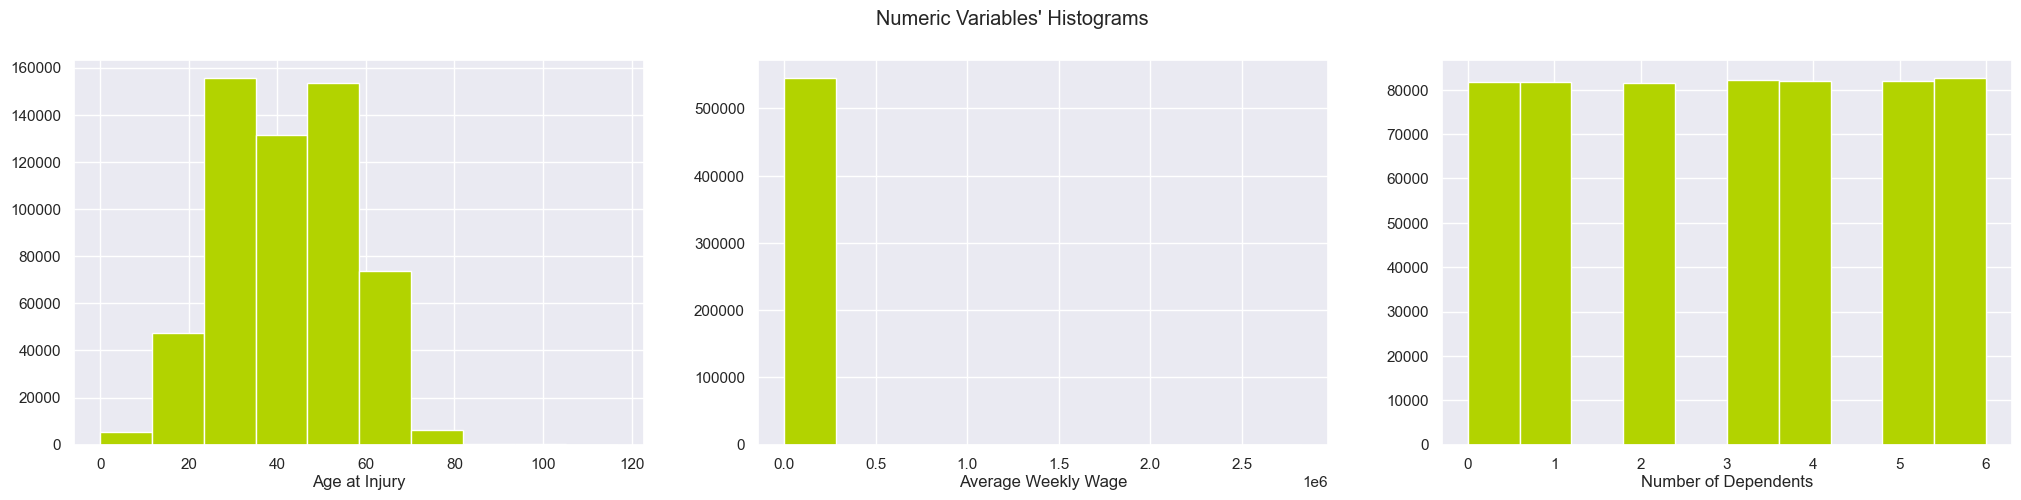

In [297]:
metric_features = ['Age at Injury', 'Average Weekly Wage', 'Number of Dependents']
df = df_train

sns.set()
fig, axes = plt.subplots(1, 3, figsize=(25, 5))
for ax, feat in zip(axes.flatten(), metric_features):
    ax.hist(df[feat], color= '#B2D300')
    ax.set_title(feat, y=-0.13)
plt.suptitle("Numeric Variables' Histograms")
plt.show()

The age seems to be centralized around 50, as for the number of dependents it seems to be equally distributed along the various possibilities.

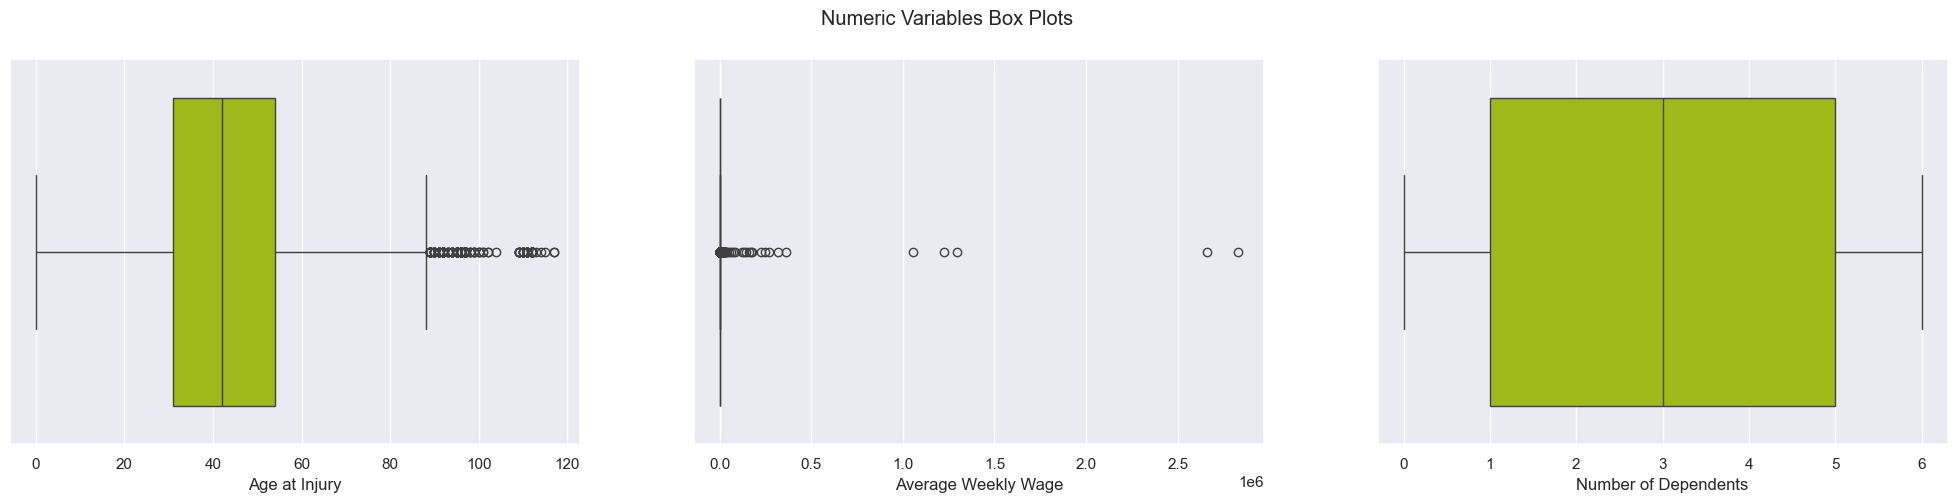

In [298]:
fig, axes = plt.subplots(1, 3, figsize=(25, 5))
for ax, feat in zip(axes.flatten(), metric_features):
    sns.boxplot(x=df[feat], ax=ax, color= '#B2D300')
plt.suptitle("Numeric Variables Box Plots")
plt.show()

Average Weekly Wage seems to be skewed. On a later stage, more research will be conducted to understand this variable.

### Dates

Dates can yield important insights regarding periodicity in the data (for example, tourism tends to rise in summer and decline in winter).

A plot of the frequency of accidents per year and month for every year in the data set could show these tendencies.

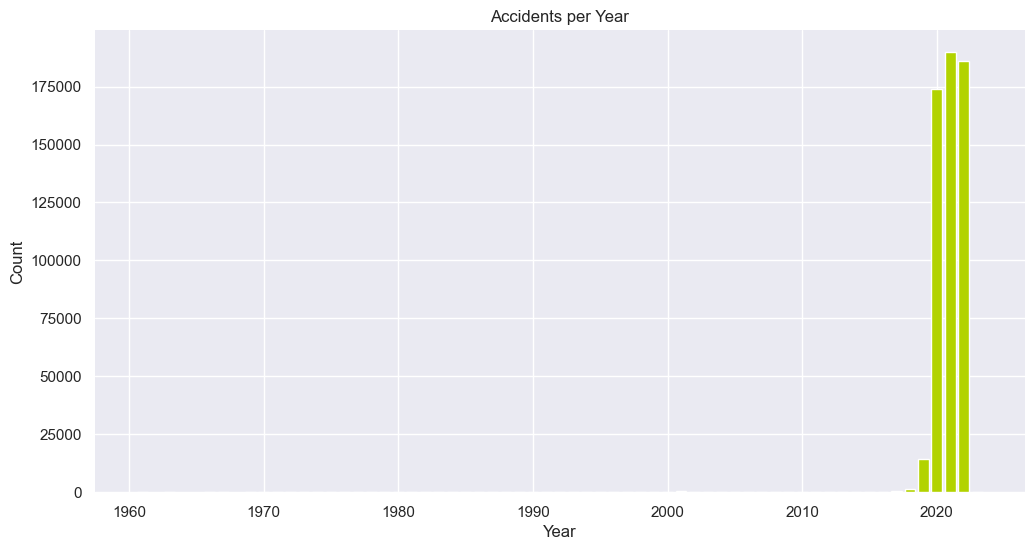

In [299]:
accidents_per_year = df_train['Accident Date'].dt.year.value_counts().sort_index()
plt.figure(figsize=(12, 6))
bars = plt.bar(accidents_per_year.index, accidents_per_year.values, color='#B2D300')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Accidents per Year')
plt.grid(True)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.show()

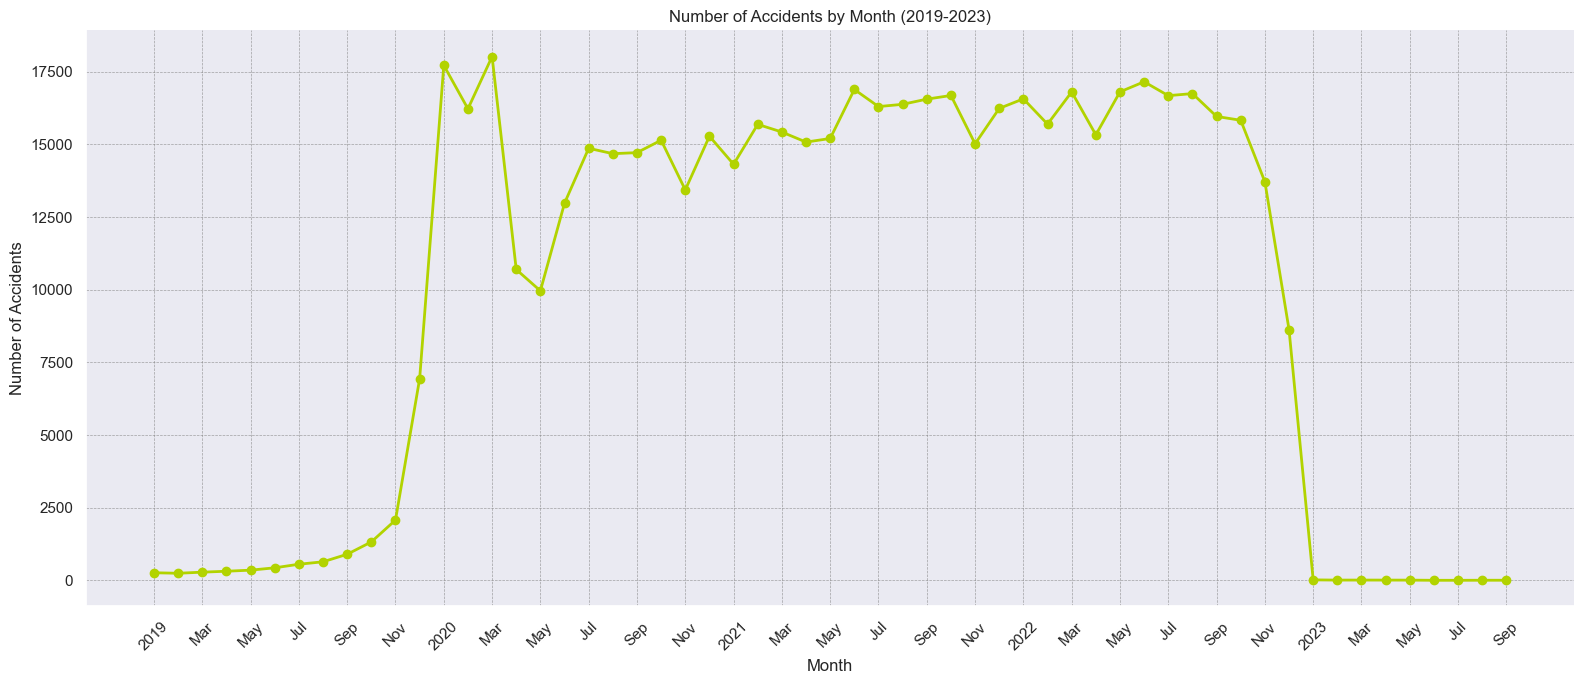

In [300]:
df_train_2019 = df_train[df_train['Accident Date'].dt.to_period('M') >= '2019-01']
accidents_by_month = df_train_2019.groupby(df_train_2019['Accident Date'].dt.to_period('M')).size()

plt.figure(figsize=(16, 7))
plt.plot(accidents_by_month.index.astype(str), accidents_by_month.values, marker='o', color='#B2D300', linestyle='-', linewidth=2)
plt.title('Number of Accidents by Month (2019-2023)')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')

# set x-axis labels to show only the month and year
labels = []
for month in accidents_by_month.index.to_timestamp():
    if month.month == 1:                          # If its january, show year
        labels.append(f"{month.strftime('%Y')}")
    else:                                         # else, show only the month
        labels.append(month.strftime('%b'))

plt.xticks(ticks=range(0, len(accidents_by_month), 2), labels=labels[::2], rotation=45)


# Add grid and remove plot spines
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.show()

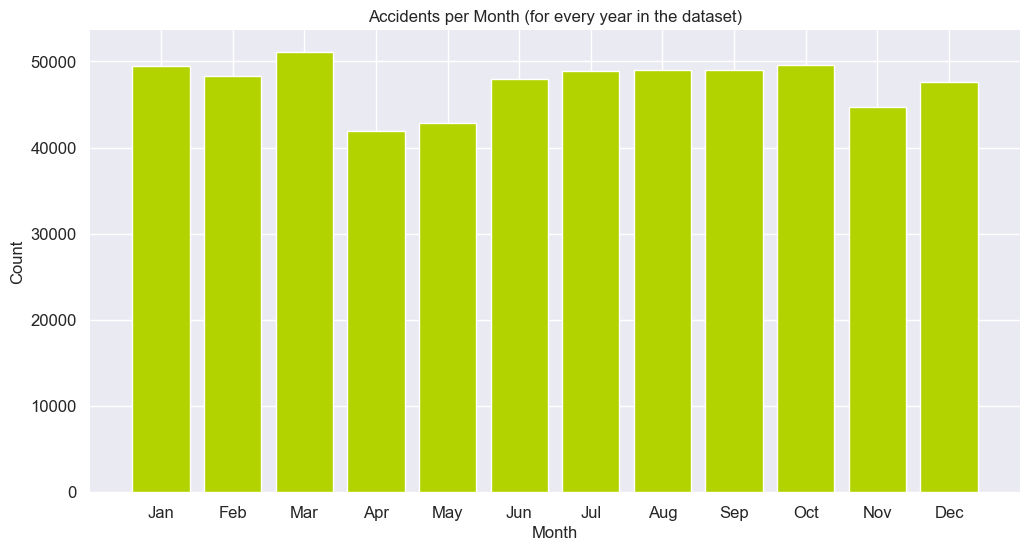

In [301]:
year_counts = df_train['Accident Date'].groupby(df_train['Accident Date'].dt.month).count()
plt.figure(figsize=(12, 6))
bars = plt.bar(year_counts.index, year_counts, color='#B2D300')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Accidents per Month (for every year in the dataset)')
plt.yticks(fontsize=12)
plt.xticks(ticks=year_counts.index, labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], fontsize=12)
plt.grid(True)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.show()

There seems to be a slight decrease in April and May, but most of the data regards the years of 2020, 2021 and 2022, so a plot for these years could be more revealing.

In [302]:
df_train_recent = df_train[df_train['Accident Date'].dt.year.isin([2020, 2021, 2022])]

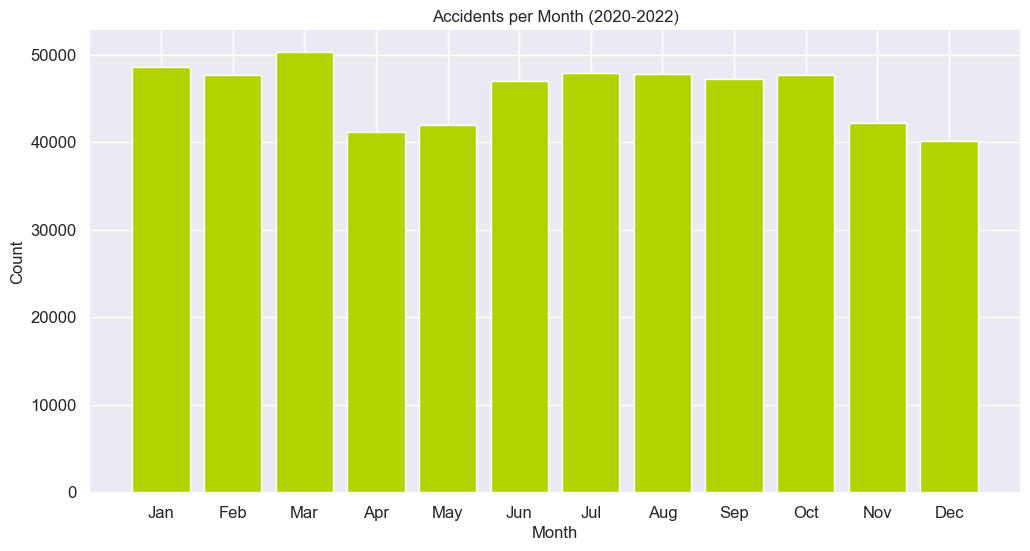

In [303]:
year_counts = df_train_recent['Accident Date'].groupby(df_train_recent['Accident Date'].dt.month).count()
plt.figure(figsize=(12, 6))
bars = plt.bar(year_counts.index, year_counts, color='#B2D300')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Accidents per Month (2020-2022)')
plt.yticks(fontsize=12)
plt.xticks(ticks=year_counts.index, labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], fontsize=12)
plt.grid(True)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.show()

Only Decemeber seems to have changed in the recent years, showing a small decrease. To be more specific, a line chart with the three last years can be created.

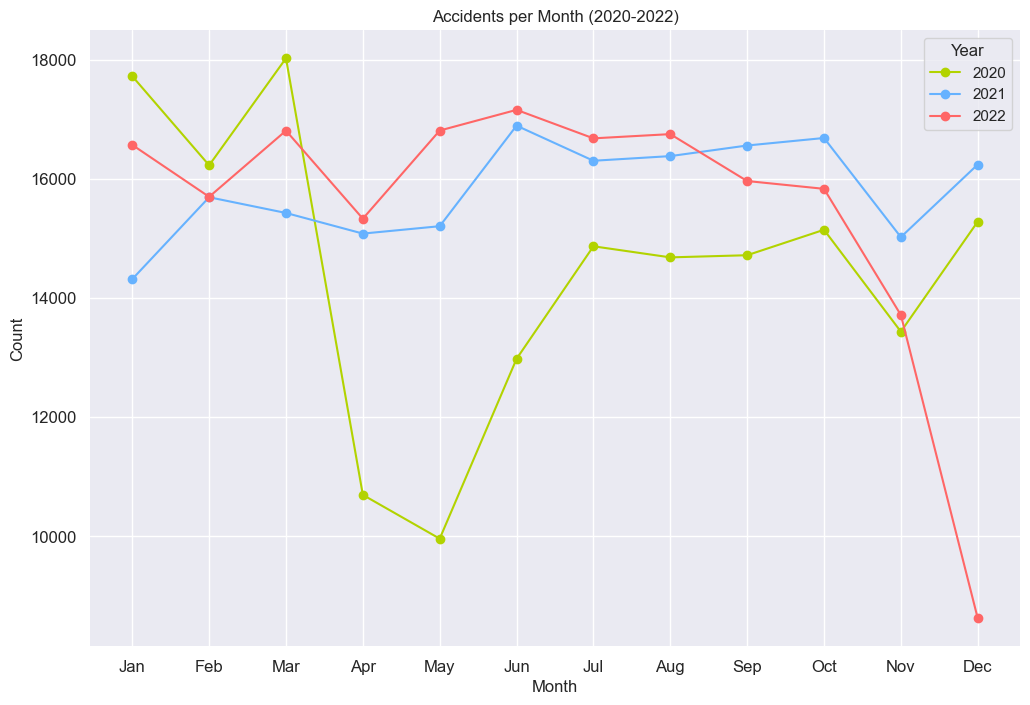

In [304]:
plt.figure(figsize=(12, 8))
years_list = [2020, 2021, 2022, 2023]
colors = ['#B2D300', '#66B2FF', '#FF6666']

for year, color in zip(years_list, colors):
    year_counts = df_train[df_train['Accident Date'].dt.year == year]['Accident Date'].dt.month.value_counts().sort_index()
    plt.plot(year_counts.index, year_counts.values, marker='o', label=str(year), color=color)
    
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Accidents per Month (2020-2022)')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.legend(title='Year')
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.show()

There appears to be no recognizable pattern in these years. However, the group observed a decrease in accidents during the period from March to May. This could possibly be attributed to the COVID-19 outbreak, as workers were required to quarantine during this time and, consequently, were less likely to experience work-related accidents.

A look into the years before 2020, the minority subset, could explain the decrease in december in the more recent past.

In [305]:
df_train_older = df_train[df_train['Accident Date'].dt.year < 2020]

In [306]:
df_train_older

Accident Date  Age at Injury Alternative Dispute Resolution  \
0         2019-12-30             31                              N   
1         2019-08-30             46                              N   
2         2019-12-06             40                              N   
4         2019-12-30             61                              N   
5         2019-12-26             67                              N   
...              ...            ...                            ...   
592648    2019-09-06            109                              N   
592680    2019-09-03             20                              N   
593136    1980-05-17             45                              N   
593212    2019-07-05             21                              N   
593344    2019-08-16             21                              N   

       Assembly Date Attorney/Representative  Average Weekly Wage  Birth Year  \
0         2020-01-01                       N                 0.00      1988.0   
1         2020-01-01                       Y              1745.93      1973.0   
2         2020-01-01                       N              1434.80      1979.0   
4         2020-01-01                       N                  NaN      1958.0   
5         2020-01-01                       N                 0.00      1952.0   
...              ...                     ...                  ...         ...   
592648    2022-12-29                       N                 0.00      1910.0   
592680    2022-12-29                       N                 0.00      1999.0   
593136    2022-12-30                       N                 0.00      1935.0   
593212    2022-12-30                       N                 0.00      1998.0   
593344    2022-12-30                       N                 0.00      1998.0   

         C-2 Date                   Carrier Name Carrier Type  ...  \
0      2019-12-31     NEW HAMPSHIRE INSURANCE CO  1A. PRIVATE  ...   
1      2020-01-01   ZURICH AMERICAN INSURANCE CO  1A. PRIVATE  ...   
2      2020-01-01      INDEMNITY INSURANCE CO OF  1A. PRIVATE  ...   
4      2019-12-31           STATE INSURANCE FUND      2A. SIF  ...   
5      2019-12-31    INDEMNITY INS. OF N AMERICA  1A. PRIVATE  ...   
...           ...                            ...          ...  ...   
592648 2022-12-29  SAFETY NATIONAL CASUALTY CORP  1A. PRIVATE  ...   
592680 2022-12-29   EVEREST NATIONAL INS COMPANY  1A. PRIVATE  ...   
593136 2022-12-30    INFINITY ASSURANCE INS. CO.  1A. PRIVATE  ...   
593212 2022-12-30  SAFETY NATIONAL CASUALTY CORP  1A. PRIVATE  ...   
593344 2022-12-30  SAFETY NATIONAL CASUALTY CORP  1A. PRIVATE  ...   

        WCIO Cause of Injury Code WCIO Cause of Injury Description  \
0                              27     FROM LIQUID OR GREASE SPILLS   
1                              97                REPETITIVE MOTION   
2                              79   OBJECT BEING LIFTED OR HANDLED   
4                              16  HAND TOOL, UTENSIL; NOT POWERED   
5                              31          FALL, SLIP OR TRIP, NOC   
...                           ...                              ...   
592648                         85                 ANIMAL OR INSECT   
592680                         99       OTHER - MISCELLANEOUS, NOC   
593136                         29                    ON SAME LEVEL   
593212                         16  HAND TOOL, UTENSIL; NOT POWERED   
593344                         75         FALLING OR FLYING OBJECT   

       WCIO Nature of Injury Code WCIO Nature of Injury Description  \
0                              10                         CONTUSION   
1                              49                    SPRAIN OR TEAR   
2                               7                        CONCUSSION   
4                              43                          PUNCTURE   
5                              10                         CONTUSION   
...                           ...                               ...   
592648        

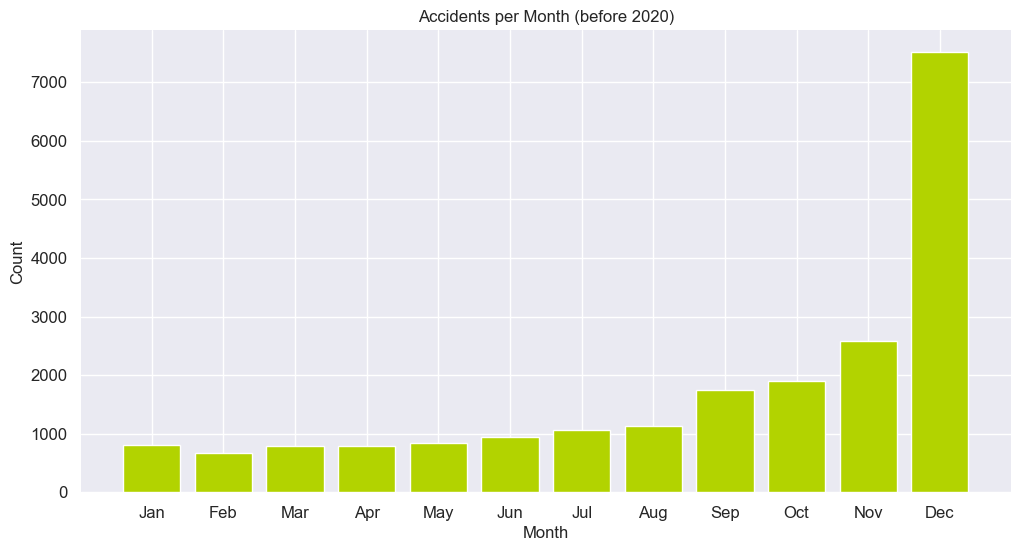

In [307]:
year_counts = df_train_older['Accident Date'].groupby(df_train_older['Accident Date'].dt.month).count()
plt.figure(figsize=(12, 6))
bars = plt.bar(year_counts.index, year_counts, color='#B2D300')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Accidents per Month (before 2020)')
plt.yticks(fontsize=12)
plt.xticks(ticks=year_counts.index, labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], fontsize=12)
plt.grid(True)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.show()

In [308]:
most_common_year_month = df_train_older['Accident Date'].dt.to_period('M').value_counts().idxmax()
most_common_year_month

Period('2019-12', 'M')

The explosive rise in the month of december can be explained by the the date '2019-12-XX' which is the closest date to when the colection of data starts to grow. It's plausible to assume that this increase in observations is simply due to an increase in data collection and not a real life increase in insurance claims.

### Claim Types

This section will begin by exploring what are the unique values of the target variable

In [309]:
df_train['Claim Injury Type'].unique()

array(['2. NON-COMP', '4. TEMPORARY', '3. MED ONLY', '5. PPD SCH LOSS',
       '6. PPD NSL', '1. CANCELLED', '8. DEATH', '7. PTD'], dtype=object)

This is how the target variable works:

Cancelled – The claim is canceled if it was assembled by mistake or identified as a duplicate of an existing claim.

Non-Comp – No indemnity (financial) benefits are awarded for the claim, meaning the worker is not compensated beyond the claim itself.

Med Only – Only medical benefits are awarded, covering treatment and healthcare costs without additional financial compensation for lost time.

Temporary – The claim provides temporary total or partial disability benefits for the period the worker is unable to work due to injury.

PPD Sch Loss – The claim awards a Permanent Partial Disability benefit for a scheduled body part (e.g., hand, leg) where there’s a specific schedule of compensation.

PPD NSL – The claim awards a Permanent Partial Disability benefit for a non-scheduled body part, such as the neck or back, without a specific compensation schedule.

PTD – Permanent Total Disability benefits are awarded, providing lifetime compensation because the worker is unable to return to work due to the injury.

Death – Death benefits are awarded under WCL §16 due to a worker’s death, providing financial support to dependents.<br>




References:<br>
https://data.ny.gov/Government-Finance/Assembled-Workers-Compensation-Claims-Beginning-20/jshw-gkgu/about_data

How are these values distributed?

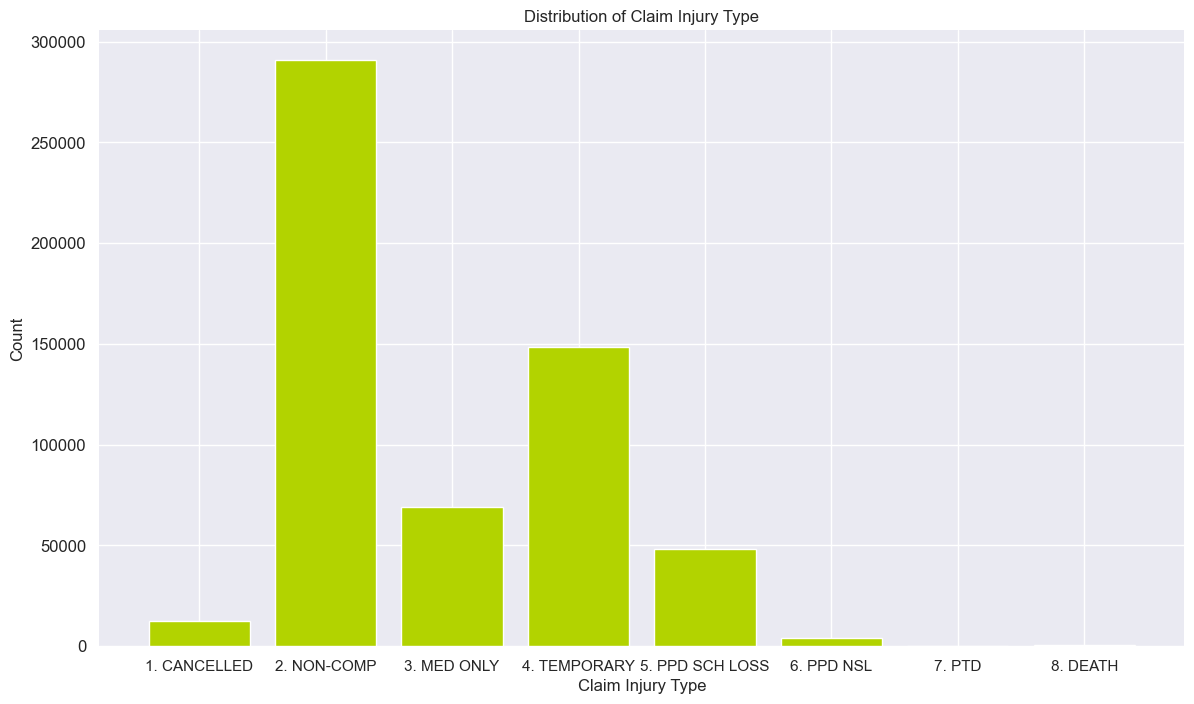

In [310]:
claim_injury_counts = df_train['Claim Injury Type'].value_counts()
claim_injury_counts = claim_injury_counts.reindex(sorted(claim_injury_counts.index, key=lambda x: int(x.split('.')[0])))

plt.figure(figsize=(14, 8))
bars = plt.bar(claim_injury_counts.index, claim_injury_counts.values, color='#B2D300')
plt.xlabel('Claim Injury Type')
plt.ylabel('Count')
plt.title('Distribution of Claim Injury Type')
plt.yticks(fontsize=12)
plt.grid(True)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.show()

The dataset is dominated by the second category in such a way that the 7th and 8th categories appear to be empty.

In [311]:
claim_injury_table = df_train['Claim Injury Type'].value_counts().reset_index()
claim_injury_table.columns = ['Claim Injury Type', 'Count']

claim_injury_table['Claim Injury Type'] = claim_injury_table['Claim Injury Type'].astype(str)
claim_injury_table = claim_injury_table.sort_values(by='Claim Injury Type', key=lambda inj_type: inj_type.str.split('.').str[0].astype(int))
claim_injury_table.reset_index(drop=True, inplace=True)
claim_injury_table

Claim Injury Type   Count
0      1. CANCELLED   12477
1       2. NON-COMP  291076
2       3. MED ONLY   68906
3      4. TEMPORARY  148507
4   5. PPD SCH LOSS   48280
5        6. PPD NSL    4211
6            7. PTD      97
7          8. DEATH     470

The table allows a different view where the minority can still be seen. The target variable is clearly unbalanced. In the future, resampling and other methods could be used to compensate for this issue.

### Attorney VS No Attorney

In the real world, the presence of a lawyer can sometimes change the outcome of an insurance claim. How is this presence distributed across different types of claims?

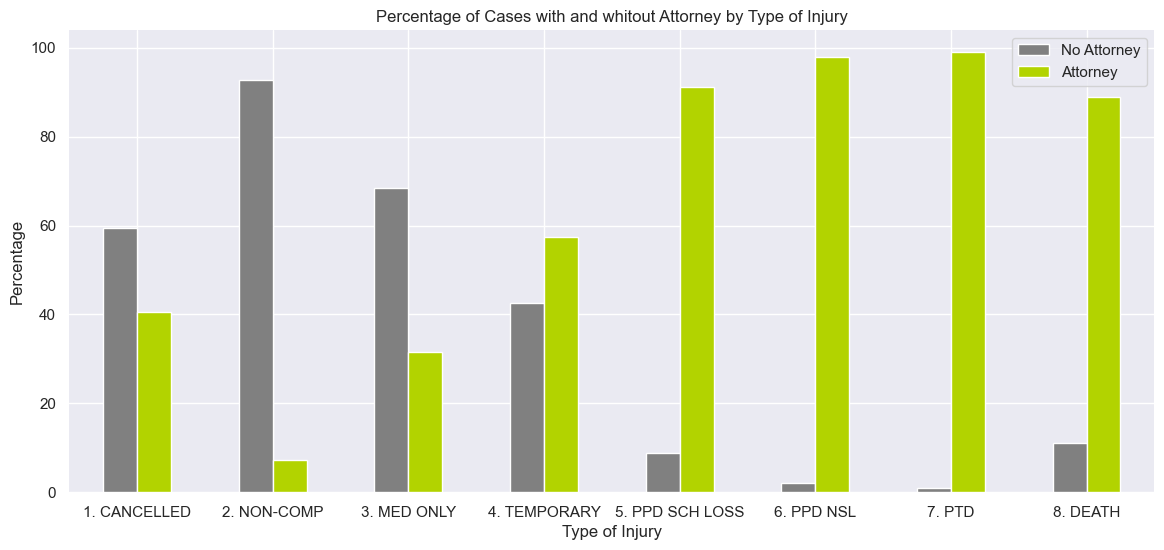

In [312]:
claim_injury_by_attorney = pd.crosstab(df_train['Claim Injury Type'], df_train['Attorney/Representative'])
claim_injury_by_attorney.columns = ['No Attorney', 'Attorney']
claim_injury_by_attorney.reset_index(inplace=True)
claim_injury_by_attorney['Attorney'] = claim_injury_by_attorney['Attorney'] / (claim_injury_by_attorney['No Attorney'] + claim_injury_by_attorney['Attorney']) * 100
claim_injury_by_attorney['No Attorney'] = 100 - claim_injury_by_attorney['Attorney']
claim_injury_by_attorney
claim_injury_by_attorney.plot(kind='bar', stacked=False, color=['Grey', '#B2D300'], figsize=(14, 6))
plt.xlabel('Type of Injury')
plt.ylabel('Percentage')
plt.title('Percentage of Cases with and whitout Attorney by Type of Injury')
plt.xticks(rotation=0)
plt.grid(True)
ax = plt.gca()
plt.xticks(ticks=range(len(claim_injury_counts.index)), 
               labels=sorted(claim_injury_counts.index, key=lambda x: int(x.split('.')[0])), 
               rotation=0)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.show()


This graph shows that as the severity of cases increases so does the percentage of cases where a laywer is present. It also indicates that the presence of a laywer is highly correlated to the target variable.

### Ages

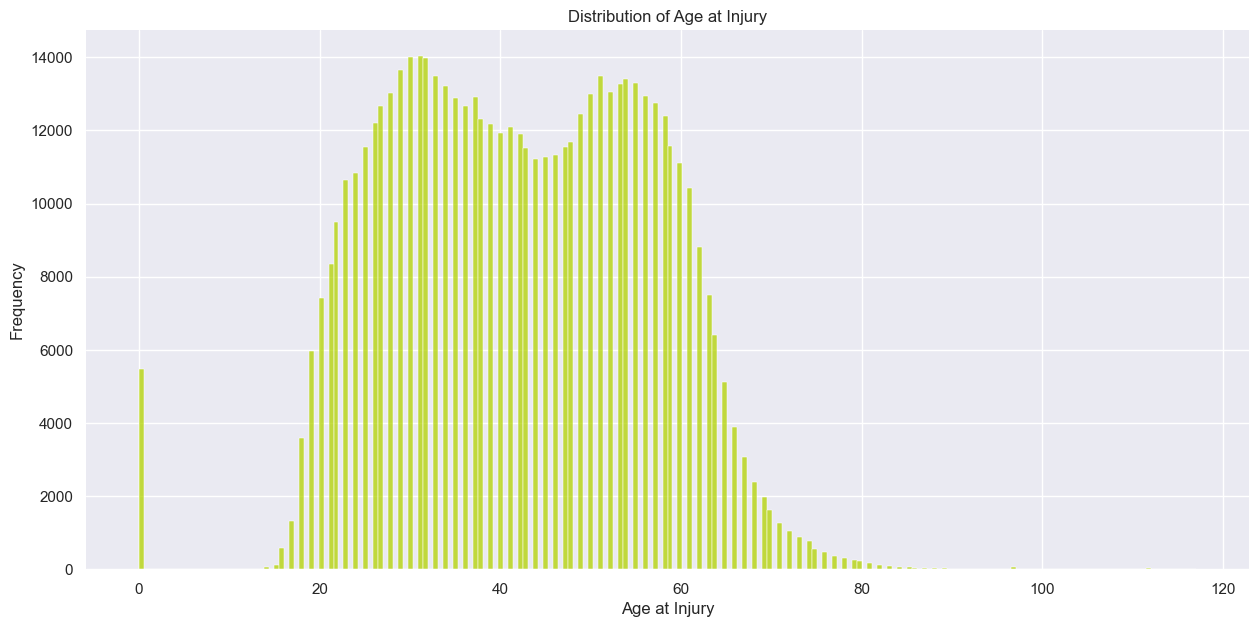

In [313]:
plt.figure(figsize=(15, 7))                              
sns.histplot(df_train['Age at Injury'], color='#B2D300')   
plt.xlabel('Age at Injury')                                
plt.ylabel('Frequency')                              
plt.title('Distribution of Age at Injury')
plt.grid(True)                                          
ax = plt.gca()                                                
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.show()

Ages will be grouped in order to obtain visualizations that are more meaningful and easier to read.

In [314]:
bins = (0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 130)
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '+100']
df_train['age_group'] = pd.cut(df_train['Age at Injury'], bins=bins, labels=labels)

In [315]:
age_group_counts = df_train['age_group'].value_counts().sort_index()
age_group_counts_percentage = age_group_counts / age_group_counts.sum() * 100
age_group_table = pd.DataFrame({'Age Group': age_group_counts.index,'Count': age_group_counts.values,'Percentage': age_group_counts_percentage.values})
age_group_table['Age Group'] = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']
age_group_table

Age Group   Count  Percentage
0      0-10      18    0.003166
1     10-20   19056    3.351625
2     20-30  116489   20.488427
3     30-40  129612   22.796539
4     40-50  118033   20.759990
5     50-60  127283   22.386907
6     60-70   51167    8.999402
7     70-80    6111    1.074821
8     80-90     625    0.109927
9    90-100     166    0.029197

In [316]:
df_zeros = df_train[df_train['Age at Injury'] == 0]
df_zeros.describe()

Accident Date  Age at Injury  \
count                           1775         5464.0   
mean   2018-05-30 02:25:13.014084608            0.0   
min              1967-04-05 00:00:00            0.0   
25%              2020-01-07 00:00:00            0.0   
50%              2020-09-29 00:00:00            0.0   
75%              2021-09-16 00:00:00            0.0   
max              2022-12-20 00:00:00            0.0   
std                              NaN            0.0   

                       Assembly Date  Average Weekly Wage   Birth Year  \
count                           5464          5169.000000  5204.000000   
mean   2021-05-19 05:29:57.364568064            70.099559  1238.161414   
min              2020-01-02 00:00:00             0.000000     0.000000   
25%              2020-08-21 00:00:00             0.000000     0.000000   
50%              2021-04-27 00:00:00             0.000000  1959.000000   
75%              2022-02-03 00:00:00             0.000000  1967.000000   
max              2022-12-30 00:00:00          5867.580000  2005.000000   
std                              NaN           321.922818   949.243284   

                            C-2 Date  Claim Identifier  Industry Code  \
count                           3081      5.464000e+03         3983.0   
mean   2021-06-11 06:30:15.774099712      5.734683e+06      50.708009   
min              1997-02-07 00:00:00      5.393794e+06           11.0   
25%              2020-10-08 00:00:00      5.541794e+06           42.0   
50%              2021-07-16 00:00:00      5.708605e+06           48.0   
75%              2022-05-03 00:00:00      5.912161e+06           62.0   
max              2024-05-31 00:00:00      6.165637e+06           92.0   
std                              NaN      2.187567e+05      18.743996   

       WCIO Cause of Injury Code  WCIO Nature of Injury Code  \
count                     2940.0                      2937.0   
mean                   74.727891                   53.292475   
min                          1.0                         1.0   
25%                         56.0                        37.0   
50%                         83.0                        52.0   
75%                         98.0                        72.0   
max                         99.0                        91.0   
std                    27.188004                   22.075821   

       WCIO Part Of Body Code  Agreement Reached  Number of Dependents  
count                  2535.0             5464.0                5464.0  
mean                37.280473           0.068814              2.999817  
min                      -9.0                0.0                   0.0  
25%                      13.0                0.0                   1.0  
50%                      35.0                0.0                   3.0  
75%                      53.0                0.0                   5.0  
max                      99.0                1.0                   6.0  
std                 26.238942           0.253161              1.980733

Most observations with 0 years of age do not have an "average weekly wage", and a sizable amount have 0 as their birth year.

For the ones who have a birth year, it is possible to calculate their age at the time of the accident (this is something to be done in the data cleaning section).

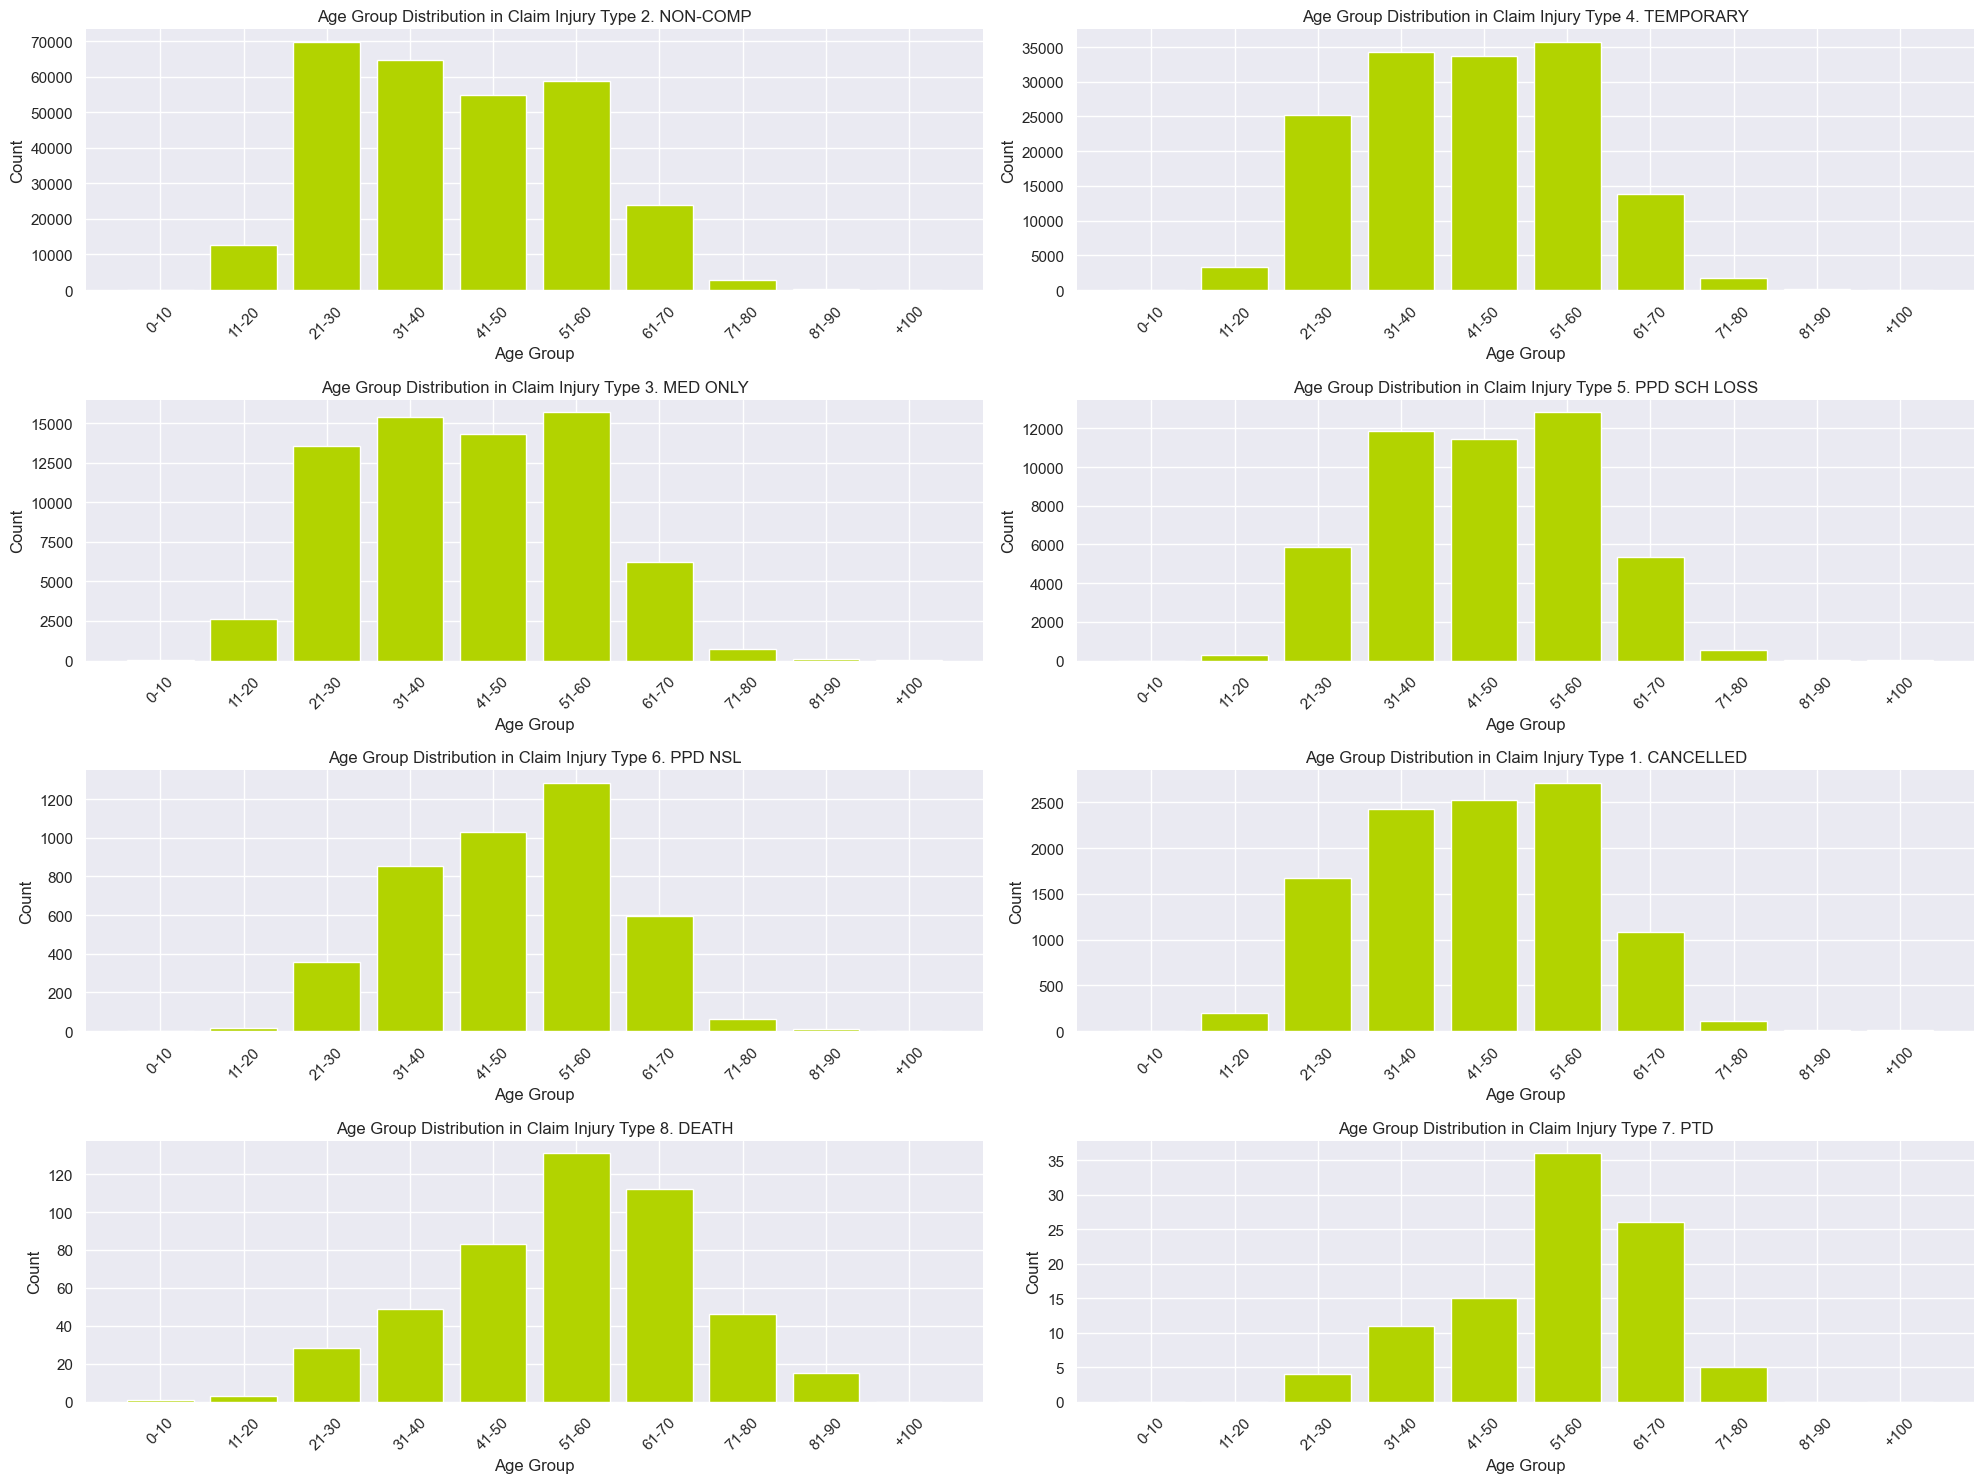

In [317]:
claim_injury_types = df_train['Claim Injury Type'].unique()
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 15))

for ax, claim_injury_type in zip(axes.flatten(), claim_injury_types):
    age_group_counts = df_train[df_train['Claim Injury Type'] == claim_injury_type]['age_group'].value_counts().sort_index()
    bars = ax.bar(age_group_counts.index, age_group_counts.values, color='#B2D300')
    ax.set_xlabel('Age Group')
    ax.set_ylabel('Count')
    ax.set_title(f'Age Group Distribution in Claim Injury Type {claim_injury_type}')
    ax.set_xticks(range(len(age_group_counts.index)))
    ax.set_xticklabels(age_group_counts.index, rotation=45)
    ax.grid(True)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

plt.tight_layout()
plt.show()

In [318]:
df_train['Agreement Reached'] = df_train['Agreement Reached'].map({0: 'Not Reached', 1: 'Reached'})
mean_age_by_agreement = df_train.groupby('Agreement Reached')['Age at Injury'].mean().reset_index()
mean_age_by_agreement.columns = ['Agreement Reached', 'Mean Age']
mean_age_by_agreement

Agreement Reached   Mean Age
0       Not Reached  42.054242
1           Reached  43.343674

### Genders

The next step is checking how the dataset is distributed in terms of gender.

The reported gender of the injured worker can be: 
- F – Female; 
- M - Male; 
- X - Nonbinary; 
- U – Unknown (gender not specified)

References:

https://data.ny.gov/Government-Finance/Assembled-Workers-Compensation-Claims-Beginning-20/jshw-gkgu/about_data

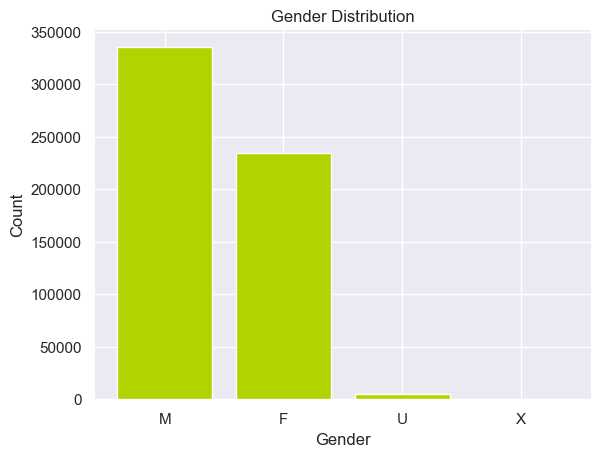

In [319]:
df_train['Gender'] = df_train['Gender'].astype(str)
gender_counts = df_train['Gender'].value_counts()
plt.bar(gender_counts.index, gender_counts.values, color='#B2D300')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.grid(True)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.show()

In [320]:
gender_type_of_claim = pd.crosstab(df_train['Gender'], df_train['Claim Injury Type'])
for i in gender_type_of_claim.columns:
    gender_type_of_claim[i] = (gender_type_of_claim[i] / gender_type_of_claim[i].sum()) * 100
gender_type_of_claim

Claim Injury Type  1. CANCELLED  2. NON-COMP  3. MED ONLY  4. TEMPORARY  \
Gender                                                                    
F                     33.429510    44.401119    40.794706     37.794851   
M                     65.167909    54.539364    58.523206     61.647599   
U                      1.378537     1.055394     0.655966      0.554183   
X                      0.024044     0.004123     0.026123      0.003367   

Claim Injury Type  5. PPD SCH LOSS  6. PPD NSL    7. PTD   8. DEATH  
Gender                                                               
F                        30.292046   40.156732  23.71134  12.765957  
M                        69.320630   59.534552  76.28866  87.234043  
U                         0.370754    0.308715   0.00000   0.000000  
X                         0.016570    0.000000   0.00000   0.000000

The majority of the dataset is composed of men (M), with a smaller proportion of women (F) and two other options (Unknown and Nonbinary).

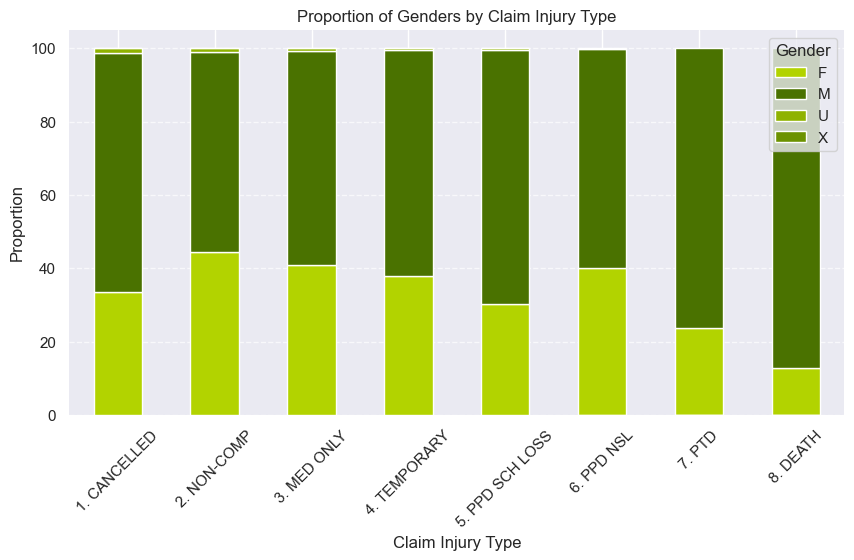

In [321]:
gender_proportion = pd.crosstab(df_train['Claim Injury Type'], df_train['Gender'], normalize='index') * 100
colors = ['#B2D300', '#4A7200', '#8FB200', '#6C9200',]
fig, ax = plt.subplots(figsize=(10, 5))
gender_proportion.plot(kind='bar', stacked=True, color=colors, ax=ax)
plt.xlabel('Claim Injury Type')
plt.ylabel('Proportion')
plt.title('Proportion of Genders by Claim Injury Type')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.show()

The graph gives a better perception of the growth in the percentage of men as cases get increasingly severe, with the highest percentage of men present in cases envolving death.

### Unbalanced Columns

Two columns seem to be unbalanced.

In [322]:
covid_count = df_train['COVID-19 Indicator'].value_counts()
covid_count_percent = covid_count / covid_count.sum() * 100
print(covid_count_percent)

COVID-19 Indicator
N    95.205601
Y     4.794399
Name: count, dtype: float64


In [323]:
decision_count = df_train['WCB Decision'].value_counts()
decision_count_percent = decision_count / decision_count.sum() * 100
print(decision_count_percent)

WCB Decision
Not Work Related    100.0
Name: count, dtype: float64


In [324]:
dispute_count = df_train['Alternative Dispute Resolution'].value_counts()
dispute_count_percent = dispute_count / dispute_count.sum() * 100
print(dispute_count_percent)

Alternative Dispute Resolution
N    99.544618
Y     0.454511
U     0.000871
Name: count, dtype: float64


The "COVID-19 Indicator" is composed by (roughly) 95% of cases where the claimant did **not** have covid and 5% where the claimant **had** covid. This variable is highly unbalanced, which could mean its prediction power is very low. Further research is necessary to understand its utility.

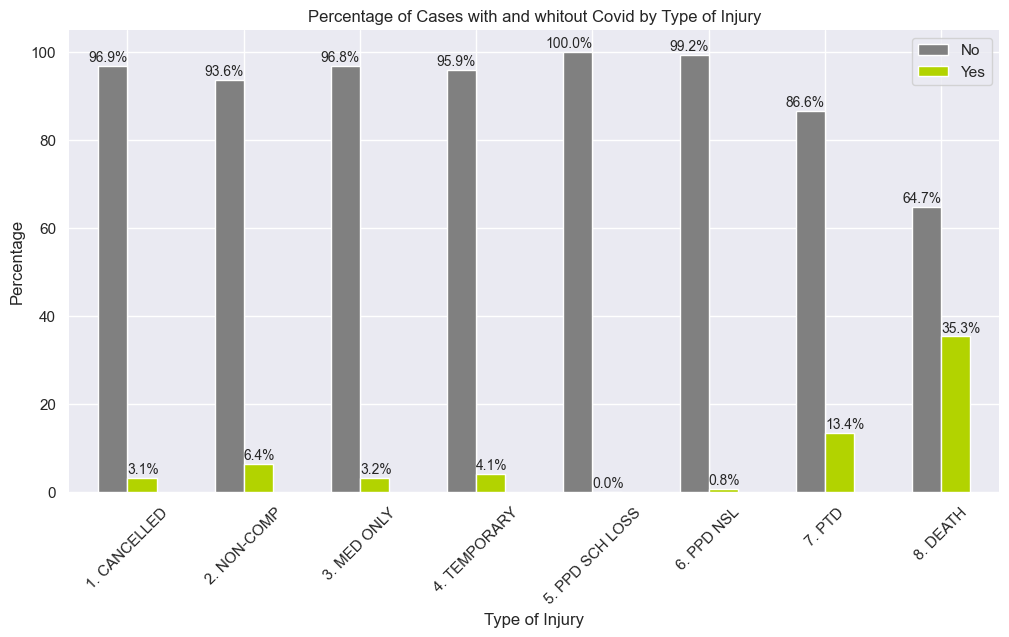

In [325]:
claim_injury_covid = pd.crosstab(df_train['Claim Injury Type'], df_train['COVID-19 Indicator'])
claim_injury_covid.columns = ['No', 'Yes']
claim_injury_covid.reset_index(inplace=True)
claim_injury_covid['Yes'] = claim_injury_covid['Yes'] / (claim_injury_covid['No'] + claim_injury_covid['Yes']) * 100
claim_injury_covid['No'] = 100 - claim_injury_covid['Yes']
claim_injury_covid
claim_injury_covid.plot(kind='bar', stacked=False, color=['Grey', '#B2D300'], figsize=(12, 6))
plt.xlabel('Type of Injury')
plt.ylabel('Percentage')
plt.title('Percentage of Cases with and whitout Covid by Type of Injury')
for index, value in enumerate(claim_injury_covid['Yes']):
    plt.text(index, value + 1, f'{value:.1f}%', ha='left', fontsize=10)
for index, value in enumerate(claim_injury_covid['No']):
    plt.text(index, value + 1, f'{value:.1f}%', ha='right', fontsize=10)
plt.xticks(ticks=claim_injury_covid.index, labels=claim_injury_covid['Claim Injury Type'], rotation=45)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.show()

It can be observed that the cases where the injury type is "DEATH" have a much higher rate of covid. There could possibly be a correlation between these variables, so at this time the Covid variable will be kept.

"WCB Decision" is composed in its entirety by "Not Work Related" cases. As such it has no variability, meaning it is not a feature of interest and, for this reason, it will be removed.
Alternative Dispute Resolution consists of three unique values, but two of them account for less than 1% of instances. Therefore, they were removed.

In [326]:
df_train = df_train.drop(columns=['WCB Decision', 'Alternative Dispute Resolution'])

### Accident Location

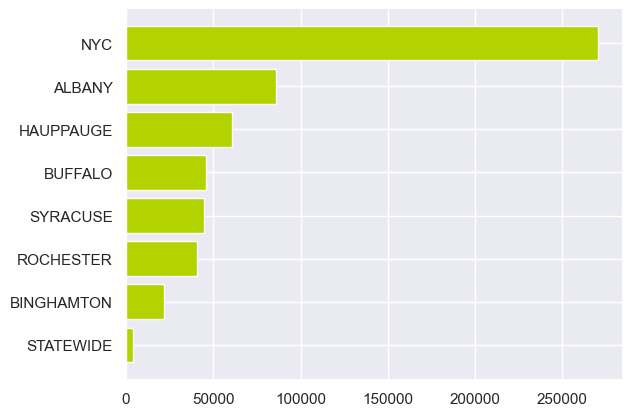

In [327]:
district_counts = df_train['District Name'].value_counts()
plt.barh(district_counts.index, district_counts.values, color='#B2D300')
plt.xlabel('')
plt.ylabel('')
plt.title('')
plt.grid(True)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.gca().invert_yaxis()
plt.show()

Most cases happen in the region of NYC (New York City, which accounts for 5 counties). This could be due to its higher population count.

References:

https://worldpopulationreview.com/us-counties/new-york

How does the target variable behave in these communities?

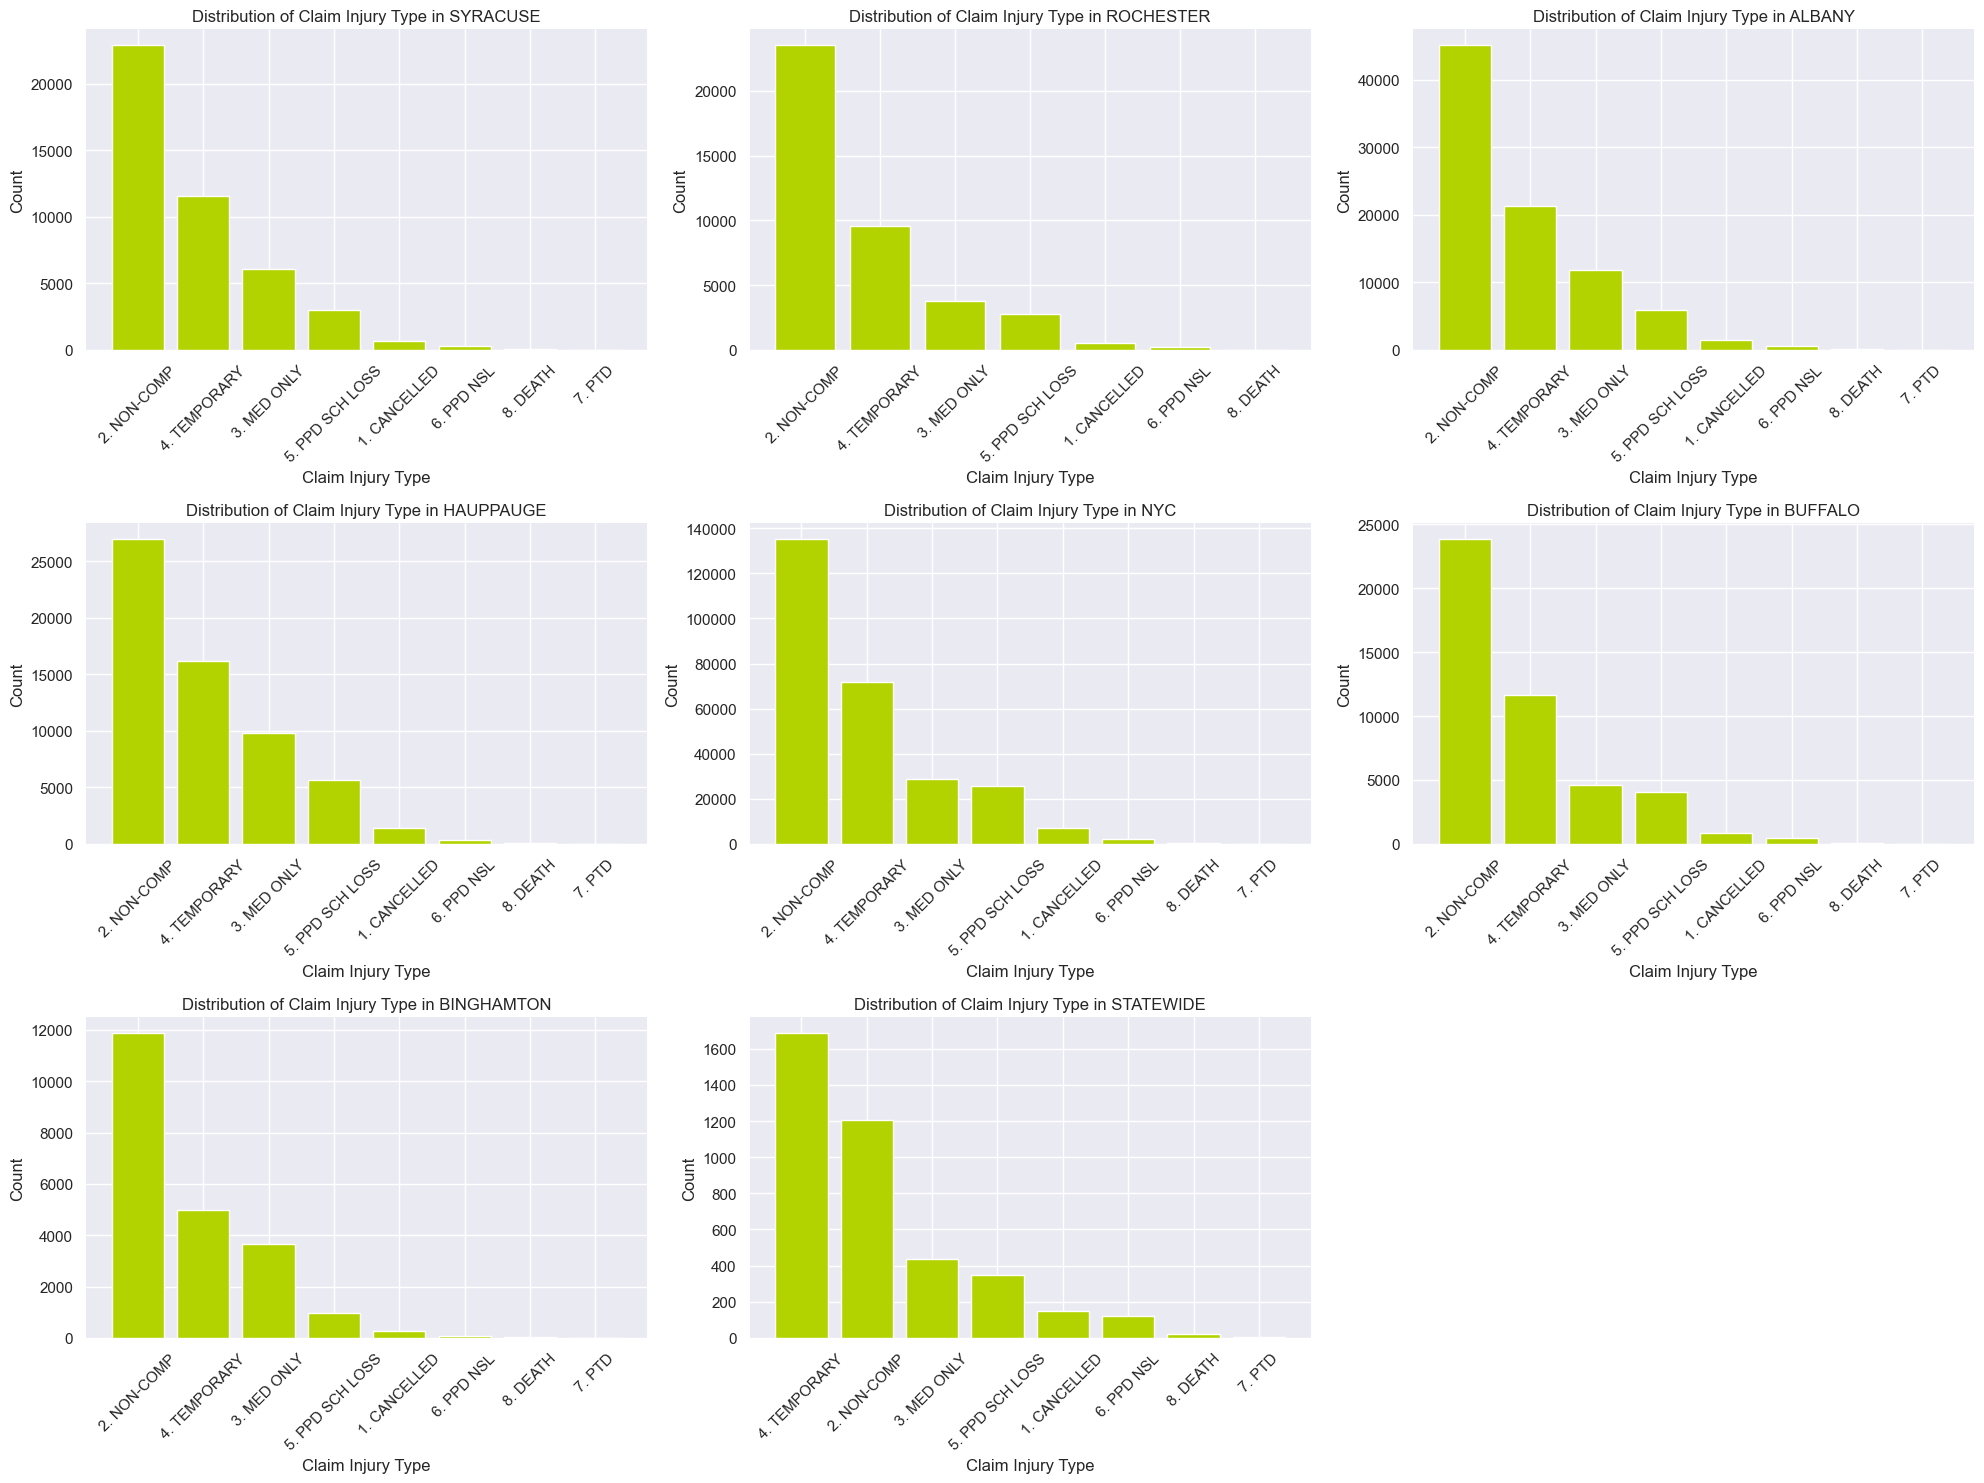

In [328]:
from math import ceil

places = df_train['District Name'].unique()
num_places = len(places)
fig, axes = plt.subplots(nrows=ceil(num_places / 3), ncols=3, figsize=(20, 15))

for ax, place in zip(axes.flatten(), places):
    claim_injury_counts = df_train[df_train['District Name'] == place]['Claim Injury Type'].value_counts()
    bars = ax.bar(claim_injury_counts.index, claim_injury_counts.values, color='#B2D300')
    ax.set_xlabel('Claim Injury Type')
    ax.set_ylabel('Count')
    ax.set_title(f'Distribution of Claim Injury Type in {place}')
    ax.set_xticks(range(len(claim_injury_counts.index)))
    ax.set_xticklabels(claim_injury_counts.index, rotation=45)
    ax.grid(True)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

# Remove any empty subplots
for ax in axes.flatten()[num_places:]:
    fig.delaxes(ax)

plt.tight_layout()
plt.show()

The distribution of cases seems to be mostly equal for all locations, except one. In Statewide the group observed that the most frequent claim injury type was the "4. Temporary".

### Average Weekly Wage

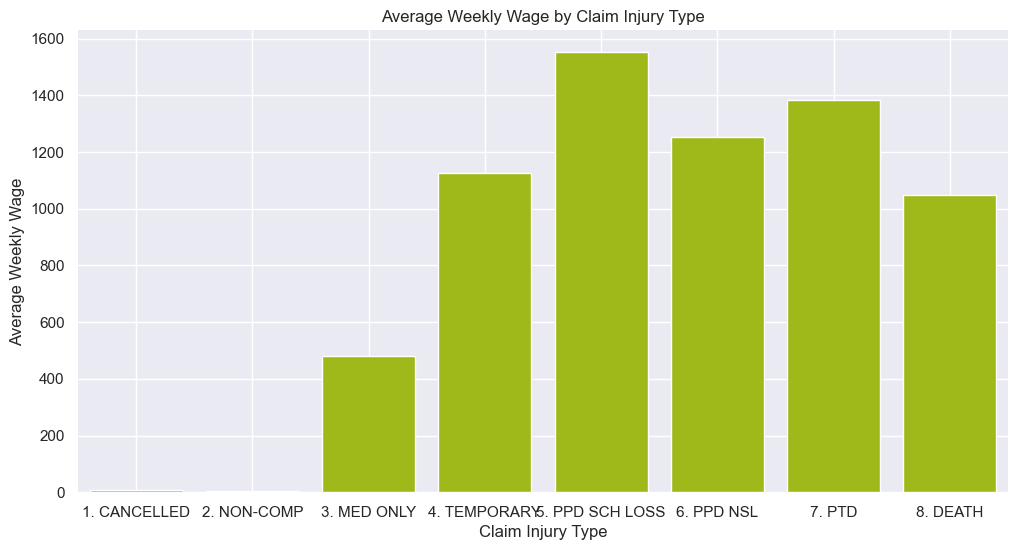

In [329]:
average_salary_by_claim = df_train.groupby('Claim Injury Type')['Average Weekly Wage'].mean()           # Group by 'Claim Injury Type' and calculate the mean of 'Average Weekly Wage'

plt.figure(figsize=(12, 6))
sns.barplot(x=average_salary_by_claim.index, y=average_salary_by_claim.values, color='#B2D300')
plt.xlabel('Claim Injury Type')
plt.ylabel('Average Weekly Wage')
plt.title('Average Weekly Wage by Claim Injury Type')
plt.grid(True)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.show()

The average weekly wage represents "the wage used to calculate workers’ compensation benefits, disability benefits, or an employee’s Paid Family Leave wage replacement benefits". 

The bar chart shows that the categories with the lowest average weekly wage are the first three. This is reasonable given that these claims are the ones without monetary compensation. Still more can be explored in this variable.<br>

References:<br>
https://data.ny.gov/Government-Finance/Assembled-Workers-Compensation-Claims-Beginning-20/jshw-gkgu/about_data

In [330]:
bins = (0, 1000, 2000, 3000, 4000, 5000, 10000, 20000, 30000, 40000, 50000, 100000, 200000, 300000, 400000, 500000, 1000000)
df_train['wage_groups'] = pd.cut(df_train['Average Weekly Wage'], bins=bins)

In [331]:
wage_group_counts = df_train['wage_groups'].value_counts().sort_index()
wage_group_counts_percentage = wage_group_counts / wage_group_counts.sum() * 100
wage_group_table = pd.DataFrame({'Wage Group': wage_group_counts.index,'Count': wage_group_counts.values,'Percentage': wage_group_counts_percentage.values})
wage_group_table['Wage Group'] = ['0-1000', '1000-2000', '2000-3000', '3000-4000', '4000-5000', '5000-10000', '10000-20000', '20000-30000', '30000-40000',
                                 '40000-50000', '50000-100000', '100000-200000', '200000-300000', '300000-400000', '400000-500000', '500000-1000000']
wage_group_table

Wage Group  Count  Percentage
0           0-1000  96645   46.038967
1        1000-2000  87274   41.574886
2        2000-3000  20881    9.947123
3        3000-4000   3763    1.792588
4        4000-5000    973    0.463510
5       5000-10000    328    0.156250
6      10000-20000     29    0.013815
7      20000-30000      9    0.004287
8      30000-40000      2    0.000953
9      40000-50000      2    0.000953
10    50000-100000      3    0.001429
11   100000-200000      6    0.002858
12   200000-300000      3    0.001429
13   300000-400000      2    0.000953
14   400000-500000      0    0.000000
15  500000-1000000      0    0.000000

Roughly 96% of the data falls in the range of 0 to 3000 USD. Further research into this range could reveal some important insights.

In [332]:
df_train1 = df_train[df_train['Average Weekly Wage'] < 3000]
bins = (0, 500, 1000, 1500, 2000, 2500, 3000)
df_train1['wage_groups'] = pd.cut(df_train1['Average Weekly Wage'], bins=bins)

C:\Users\migue\AppData\Local\Temp\ipykernel_18648\1944115288.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train1['wage_groups'] = pd.cut(df_train1['Average Weekly Wage'], bins=bins)


In [333]:
df_train1['Average Weekly Wage'].mean()

np.float64(437.4043178023361)

The average falls bellow what it should (it should be around 1000 according to the previous table), this could be due to a large majority of low values in the 0 to 500 USD range. 

In the begining of the notebook, it was pointed out that the boxplot was skewed, so the next step is to look for zeros.

In [334]:
df_testing = df_train1[df_train1['Average Weekly Wage'] == 0]
percent = len(df_testing)/len(df_train)*100
print(f'The percentage of observations where the salary is 0 is: {percent:.2f}%')

The percentage of observations where the salary is 0 is: 58.44%


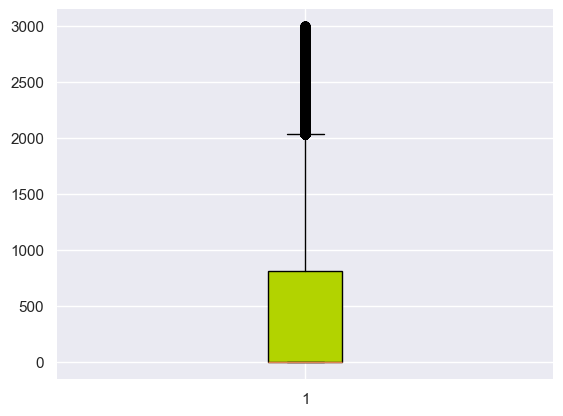

In [335]:
plt.boxplot(df_train1['Average Weekly Wage'], patch_artist=True,
            boxprops=dict(facecolor='#B2D300'))
plt.grid(True)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.show()

In the boxplot, the fact this variable is dominated by zeros becomes obvious.

Therefore, the previously created bins are not representative of the average weekly wage variable, and will be reworked.

The new organization will work as follows:

- No Benefit
- Low Benefit
- Medium Benefit
- High Benefit

This organization method better represents the data as it takes into account the 0 in the class 'No Benefit'.

To better pick the limits of each category the data will be plotted without outliers and zeros.

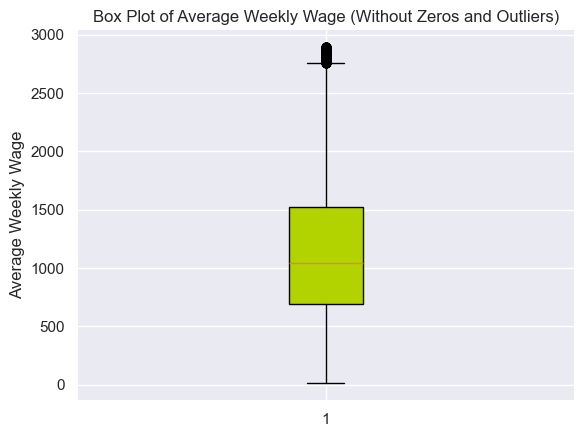

In [336]:
df_non_zero_wage = df_train[df_train['Average Weekly Wage'] > 0]

Q1 = df_non_zero_wage['Average Weekly Wage'].quantile(0.25)
Q3 = df_non_zero_wage['Average Weekly Wage'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_non_zero_wage_no_outliers = df_non_zero_wage[(df_non_zero_wage['Average Weekly Wage'] >= lower_bound) & (df_non_zero_wage['Average Weekly Wage'] <= upper_bound)]

plt.boxplot(df_non_zero_wage_no_outliers['Average Weekly Wage'], patch_artist=True,
            boxprops=dict(facecolor='#B2D300'))
plt.title('Box Plot of Average Weekly Wage (Without Zeros and Outliers)')
plt.ylabel('Average Weekly Wage')
plt.grid(True)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.show()

In [337]:
# calculate the quantiles and IQR excluding claims with 0 wage
df_non_zero_wage = df_train[df_train['Average Weekly Wage'] > 0]

q1 = df_non_zero_wage['Average Weekly Wage'].quantile(0.25) # 25th percentile or first quartile
q3 = df_non_zero_wage['Average Weekly Wage'].quantile(0.75)  # 75th percentile or third quartile
iqr = q3 - q1
lower_bound = max(0,q1 - 1.5 * iqr)                          # the max function ensures the lower bound cannot be less than 0, as negative wages are not valid
upper_bound = q3 + 1.5 * iqr

Given the present boxplot, the following division was decided:<br>
- No Compensation: Value = 0
- Low Wage: Lower Bound < Value < First Quartile
- Medium Wage: First Quartile <= Value <= Third Quartile
- High Wage: Third Quartile < Value <= Upper Bound
- Very High Wage: Upper Bound < Value

In [338]:
bins = [-1, 0, q1, q3, upper_bound, df_train['Average Weekly Wage'].max()]
labels = ['No Wage', 'Low Wage', 'Medium Wage', 'High Wage', 'Very High Wage']
df_train['wage_groups'] = pd.cut(df_train['Average Weekly Wage'], bins=bins, labels=labels)
df_train[['Average Weekly Wage', 'wage_groups']]

Average Weekly Wage  wage_groups
0                      0.00      No Wage
1                   1745.93    High Wage
2                   1434.80  Medium Wage
4                       NaN          NaN
5                      0.00      No Wage
...                     ...          ...
593451                 0.00      No Wage
593455                 0.00      No Wage
593456               991.08  Medium Wage
593457                 0.00      No Wage
593467                 0.00      No Wage

[574024 rows x 2 columns]

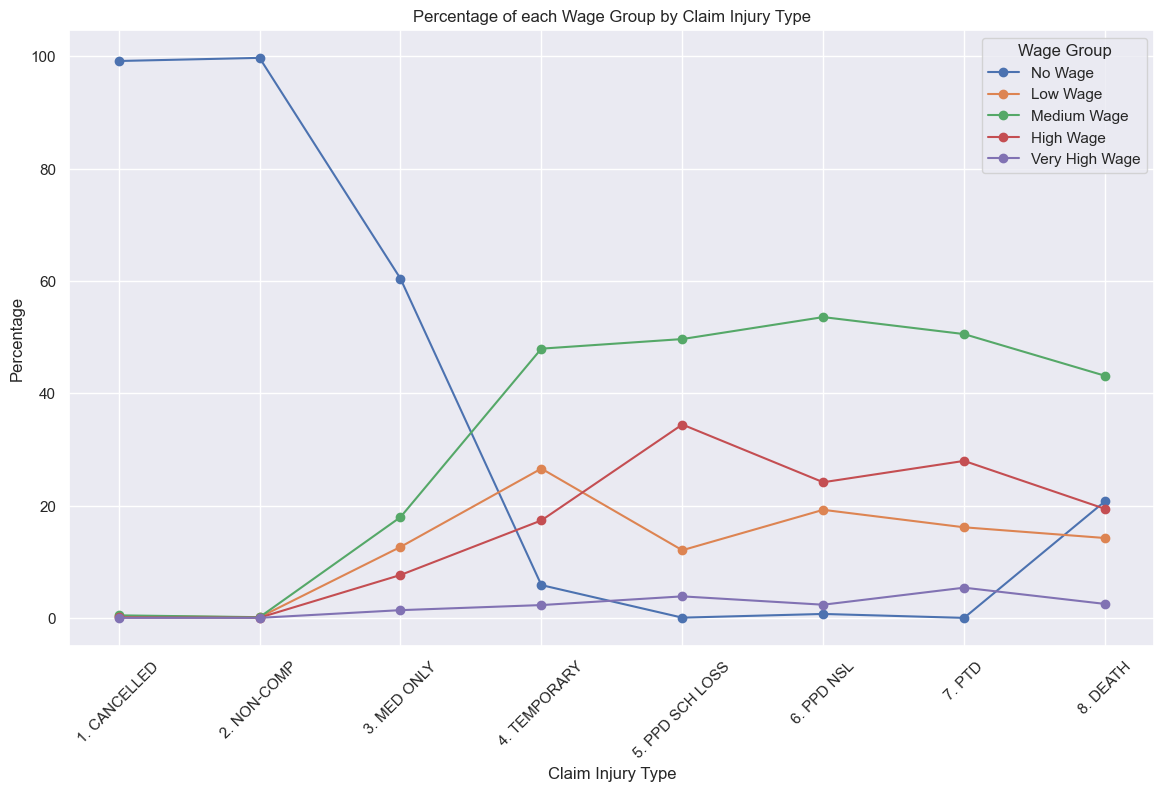

In [339]:
wage_groups_by_claim = pd.crosstab(df_train['Claim Injury Type'], df_train['wage_groups'])
wage_groups_by_claim_percentage = wage_groups_by_claim.div(wage_groups_by_claim.sum(axis=1), axis=0) * 100

plt.figure(figsize=(14, 8))
for wage_group in wage_groups_by_claim_percentage.columns:
    plt.plot(wage_groups_by_claim_percentage.index, wage_groups_by_claim_percentage[wage_group], marker='o', label=wage_group)

plt.xlabel('Claim Injury Type')
plt.ylabel('Percentage')
plt.title('Percentage of each Wage Group by Claim Injury Type')
plt.legend(title='Wage Group')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

As expected, the first two categories are dominated by "No Wage" observations. As the wage category increases, the proportion of "No Wage" observations decreases, with the exception of the "Very High Wage" category, which has few observations.

In [340]:
df_train['Average Weekly Wage'].value_counts()

Average Weekly Wage
0.00       335449
250.00       3193
600.00       2319
1765.00      1294
500.00       1264
            ...  
2144.73         1
1423.26         1
1451.61         1
1191.81         1
723.86          1
Name: count, Length: 120024, dtype: int64

### Medical Fee Region

In [341]:
df_train['Medical Fee Region'].unique()

array(['I', 'II', 'IV', 'UK', 'III'], dtype=object)

What is the meaning of these codes:

I - Region 1: Rural areas outside of Buffalo, Albany, Syracuse, Rochester, Utica & Binghamton<br>
II - Region 2: Buffalo, Albany, Syracuse, Rochester, Utica & Binghamton<br>
III - Region 3: Westchester, Rockland & most of Suffolk, Orange, & Putnam<br>
IV - Region 4: New York City, Nassau, and Western Suffolk<br>
UK - Unknown

Reference:

https://data.ny.gov/Government-Finance/Assembled-Workers-Compensation-Claims-Beginning-20/jshw-gkgu/about_data

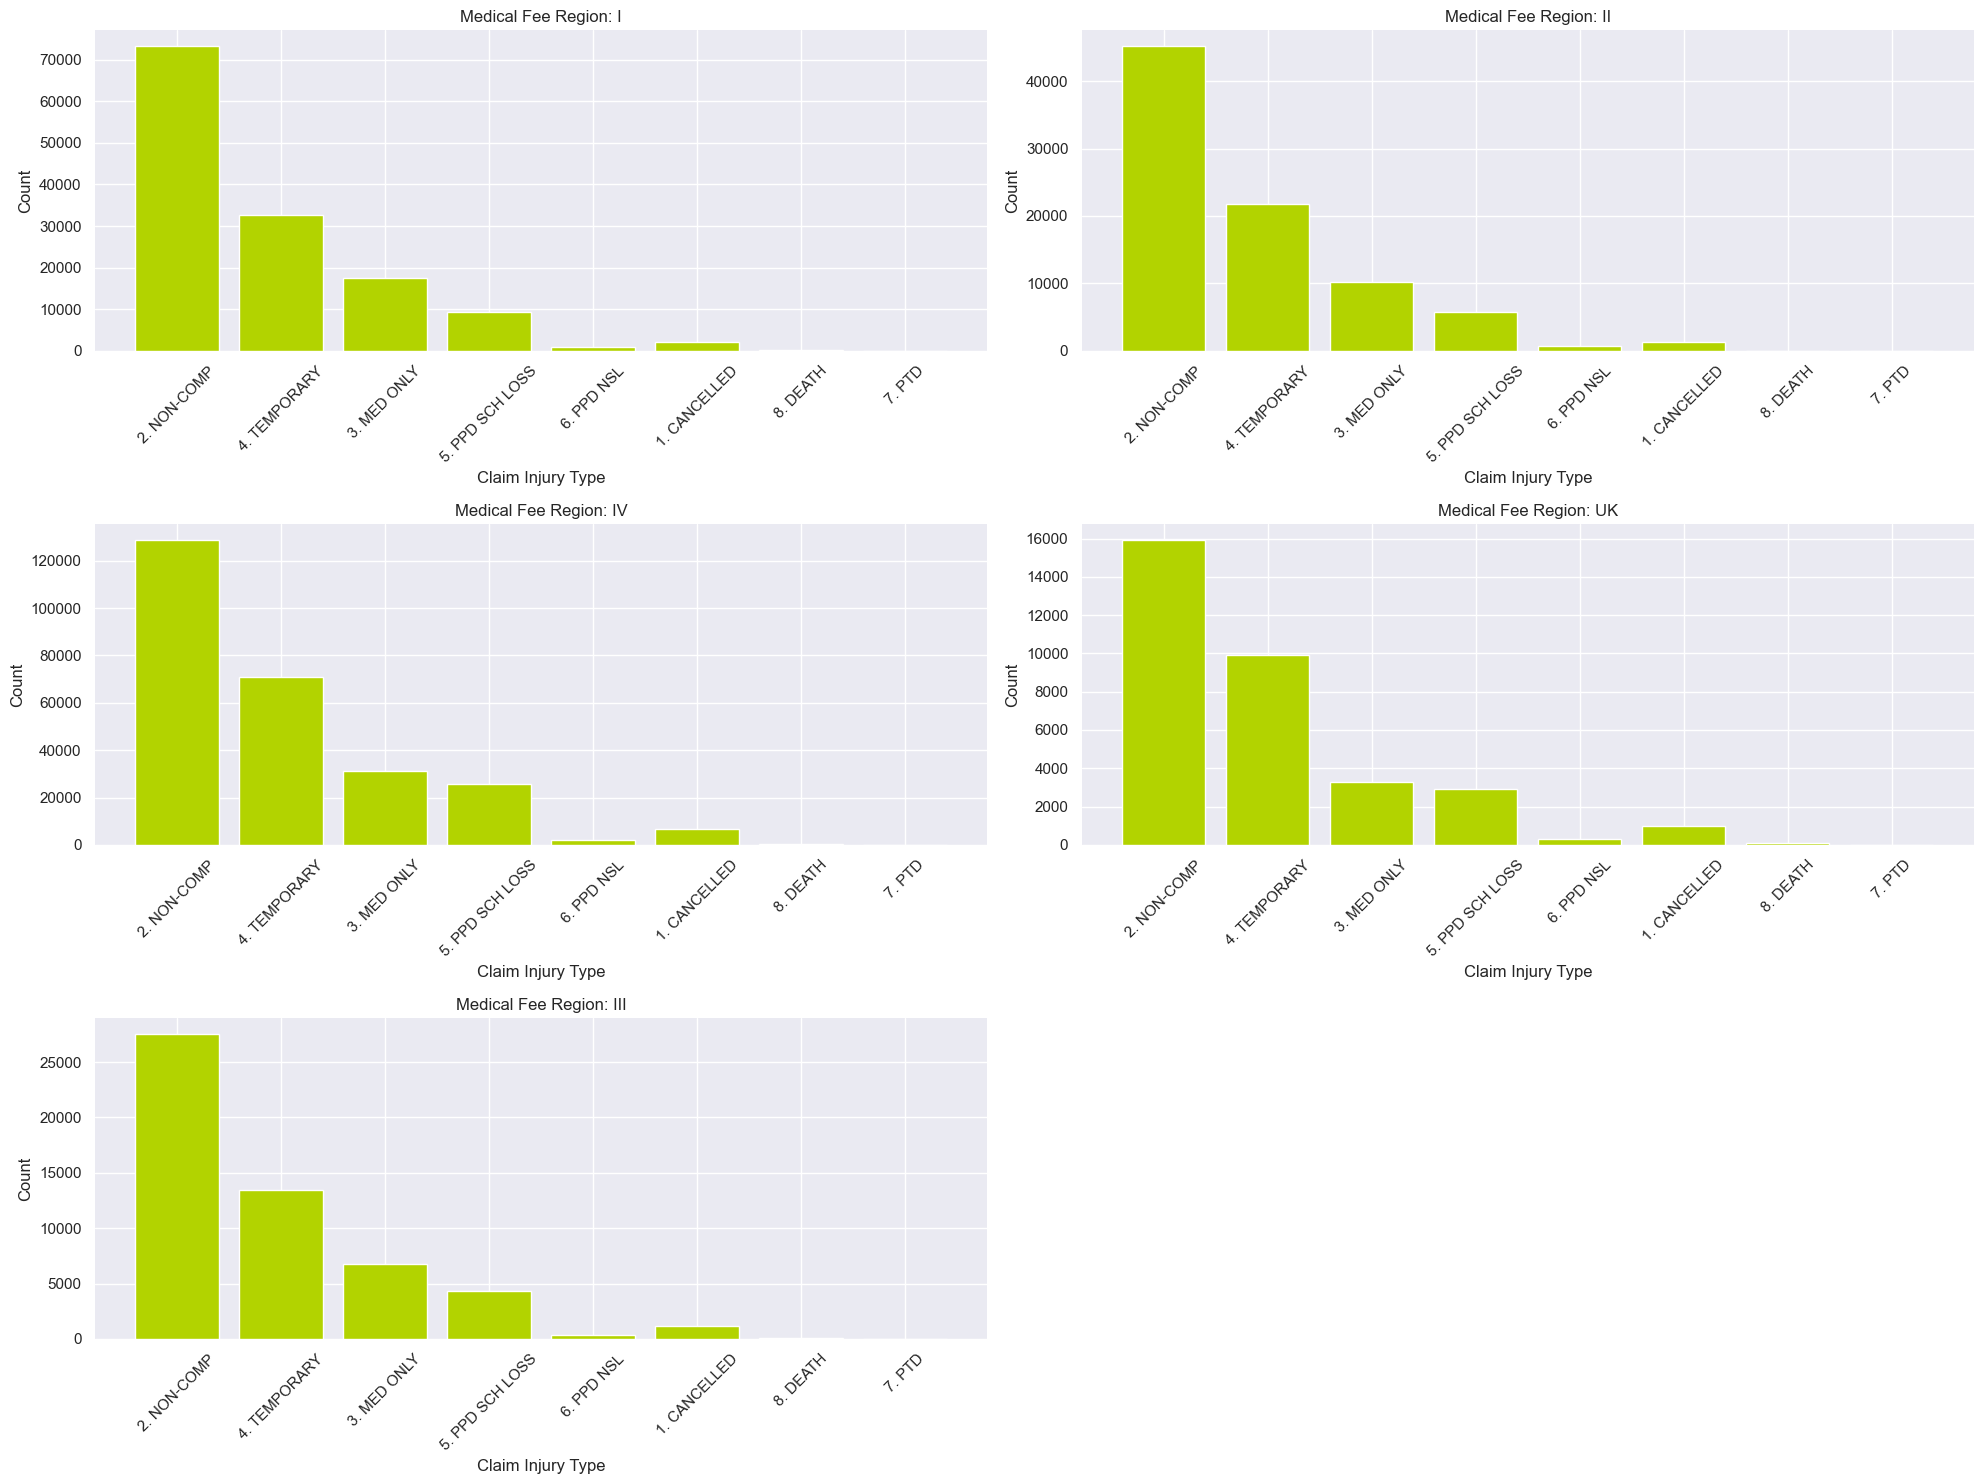

In [342]:
medical_fee_regions = df_train['Medical Fee Region'].unique()
claim_injury_types = df_train['Claim Injury Type'].unique()

fig, axes = plt.subplots(nrows=ceil(len(medical_fee_regions) / 2), ncols=2, figsize=(20, 15))
for ax, region in zip(axes.flatten(), medical_fee_regions):
    region_data = df_train[df_train['Medical Fee Region'] == region]
    claim_counts = region_data['Claim Injury Type'].value_counts().reindex(claim_injury_types, fill_value=0)
    ax.bar(claim_counts.index, claim_counts.values, color='#B2D300')
    ax.set_title(f'Medical Fee Region: {region}')
    ax.set_xlabel('Claim Injury Type')
    ax.set_ylabel('Count')
    ax.set_xticks(range(len(claim_counts.index)))
    ax.set_xticklabels(claim_counts.index, rotation=45)
    ax.grid(True)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
for ax in axes.flatten()[len(medical_fee_regions):]:
    fig.delaxes(ax)
plt.tight_layout()
plt.show()

The distribution remains the same in the first target variable.

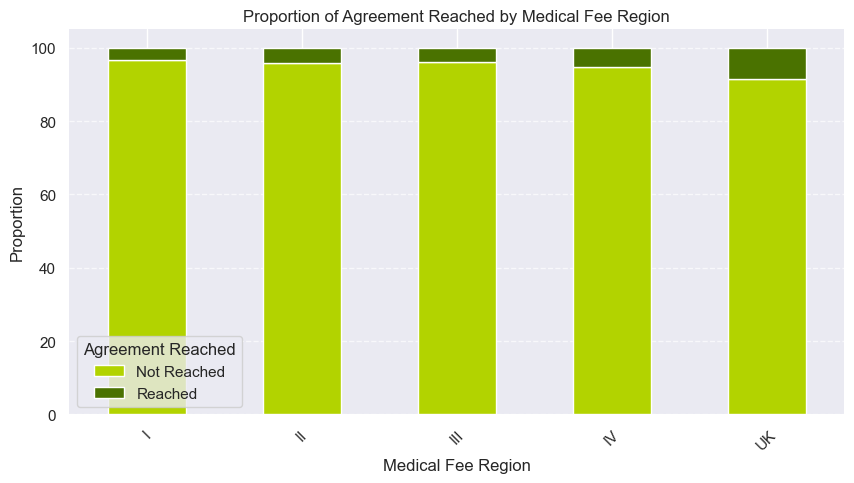

In [343]:
medfee_proportion = pd.crosstab(df_train['Medical Fee Region'], df_train['Agreement Reached'], normalize='index') * 100
colors = ['#B2D300', '#4A7200']
fig, ax = plt.subplots(figsize=(10, 5))
medfee_proportion.plot(kind='bar', stacked=True, color=colors, ax=ax)
plt.xlabel('Medical Fee Region')
plt.ylabel('Proportion')
plt.title('Proportion of Agreement Reached by Medical Fee Region')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.show()

As expected, the variable follows the same distribution and most of the cases are not agreed upon.

## C-2 Date

Relatively to the variable C-2 Date, the first thing to do is understand what this data represents. The group found the following information regarding the variable:

"Date of receipt of the Employer's Report of Work-Related Injury/Illness or equivalent (formerly Form C-2). Blank indicates no form received. For data sets published prior to the first quarter of 2022, the C-2 Date is the date of receipt of the “Employer’s Report of Work-Related Injury/Illness” for C-2. For data sets created in the first quarter of 2022 and forward, the C-2 Date is set to the earliest received date of equivalent injury/illness filings, including electronic data filed though the Board’s eClaims process."<br>

References:<br>
https://data.ny.gov/Government-Finance/Assembled-Workers-Compensation-Claims-Beginning-20/jshw-gkgu/about_data

Given that the data focuses mostly on the years of 2020 to 2022, the line chart for C-2 Forms will look into this period.

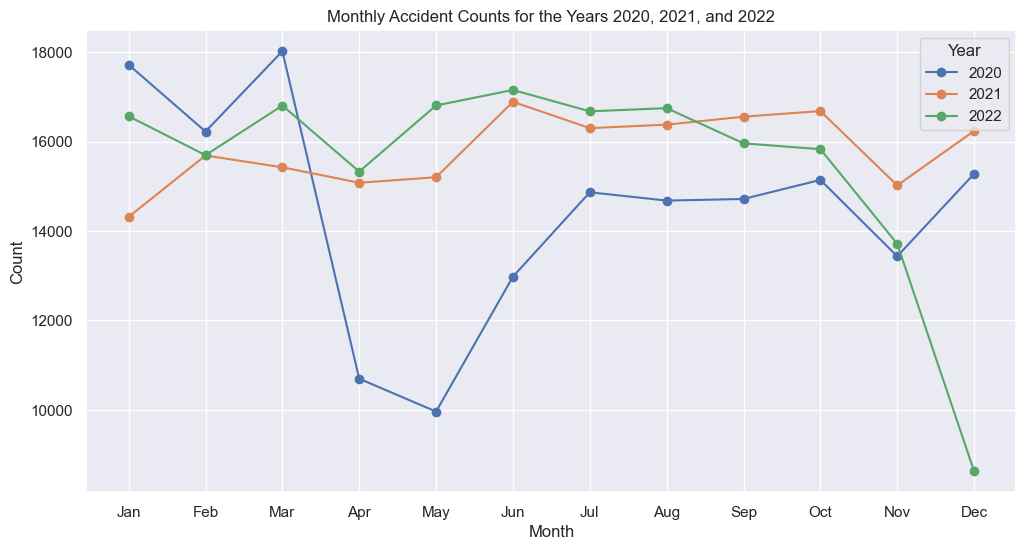

In [344]:
df_filtered = df_train[df_train['Accident Date'].dt.year.isin([2020, 2021, 2022])]
monthly_counts = df_filtered.groupby([df_filtered['Accident Date'].dt.year, df_filtered['Accident Date'].dt.month]).size().unstack(level=0)
plt.figure(figsize=(12, 6))
for year in [2020, 2021, 2022]:
    plt.plot(monthly_counts.index, monthly_counts[year], marker='o', label=str(year))

plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Monthly Accident Counts for the Years 2020, 2021, and 2022')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(title='Year')
plt.grid(True)
plt.show()

There appears to be no type of periodicity.

Now, the group will see if the time elapsed between the accident and the submission of the C-2 Form has an inpact on WCB's decision. For that, a helper variable will be created. Then it will be binned according to the following groupings:

- 1 week (7 days)
- 1 month (30 days)
- 3 Months (90 days)
- 6 months (180 days)
- 1 year (365 days)
- 365 x 10 (10 years)
- 365 x 60 (60 years, this group was created to encompass all observations)

In [345]:
df_train['days_to_c2'] = (df_train['C-2 Date'] - df_train['Accident Date']).dt.days

In [346]:
bins = (-1, 0, 7, 30, 90, 180, 365, 365*2, 365*10, 60*365)
labels = ['Same Day', '1 week', '1 month', '3 months', '6 months', '1 year', '2 years', '10 years', '10+ years']
df_train['days_to_c2_binned'] = pd.cut(df_train['days_to_c2'], bins=bins, labels=labels)

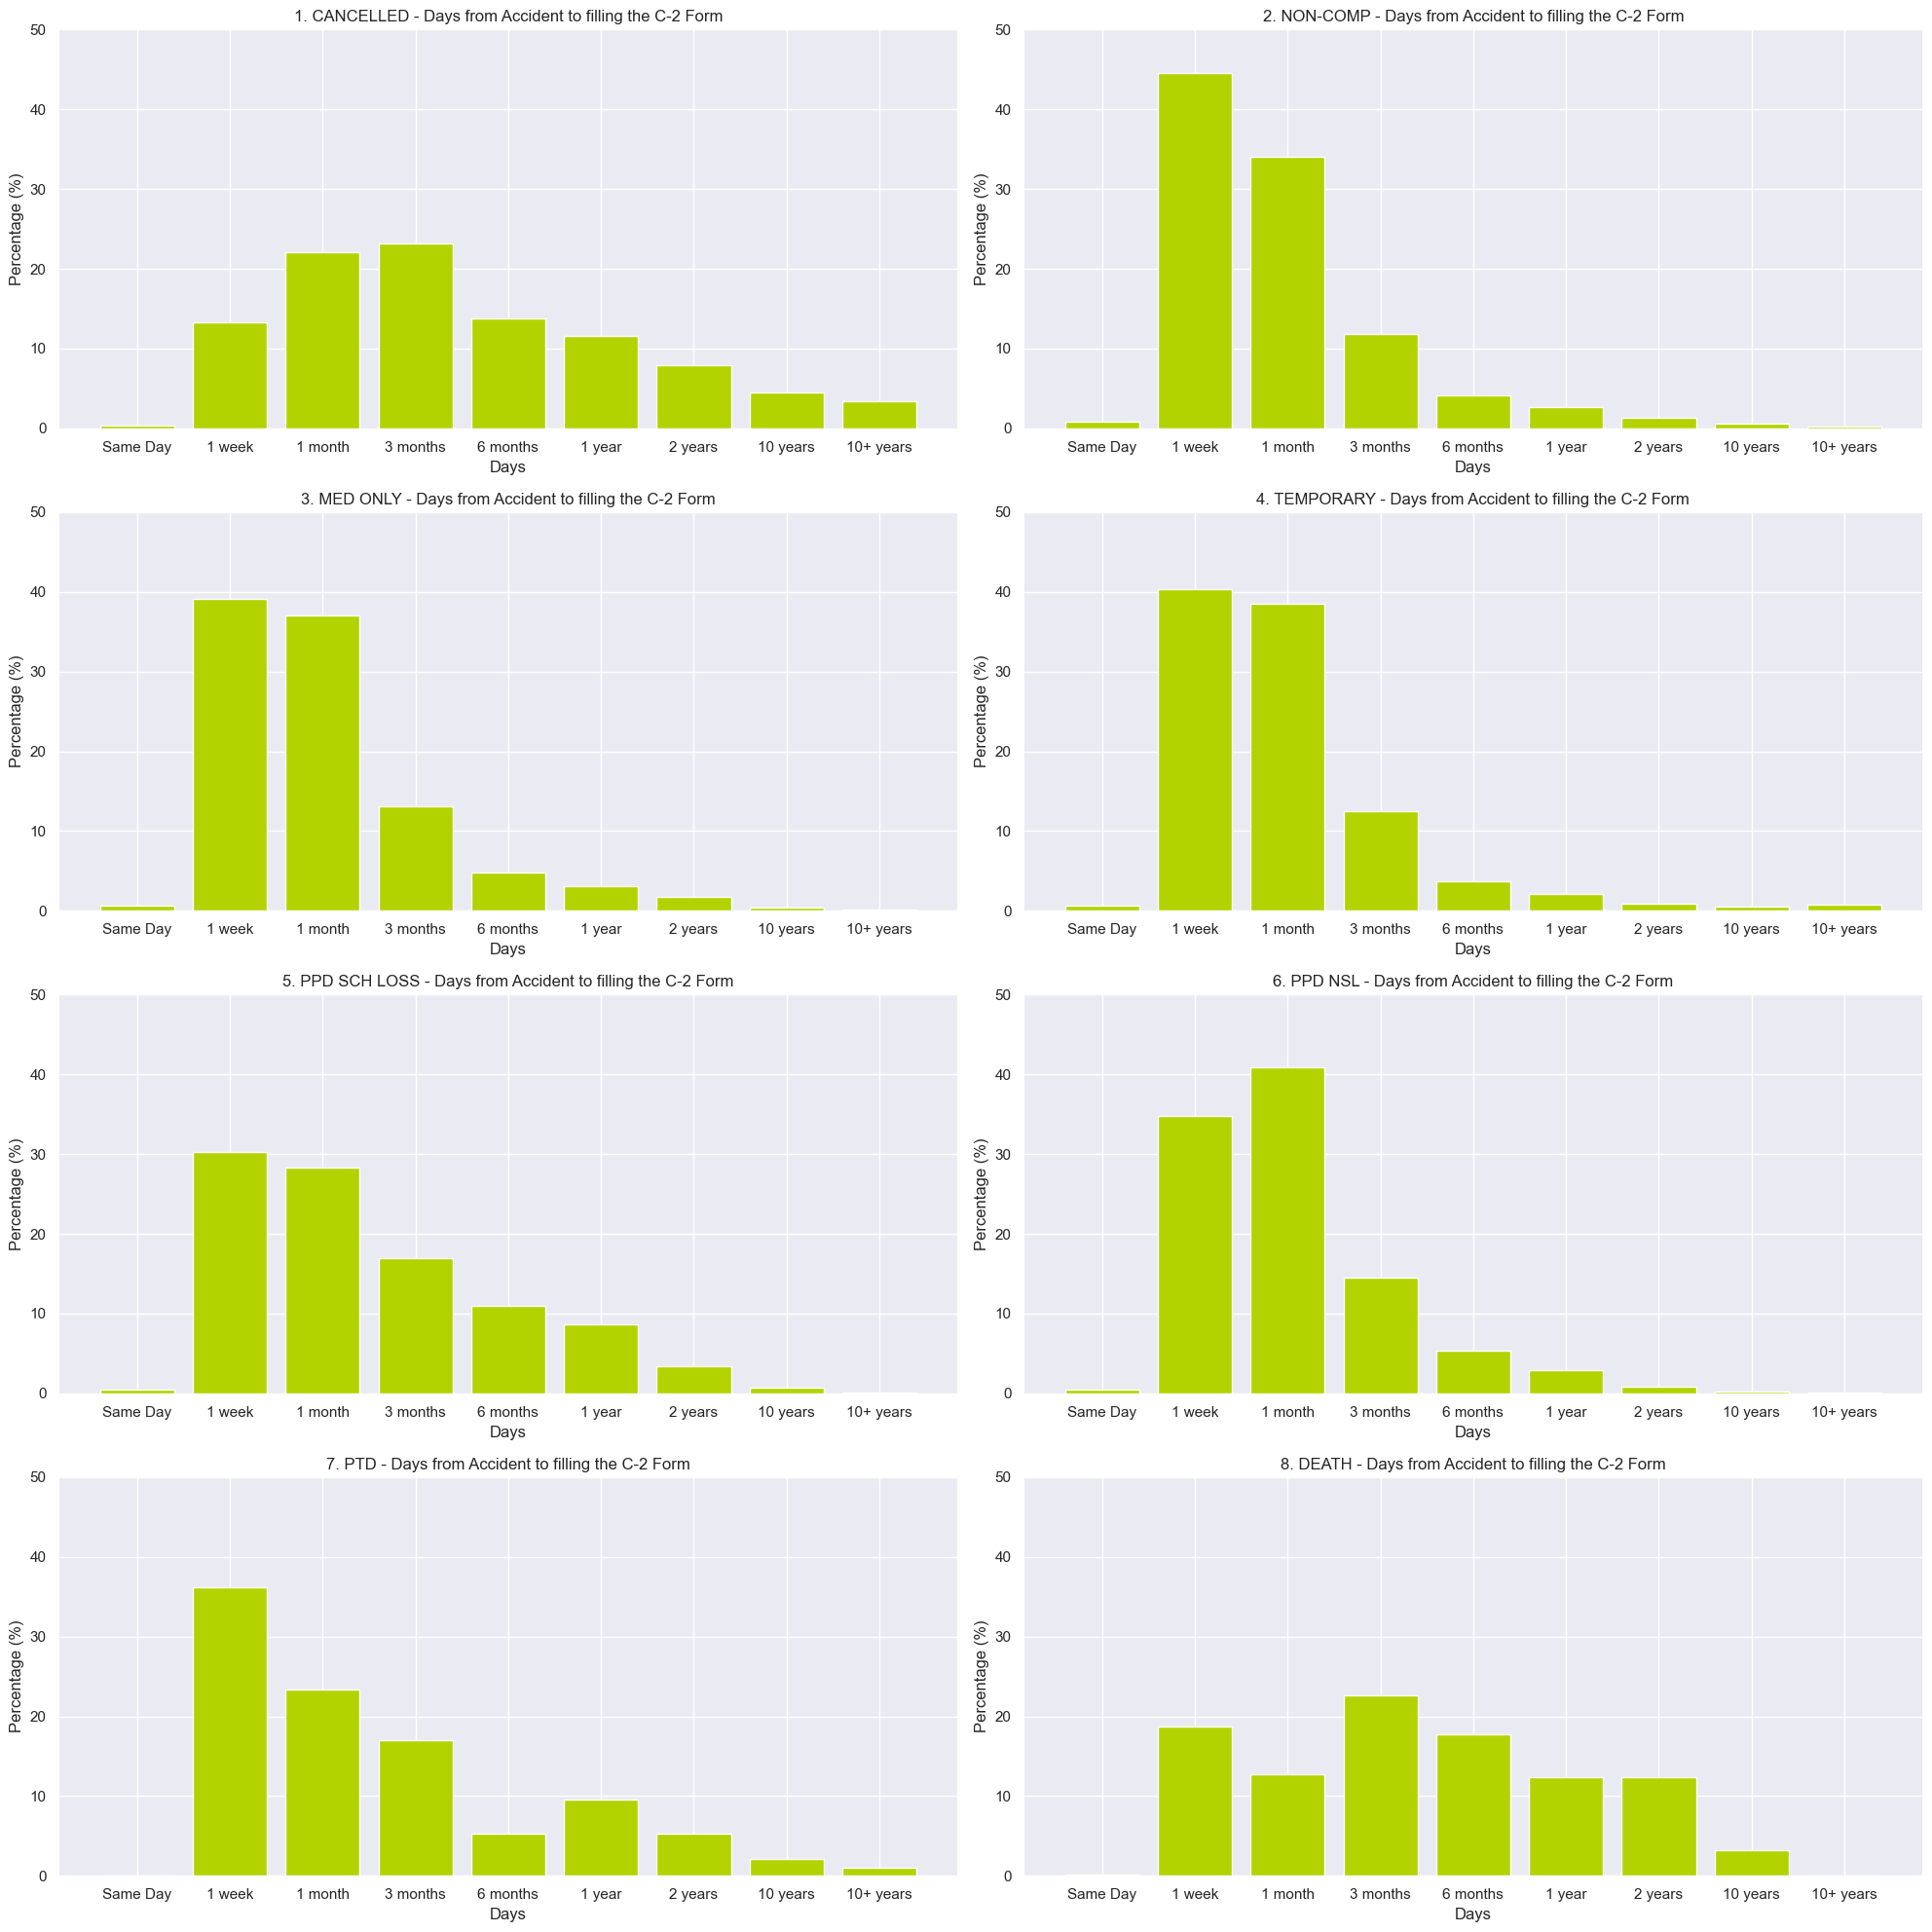

In [347]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 20))
claim_list = ['1. CANCELLED', '2. NON-COMP', '3. MED ONLY', '4. TEMPORARY', '5. PPD SCH LOSS', '6. PPD NSL', '7. PTD', '8. DEATH']

for ax, claim in zip(axes.flatten(), claim_list):
    days_accident_binned = df_train[df_train['Claim Injury Type'] == claim]['days_to_c2_binned'].value_counts().sort_index()
    bars = ax.bar(days_accident_binned.index.astype(str), days_accident_binned.values / days_accident_binned.values.sum() * 100, color='#B2D300')
    ax.set_title(f'{claim} - Days from Accident to filling the C-2 Form')
    ax.set_xlabel('Days')
    ax.set_ylabel('Percentage (%)')
    ax.set_ylim(0, 50)
    ax.grid(True)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
plt.tight_layout()
plt.show()

It seems that, in most cases, the form is filled out up to a month after the accident happens. This is true for all kinds of decisions. Cases involving death seem to be the exception. In these cases, there is a more uniform distribution. This could be that employees don't bother to fill out the form in such a hurry if a death occurred.

Given that C-2 is the date of a form filled out by the employee after the accident, "C-2 Date" cannot happen before "Accident Date". In order to ensure the data is consistent, it must be confirmed if such cases occured:

In [348]:
c2_before_accident = df_train[df_train['days_to_c2'] < 0]
print(f"Number of times the C-2 report is filled before the accident happens: {c2_before_accident.shape[0]}")

Number of times the C-2 report is filled before the accident happens: 982


These rows will be addressed in the data cleaning stage.

## Code Variables

In the dataset, there are a lot of columns regarding codes (industry codes, injury codes, etc.). These codes have a high cardinality (there are between 50 to 70 unique values) and, as such, they are of no use to the model or visualization.

In [349]:
unique_cause_codes = df_train[['WCIO Cause of Injury Code', 'WCIO Cause of Injury Description']].drop_duplicates()
unique_nature_codes = df_train[['WCIO Nature of Injury Code', 'WCIO Nature of Injury Description']].drop_duplicates()
unique_body_codes = df_train[['WCIO Part Of Body Code', 'WCIO Part Of Body Description']].drop_duplicates()

In [350]:
unique_body_codes

WCIO Part Of Body Code  \
0                         62   
1                         38   
2                         10   
4                         36   
8                         60   
9                         14   
10                        55   
11                        53   
12                        37   
14                        42   
16                        61   
17                        54   
18                        51   
21                        52   
24                        17   
28                        34   
29                        23   
40                        35   
41                        18   
44                        31   
45                        25   
47                        56   
53                        32   
66                        30   
70                        90   
71                        91   
74                        20   
77                        44   
100                       39   
105                       13   
111                       50   
113                       43   
122                       33   
128                       -9   
151                       22   
167                       41   
175                       11   
190                       57   
200                       19   
210                     <NA>   
241                       16   
252                       66   
302                       40   
330                       99   
342                       65   
387                       46   
434                       15   
470                       58   
583                       48   
673                       49   
827                       21   
973                       63   
1009                      12   
1158                      45   
1185                      64   
1636                      24   
2761                      47   
4856                      26   

                          WCIO Part Of Body Description  
0                                              BUTTOCKS  
1                                           SHOULDER(S)  
2                                  MULTIPLE HEAD INJURY  
4                                             FINGER(S)  
8                                                 LUNGS  
9                                                EYE(S)  
10                                                ANKLE  
11                                                 KNEE  
12                                                THUMB  
14                                      LOWER BACK AREA  
16                              ABDOMEN INCLUDING GROIN  
17                                            LOWER LEG  
18                                                  HIP  
21                                            UPPER LEG  
24                                                MOUTH  
28                                                WRIST  
29                                          SPINAL CORD  
40                                                 HAND  
41                                          SOFT TISSUE  
44                                            UPPER ARM  
45                                          SOFT TISSUE  
47                                                 FOOT  
53                                                ELBOW  
66                           MULTIPLE UPPER EXTREMITIES  
70                  MULTIPLE BODY PARTS (INCLUDING BODY  
71               BODY SYSTEMS AND MULTIPLE BODY SYSTEMS  
74                                 MULTIPLE NECK INJURY  
77                                                CHEST  
100                                 WRIST (S) & HAND(S)  
105                                              EAR(S)  
111                          MULTIPLE LOWER EXTREMITIES  
113                                                DISC  
122                                           LOWER ARM  
128                                            MULTIPLE  
151                                                DISC  
167                          

### Body Groups

To reduce the dimensionality, the codes can be grouped into 5 groups:
- Head
- Torso
- Arms
- Legs
- Other (for unkown codes)

This has to be done manually.

In [351]:
head = [
    "MULTIPLE HEAD INJURY", "EYE(S)", "MOUTH", "EAR(S)", "SKULL", "FACIAL BONES", 
    "TEETH", "NOSE", "BRAIN", "LARYNX", "TRACHEA", "MULTIPLE NECK INJURY", "SOFT TISSUE"
]

torso = [
    "TORSO", "SHOULDER(S)", "LUNGS", "BUTTOCKS", "LOWER BACK AREA", "ABDOMEN INCLUDING GROIN", 
    "HIP", "CHEST", "DISC", "UPPER BACK AREA", "PELVIS", "HEART", "VERTEBRAE", 
    "LUMBAR & OR SACRAL VERTEBRAE (VERTEBRA", "SACRUM AND COCCYX", "SPINAL CORD", "MULTIPLE TRUNK", "SPINAL CORD", "INTERNAL ORGANS"
]

arm = [
    "ARMS", "FINGER(S)", "THUMB", "WRIST", "HAND", "UPPER ARM", "ELBOW", "WRIST (S) & HAND(S)", "MULTIPLE UPPER EXTREMITIES"
]

leg = [
    "LEGS", "ANKLE", "KNEE", "LOWER LEG", "UPPER LEG", "FOOT", "TOES", "GREAT TOE", 
    "MULTIPLE LOWER EXTREMITIES"
]

multiple_body_parts = [ 'ARTIFICIAL APPLIANCE', "INSUFFICIENT INFO TO PROPERLY IDENTIFY - UNCLASSIFIED",
                        'NO PHYSICAL INJURY', 'MULTIPLE BODY PARTS (INCLUDING BODY', 'BODY SYSTEMS AND MULTIPLE BODY SYSTEMS',
                         'WHOLE BODY', 'MULTIPLE']


In [352]:
df_train['body_group'] = np.nan
df_train.loc[df_train['WCIO Part Of Body Description'].isin(head), 'body_group'] = 'Head'
df_train.loc[df_train['WCIO Part Of Body Description'].isin(torso), 'body_group'] = 'Torso'
df_train.loc[df_train['WCIO Part Of Body Description'].isin(arm), 'body_group'] = 'Arms'
df_train.loc[df_train['WCIO Part Of Body Description'].isin(leg), 'body_group'] = 'Legs'
df_train.loc[df_train['WCIO Part Of Body Description'].isin(multiple_body_parts), 'body_group'] = 'Multiple Body Parts'

C:\Users\migue\AppData\Local\Temp\ipykernel_18648\1013112835.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Head' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_train.loc[df_train['WCIO Part Of Body Description'].isin(head), 'body_group'] = 'Head'


<BarContainer object of 5 artists>

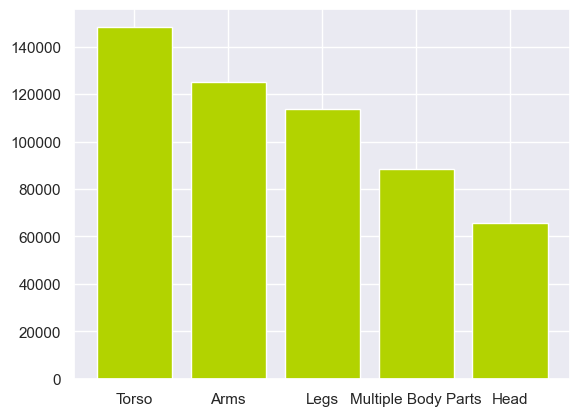

In [353]:
df_train['body_group'].value_counts()
plt.bar(df_train['body_group'].value_counts().index, df_train['body_group'].value_counts().values, color='#B2D300')

Most of our observations suffered injuries in the torso area.

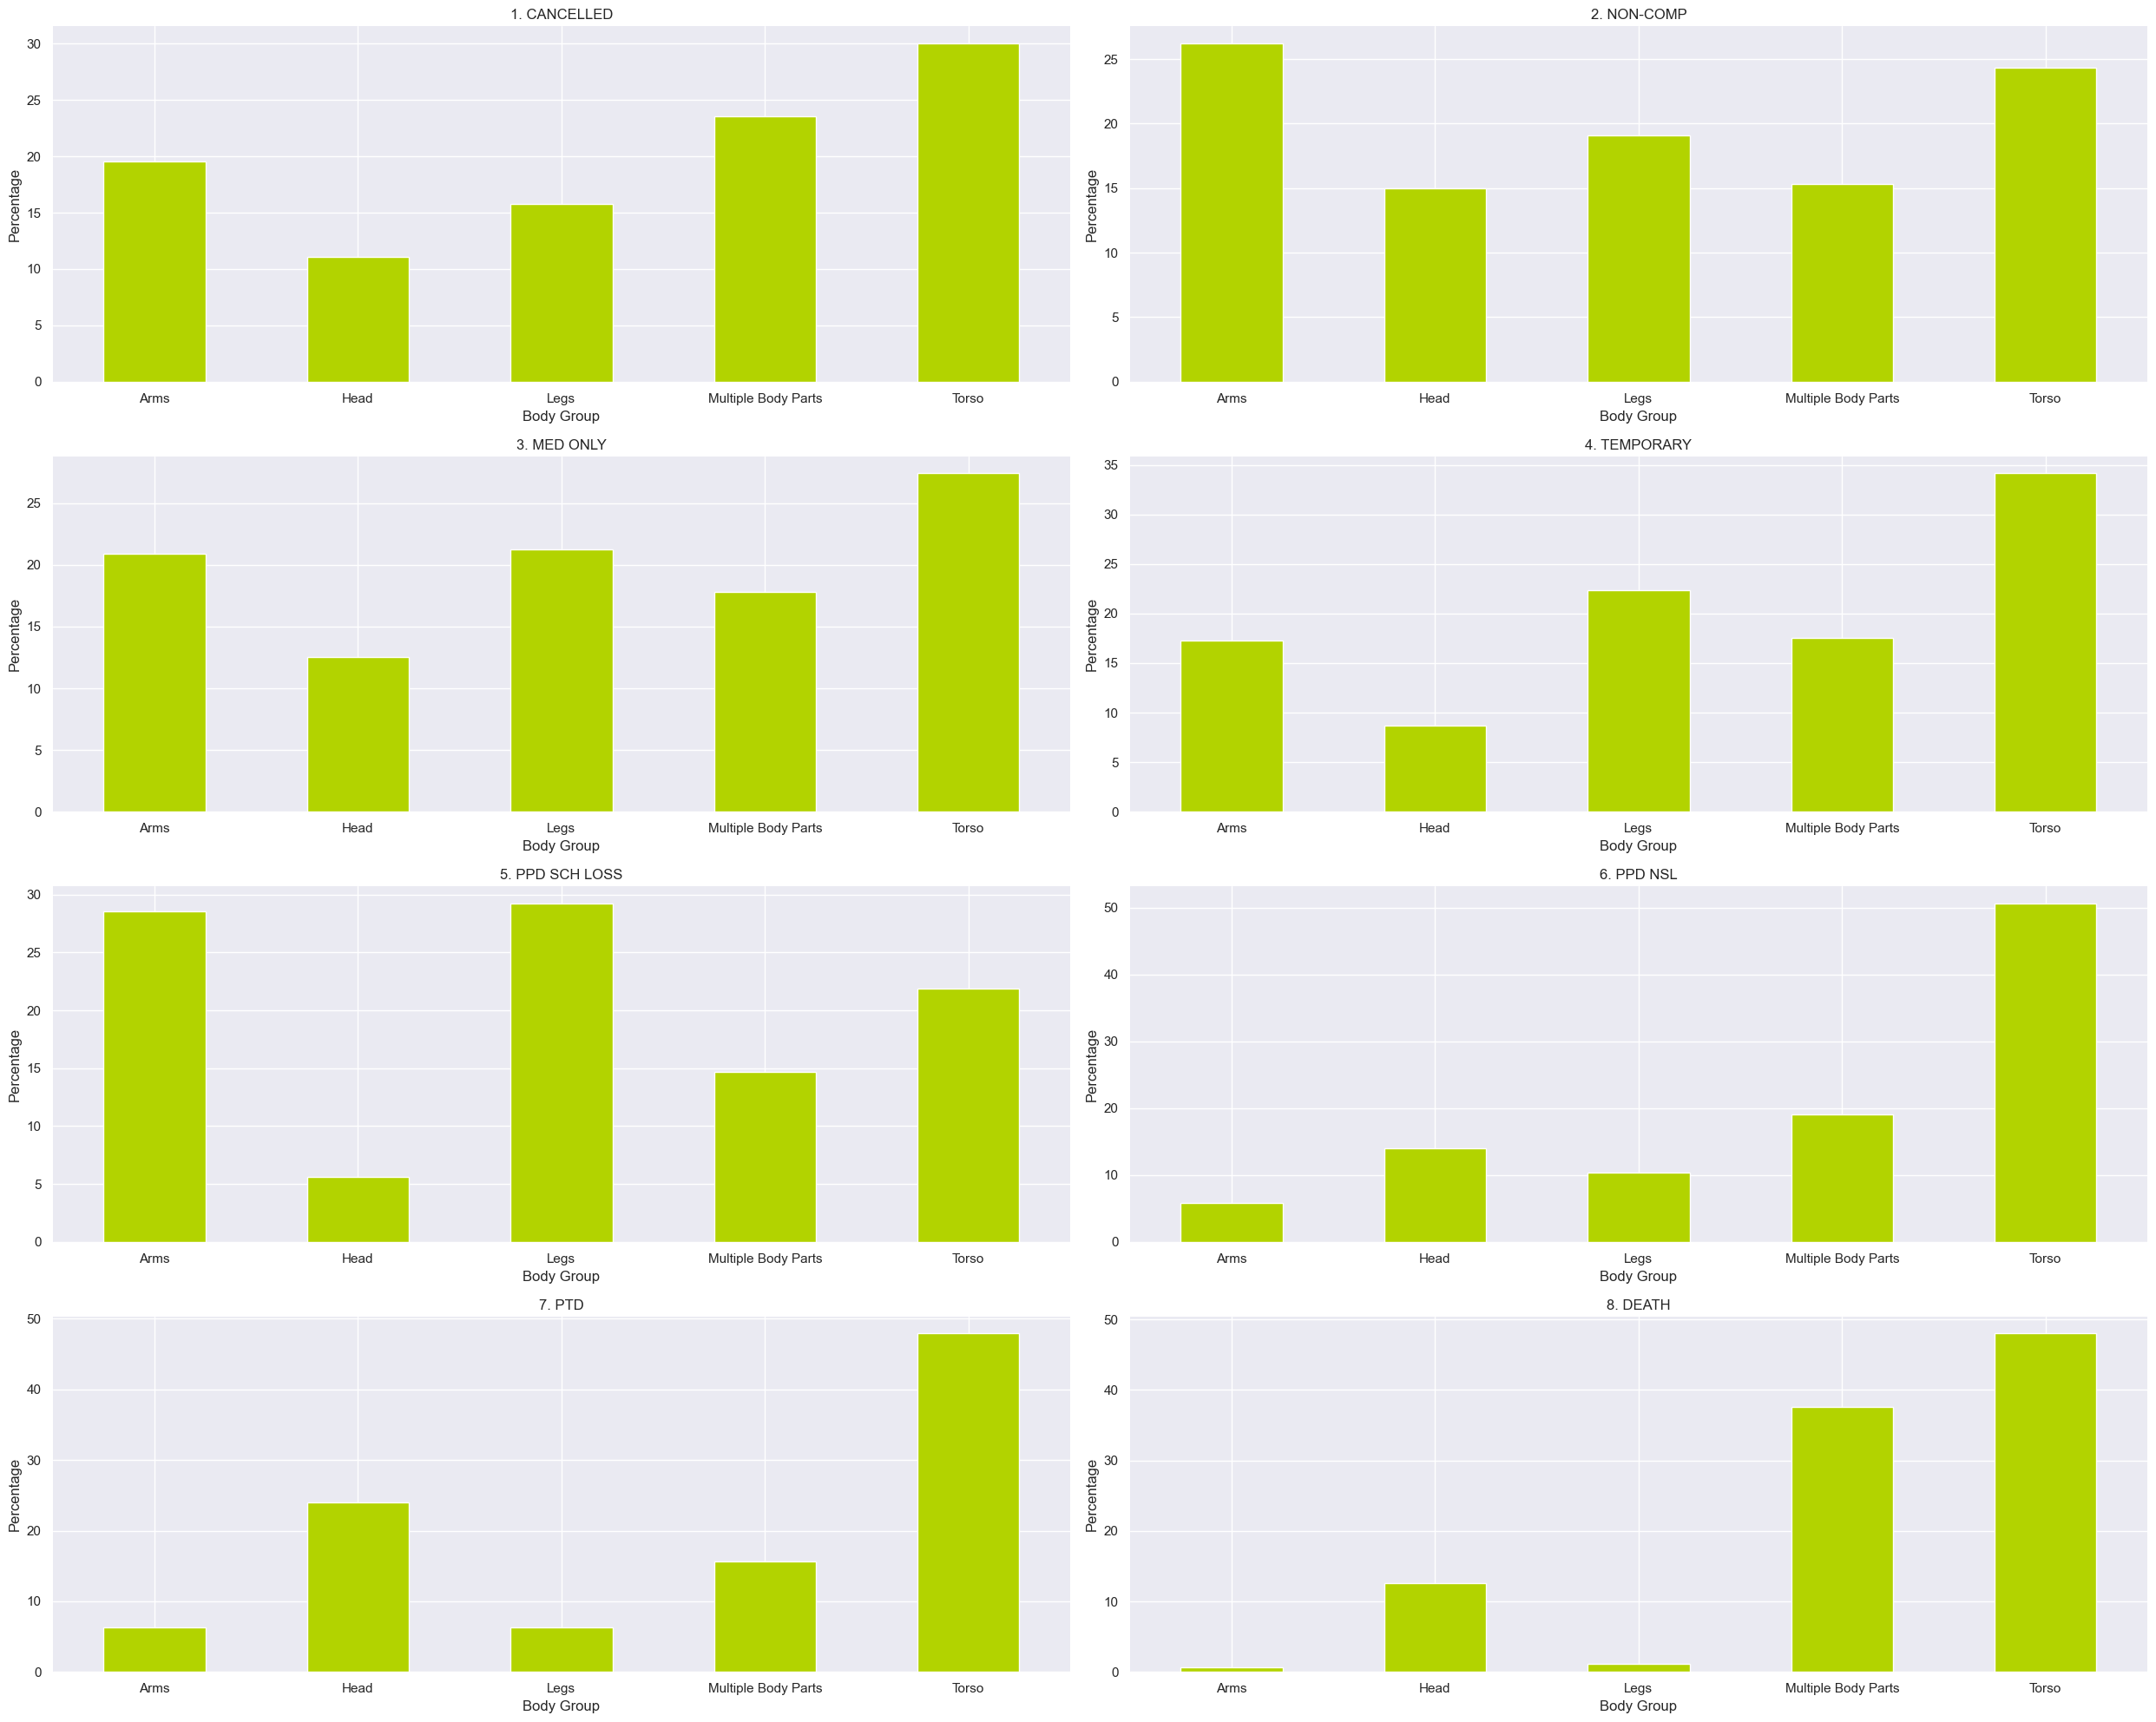

In [354]:
body_group_percentage = df_train.groupby(['Claim Injury Type', 'body_group']).size().unstack().apply(lambda x: x / x.sum() * 100, axis=1)
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(25, 20))
axes = axes.flatten()
for ax, claim_type in zip(axes, body_group_percentage.index):
    body_group_percentage.loc[claim_type].plot(kind='bar', ax=ax, color='#B2D300')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    ax.set_title(claim_type)
    ax.set_xlabel('Body Group')
    ax.set_ylabel('Percentage')
    ax.grid(True)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
plt.tight_layout()
plt.show()

The 'Other' category grows as the cases get more severe, reaching its peak in the most severe cases. The 'Head' category also shows a slight increase in the 7th and 8th categories.

In [355]:
unique_nature_codes

WCIO Nature of Injury Code  \
0                               10   
1                               49   
2                                7   
4                               43   
6                               40   
7                               71   
8                               59   
11                              37   
12                               4   
13                              52   
21                              28   
36                              25   
52                              90   
65                              46   
94                              16   
131                             80   
148                             34   
157                              3   
176                             78   
191                              1   
210                           <NA>   
236                             36   
272                             13   
359                             53   
395                             42   
481                             65   
486                             31   
589                             77   
660                             47   
840                             19   
1063                            72   
1066                            60   
1202                            68   
1724                            54   
1818                            69   
1821                            73   
1857                             2   
1991                            41   
4040                            66   
4269                            91   
4355                            58   
6197                            55   
6623                            83   
6863                            74   
14269                           32   
14516                           75   
14645                           22   
14820                           61   
14847                           67   
25299                           76   
36872                           30   
51036                           62   
113801                          64   
124046                          38   
142860                          79   
168368                          70   
399339                          63   

                        WCIO Nature of Injury Description  
0                                               CONTUSION  
1                                          SPRAIN OR TEAR  
2                                              CONCUSSION  
4                                                PUNCTURE  
6                                              LACERATION  
7              ALL OTHER OCCUPATIONAL DISEASE INJURY, NOC  
8                        ALL OTHER SPECIFIC INJURIES, NOC  
11                                           INFLAMMATION  
12                                                   BURN  
13                                         STRAIN OR TEAR  
21                                               FRACTURE  
36                                           FOREIGN BODY  
52                        MULTIPLE PHYSICAL INJURIES ONLY  
65                                                RUPTURE  
94                                            DISLOCATION  
131                      ALL OTHER CUMULATIVE INJURY, NOC  
148                                                HERNIA  
157                                       ANGINA PECTORIS  
176                                CARPAL TUNNEL SYNDROME  
191                                    NO PHYSICAL INJURY  
210                                                   NaN  
236                                             INFECTION  
272                                              CRUSHING  
359                                               SYNCOPE  
395             POISONING - GENERAL (NOT OD OR CUMULATIVE  
481                                 RESPIRATORY DISORDERS  
486                            HEARING LOSS OR IMPAIRMENT  
589                                         MENTAL STRESS  
660                                             SEVERANCE  
840

### Injury Nature

The same can be done for the diseases, grouping them will reduce their dimensionality. They are grouped as follows:
- External Physical Trauma (caused by direct impact, injury, or physical force)
- Chronic and Repetitive Stress Injuries (due to repetitive motion or long-term strain)
- Cumulative and Occupational Injuries (work-related conditions or cumulative injuries)
- Infectious Diseases (disease or infection-related injuries)
- Poisoning and Chemical Exposure (injuries related to toxic substances or reactions)
- Cardiovascular and Respiratory Conditions (heart, lung, and vascular system-related)
- Neurological and Sensory Conditions (affecting the nervous system, vision, or hearing)
- Mental Health and Stress-Related Conditions (psychological or emotional conditions)
- Other (Multiple injuries and special/rare conditions combined)

Again, this needs to be done manually and in the case of some injuries, research is necessary.

In [356]:
physical_trauma = ["CONTUSION", "SPRAIN OR TEAR", "CONCUSSION", "PUNCTURE", "LACERATION", "BURN", 
                   "STRAIN OR TEAR", "FRACTURE", "FOREIGN BODY", "RUPTURE", "DISLOCATION", "CRUSHING", 
                   "SEVERANCE", "ELECTRIC SHOCK", "AMPUTATION"]

repetitive_stress_injuries = ["INFLAMMATION", "CARPAL TUNNEL SYNDROME", "HERNIA", "VDT - RELATED DISEASES"]

cumulative_occupational_injuries = ["ALL OTHER OCCUPATIONAL DISEASE INJURY, NOC", "ALL OTHER SPECIFIC INJURIES, NOC", "ALL OTHER CUMULATIVE INJURY, NOC", 
                                    "DUST DISEASE, NOC", "ASBESTOSIS", "SILICOSIS", "BLACK LUNG", "BYSSINOSIS", "DERMATITIS"]

infectious_diseases = ["INFECTION", "COVID-19", "CONTAGIOUS DISEASE", "HEPATITIS C", "AIDS"]

poisoning_chemical_exposure = ["POISONING - GENERAL (NOT OD OR CUMULATIVE", "POISONING - CHEMICAL, (OTHER THAN METALS)", "POISONING - METAL", 
                               "RADIATION", "ADVERSE REACTION TO A VACCINATION OR INOCULATION"]

cardiovascular_respiratory = ["ANGINA PECTORIS", "MYOCARDIAL INFARCTION", "RESPIRATORY DISORDERS", 
                              "VASCULAR", "ASPHYXIATION", "HEAT PROSTRATION"]

neurological_sensory = ["HEARING LOSS OR IMPAIRMENT", "LOSS OF HEARING", "VISION LOSS", "ENUCLEATION", "SYNCOPE"]

mental_health_stress = ["MENTAL STRESS", "MENTAL DISORDER"]

other_injury = ["MULTIPLE PHYSICAL INJURIES ONLY", "MULTIPLE INJURIES INCLUDING BOTH PHYSICAL AND PSYCHOLOGICAL", 
         "FREEZING", "RADIATION", "ADVERSE REACTION TO A VACCINATION OR INOCULATION", "CANCER", 'NO PHYSICAL INJURY']


In [357]:
df_train['injury_type'] = np.nan
df_train.loc[df_train['WCIO Nature of Injury Description'].isin(physical_trauma), 'injury_type'] = 'Physical Trauma'
df_train.loc[df_train['WCIO Nature of Injury Description'].isin(repetitive_stress_injuries), 'injury_type'] = 'Repetitive Stress Injuries'
df_train.loc[df_train['WCIO Nature of Injury Description'].isin(cumulative_occupational_injuries), 'injury_type'] = 'Cumulative Occupational Injuries'
df_train.loc[df_train['WCIO Nature of Injury Description'].isin(infectious_diseases), 'injury_type'] = 'Infectious Diseases'
df_train.loc[df_train['WCIO Nature of Injury Description'].isin(poisoning_chemical_exposure), 'injury_type'] = 'Poisoning/Chemical Exposure'
df_train.loc[df_train['WCIO Nature of Injury Description'].isin(cardiovascular_respiratory), 'injury_type'] = 'Cardiovascular/Respiratory'
df_train.loc[df_train['WCIO Nature of Injury Description'].isin(neurological_sensory), 'injury_type'] = 'Neurological/Sensory'
df_train.loc[df_train['WCIO Nature of Injury Description'].isin(mental_health_stress), 'injury_type'] = 'Mental Health/Stress'
df_train.loc[df_train['WCIO Nature of Injury Description'].isin(other_injury), 'injury_type'] = 'Other'

C:\Users\migue\AppData\Local\Temp\ipykernel_18648\2260031642.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Physical Trauma' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_train.loc[df_train['WCIO Nature of Injury Description'].isin(physical_trauma), 'injury_type'] = 'Physical Trauma'


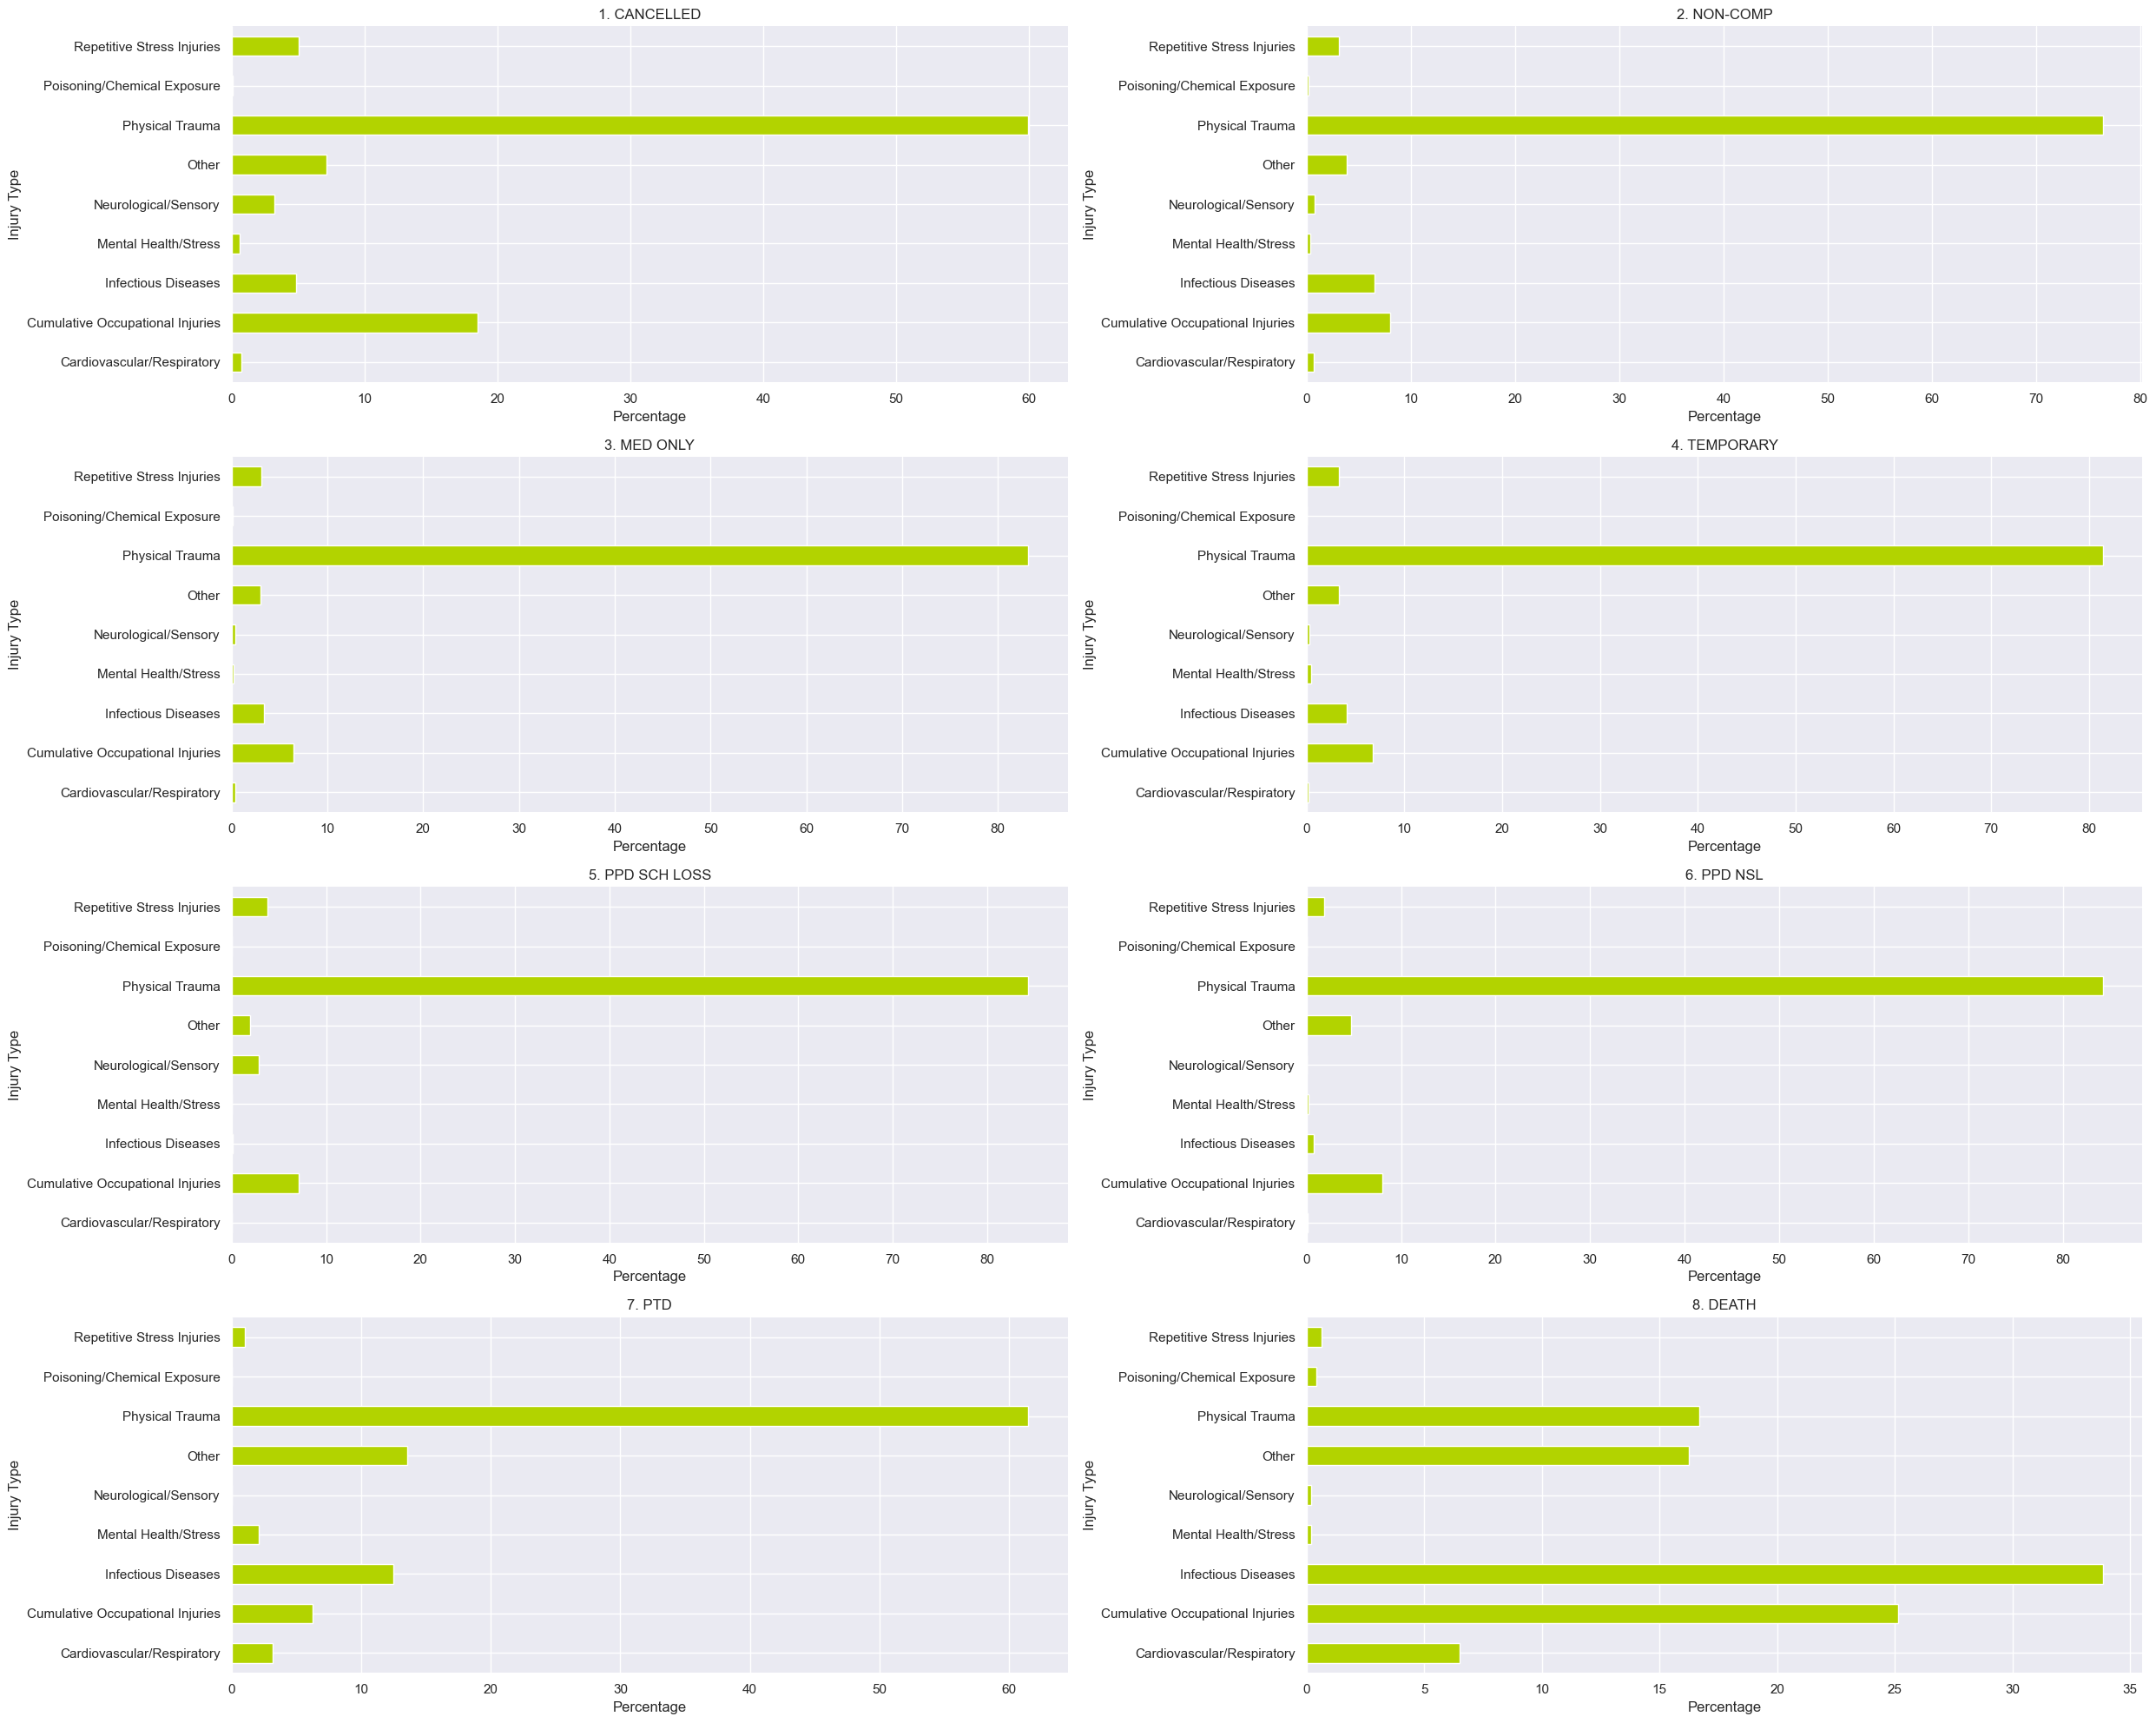

In [358]:
injury_group_percentage = df_train.groupby(['Claim Injury Type', 'injury_type']).size().unstack().apply(lambda x: x / x.sum() * 100, axis=1)
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(25, 20))
axes = axes.flatten()
for ax, claim_type in zip(axes, injury_group_percentage.index):
    injury_group_percentage.loc[claim_type].plot(kind='barh', ax=ax, color='#B2D300')
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
    ax.set_title(claim_type)
    ax.set_ylabel('Injury Type')
    ax.set_xlabel('Percentage')
    ax.grid(True)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
plt.tight_layout()
plt.show()

This graph, like some of the graphs showed before, changes the most in cases where death is involved. Other types of cases are not so easily separated by these codes, as the increaases and decreases are only minor.

In [359]:
for i in unique_cause_codes['WCIO Cause of Injury Description']:
    print(i)

FROM LIQUID OR GREASE SPILLS
REPETITIVE MOTION
OBJECT BEING LIFTED OR HANDLED
HAND TOOL, UTENSIL; NOT POWERED
FALL, SLIP OR TRIP, NOC
CUT, PUNCTURE, SCRAPE, NOC
OTHER - MISCELLANEOUS, NOC
STRUCK OR INJURED, NOC
FALLING OR FLYING OBJECT
CHEMICALS
COLLISION OR SIDESWIPE WITH ANOTHER VEHICLE
LIFTING
TWISTING
ON SAME LEVEL
STRAIN OR INJURY BY, NOC
MOTOR VEHICLE, NOC
FROM DIFFERENT LEVEL (ELEVATION)
PUSHING OR PULLING
FOREIGN MATTER (BODY) IN EYE(S)
FELLOW WORKER, PATIENT OR OTHER PERSON
STEAM OR HOT FLUIDS
STATIONARY OBJECT
ON ICE OR SNOW
ABSORPTION, INGESTION OR INHALATION, NOC
PERSON IN ACT OF A CRIME
OBJECT BEING LIFTED OR HANDLED
INTO OPENINGS
ON STAIRS
FROM LADDER OR SCAFFOLDING
SLIP, OR TRIP, DID NOT FALL
JUMPING OR LEAPING
OBJECT BEING LIFTED OR HANDLED
MOTOR VEHICLE
RUBBED OR ABRADED, NOC
REACHING
OBJECT HANDLED
HOT OBJECTS OR SUBSTANCES
ELECTRICAL CURRENT
HOLDING OR CARRYING
CAUGHT IN, UNDER OR BETWEEN, NOC
nan
FIRE OR FLAME
CUMULATIVE, NOC
POWERED HAND TOOL, APPLIANCE
STRIKING AG

### Cause of Injury

The causes of accident can also be grouped:
- Slips, Trips, and Falls (related to losing balance or falling)
- Lifting, Carrying, and Handling (injuries related to lifting or handling objects)
- Struck by or Contact with Objects (injuries from being hit or coming into contact with objects)
- Vehicle and Machinery Accidents (related to collisions, crashes, or machine injuries)
- Chemical, Environmental, and Biological Hazards (exposure to harmful substances or environments)
- Manual Tools and Physical Operations (injuries caused by tools or physical operations)
- Repetitive Motion and Strain (injuries from repeated actions or excessive strain)
- Miscellaneous Causes (other causes that don’t fit into the above categories)

Note: 'NOC' means 'Not Otherwise Classified', this code is used for observations that do not fit into a specific classification/category. 'FALL, SLIP OR TRIP, NOC' means it is a fall, slip or trip that does not fit in the categories present in the list such as snow or stairs.

References:<br>
https://workinjuryrights.com/glossary/not-otherwise-classified-noc/

In [360]:
slips_trips_falls = ["FROM LIQUID OR GREASE SPILLS", "FALL, SLIP OR TRIP, NOC", "ON SAME LEVEL", "FROM DIFFERENT LEVEL (ELEVATION)", 
                     "ON ICE OR SNOW", "INTO OPENINGS", "ON STAIRS", "FROM LADDER OR SCAFFOLDING", "SLIP, OR TRIP, DID NOT FALL", 
                     "JUMPING OR LEAPING"]

lifting_carrying_handling = ["OBJECT BEING LIFTED OR HANDLED", "LIFTING", "PUSHING OR PULLING", "HOLDING OR CARRYING", 
                             "OBJECT HANDLED", "OBJECT HANDLED BY OTHERS"]

struck_by_or_contact = ["STRUCK OR INJURED, NOC", "FALLING OR FLYING OBJECT", "STEAM OR HOT FLUIDS", 
                        "STATIONARY OBJECT", "ELECTRICAL CURRENT", "HOT OBJECTS OR SUBSTANCES", 
                        "CAUGHT IN, UNDER OR BETWEEN, NOC", "FIRE OR FLAME", "CONTACT WITH, NOC", 
                        "BROKEN GLASS", "STEPPING ON SHARP OBJECT", "GUNSHOT", "ANIMAL OR INSECT"]

vehicle_machinery_accidents = ["COLLISION OR SIDESWIPE WITH ANOTHER VEHICLE", "MOTOR VEHICLE, NOC", "MOTOR VEHICLE", "VEHICLE UPSET", "COLLISION WITH A FIXED OBJECT", 
                               "CRASH OF RAIL VEHICLE", "CRASH OF WATER VEHICLE", "CRASH OF AIRPLANE", "MOVING PARTS OF MACHINE", "MACHINE OR MACHINERY", "POWERED HAND TOOL, APPLIANCE", 
                               "USING TOOL OR MACHINERY", "MOVING PART OF MACHINE", "HAND TOOL OR MACHINE IN USE"]

chemical_environmental_biological = ["CHEMICALS", "DUST, GASES, FUMES OR VAPORS", "ABSORPTION, INGESTION OR INHALATION, NOC", 
                                     "MOLD", "CUMULATIVE, NOC", "TEMPERATURE EXTREMES", "COLD OBJECTS OR SUBSTANCES", "RADIATION", 
                                     "ABNORMAL AIR PRESSURE"]

manual_tools_operations = ["HAND TOOL, UTENSIL; NOT POWERED", "CUT, PUNCTURE, SCRAPE, NOC", "RUBBED OR ABRADED, NOC", 
                           "SANDING, SCRAPING, CLEANING OPERATION", "WELDING OPERATION", "STRIKING AGAINST OR STEPPING ON, NOC", 
                           "USING TOOL OR MACHINERY"]

repetitive_motion_strain = ["REPETITIVE MOTION", "REACHING", "TWISTING", "STRAIN OR INJURY BY, NOC"]

other_cause = ["OTHER - MISCELLANEOUS, NOC", "FELLOW WORKER, PATIENT OR OTHER PERSON", "FOREIGN MATTER (BODY) IN EYE(S)",
                "OTHER THAN PHYSICAL CAUSE OF INJURY", "PANDEMIC", "TERRORISM", "NATURAL DISASTERS", "EXPLOSION OR FLARE BACK", 
                "COLLAPSING MATERIALS (SLIDES OF EARTH)", "CONTINUAL NOISE", "WIELDING OR THROWING", "PERSON IN ACT OF A CRIME"]

In [361]:
df_train['injury_cause'] = np.nan
df_train.loc[df_train['WCIO Cause of Injury Description'].isin(slips_trips_falls), 'injury_cause'] = 'Slips, Trips, and Falls'
df_train.loc[df_train['WCIO Cause of Injury Description'].isin(lifting_carrying_handling), 'injury_cause'] = 'Lifting, Carrying, and Handling'
df_train.loc[df_train['WCIO Cause of Injury Description'].isin(struck_by_or_contact), 'injury_cause'] = 'Struck by or Contact with Objects'
df_train.loc[df_train['WCIO Cause of Injury Description'].isin(vehicle_machinery_accidents), 'injury_cause'] = 'Vehicle and Machinery Accidents'
df_train.loc[df_train['WCIO Cause of Injury Description'].isin(chemical_environmental_biological), 'injury_cause'] = 'Chemical, Environmental, and Biological Hazards'
df_train.loc[df_train['WCIO Cause of Injury Description'].isin(manual_tools_operations), 'injury_cause'] = 'Manual Tools and Physical Operations'
df_train.loc[df_train['WCIO Cause of Injury Description'].isin(repetitive_motion_strain), 'injury_cause'] = 'Repetitive Motion and Strain'
df_train.loc[df_train['WCIO Cause of Injury Description'].isin(other_cause), 'injury_cause'] = 'Other'


C:\Users\migue\AppData\Local\Temp\ipykernel_18648\4041034166.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Slips, Trips, and Falls' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_train.loc[df_train['WCIO Cause of Injury Description'].isin(slips_trips_falls), 'injury_cause'] = 'Slips, Trips, and Falls'


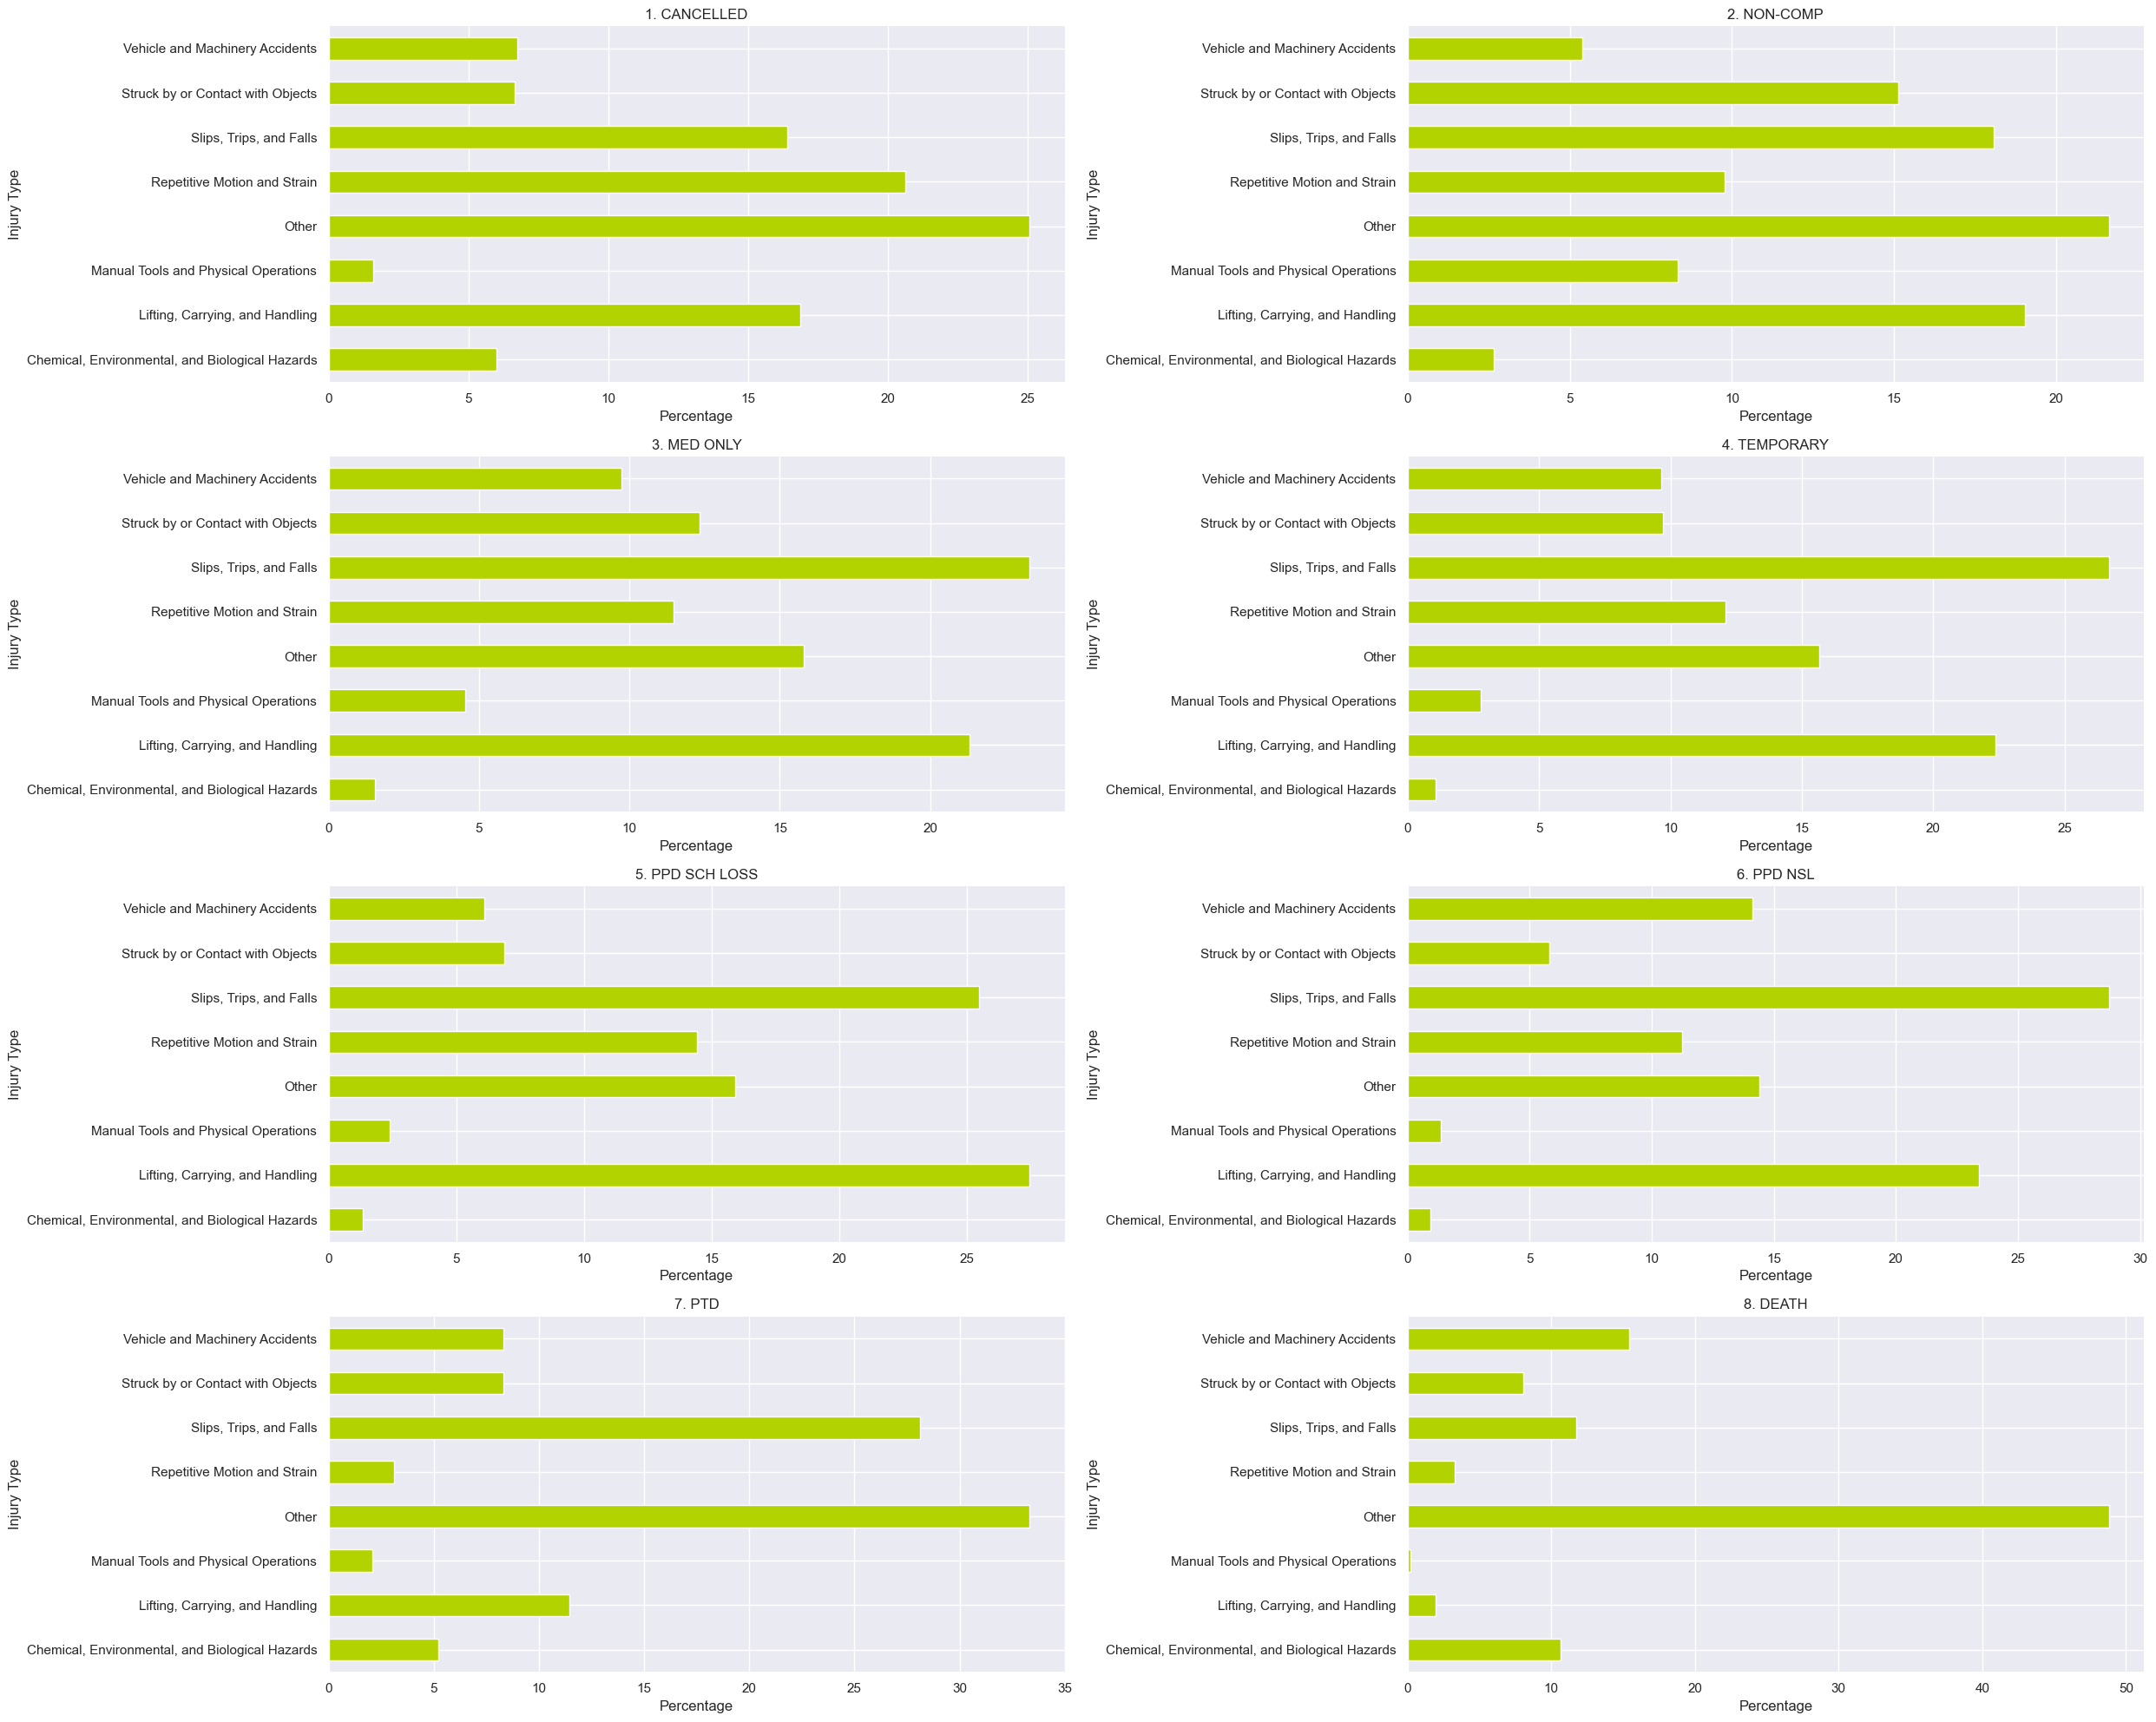

In [362]:
cause_group_percentage = df_train.groupby(['Claim Injury Type', 'injury_cause']).size().unstack().apply(lambda x: x / x.sum() * 100, axis=1)
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(25, 20))
axes = axes.flatten()
for ax, claim_type in zip(axes, cause_group_percentage.index):
    cause_group_percentage.loc[claim_type].plot(kind='barh', ax=ax, color='#B2D300')
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
    ax.set_title(claim_type)
    ax.set_ylabel('Injury Type')
    ax.set_xlabel('Percentage')
    ax.grid(True)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
plt.tight_layout()
plt.show()

Unlike in the other bar charts, the causes for the accidents seem to be a differenciating factor. As always, this could be due to the fact that as cases get more severe the number of cases dwindles and so a small amount of cases caused by "repetitive motion or strain" can account for a large portion of the cases in a category.

### Industry Codes

Industry codes can be categorized into five main groups:

- Natural Resources and Utilities
- Goods Production and Trade
- Services
- Education Health Public Services
- Leisure Hospitality

Like before, this selection is done manually.

In [363]:
unique_industry_codes = df_train[['Industry Code', 'Industry Code Description']].drop_duplicates()

In [364]:
unique_industry_codes

Industry Code                          Industry Code Description
0                44                                       RETAIL TRADE
1                23                                       CONSTRUCTION
2                56  ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...
4                62                  HEALTH CARE AND SOCIAL ASSISTANCE
6                72                    ACCOMMODATION AND FOOD SERVICES
8                61                               EDUCATIONAL SERVICES
11               51                                        INFORMATION
16               31                                      MANUFACTURING
17               48                     TRANSPORTATION AND WAREHOUSING
18               45                                       RETAIL TRADE
24               42                                    WHOLESALE TRADE
26               53                 REAL ESTATE AND RENTAL AND LEASING
28               52                              FINANCE AND INSURANCE
31               49                     TRANSPORTATION AND WAREHOUSING
38               81      OTHER SERVICES (EXCEPT PUBLIC ADMINISTRATION)
61               92                              PUBLIC ADMINISTRATION
65               33                                      MANUFACTURING
80               54   PROFESSIONAL, SCIENTIFIC, AND TECHNICAL SERVICES
149              32                                      MANUFACTURING
190              71                ARTS, ENTERTAINMENT, AND RECREATION
218            <NA>                                                NaN
283              22                                          UTILITIES
414              11         AGRICULTURE, FORESTRY, FISHING AND HUNTING
629              21                                             MINING
1222             55            MANAGEMENT OF COMPANIES AND ENTERPRISES

In [365]:
natural_resources_utilities = ["AGRICULTURE, FORESTRY, FISHING AND HUNTING", "MINING", "UTILITIES"]

goods_production_and_trade = ["CONSTRUCTION", "MANUFACTURING", "WHOLESALE TRADE", "RETAIL TRADE"]

services = ["TRANSPORTATION AND WAREHOUSING", "INFORMATION", "FINANCE AND INSURANCE", "REAL ESTATE AND RENTAL AND LEASING", 
    "PROFESSIONAL, SCIENTIFIC, AND TECHNICAL SERVICES", "MANAGEMENT OF COMPANIES AND ENTERPRISES", 
    "ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMENT AND REMEDIATION SERVICES",
    "OTHER SERVICES (EXCEPT PUBLIC ADMINISTRATION)", "ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMENT AND REMEDIAT"]

education_health_public_services = ["EDUCATIONAL SERVICES", "HEALTH CARE AND SOCIAL ASSISTANCE", "PUBLIC ADMINISTRATION"]

leisure_hospitality = ["ARTS, ENTERTAINMENT, AND RECREATION", "ACCOMMODATION AND FOOD SERVICES"]

In [366]:
df_train['industry_group'] = np.nan
df_train.loc[df_train['Industry Code Description'].isin(natural_resources_utilities), 'industry_group'] = 'Natural Resources and Utilities'
df_train.loc[df_train['Industry Code Description'].isin(goods_production_and_trade), 'industry_group'] = 'Goods Production and Trade'
df_train.loc[df_train['Industry Code Description'].isin(services), 'industry_group'] = 'Services'
df_train.loc[df_train['Industry Code Description'].isin(education_health_public_services), 'industry_group'] = 'Education Health and Public Services'
df_train.loc[df_train['Industry Code Description'].isin(leisure_hospitality), 'industry_group'] = 'Leisure Hospitality'

C:\Users\migue\AppData\Local\Temp\ipykernel_18648\2895561375.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Natural Resources and Utilities' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_train.loc[df_train['Industry Code Description'].isin(natural_resources_utilities), 'industry_group'] = 'Natural Resources and Utilities'


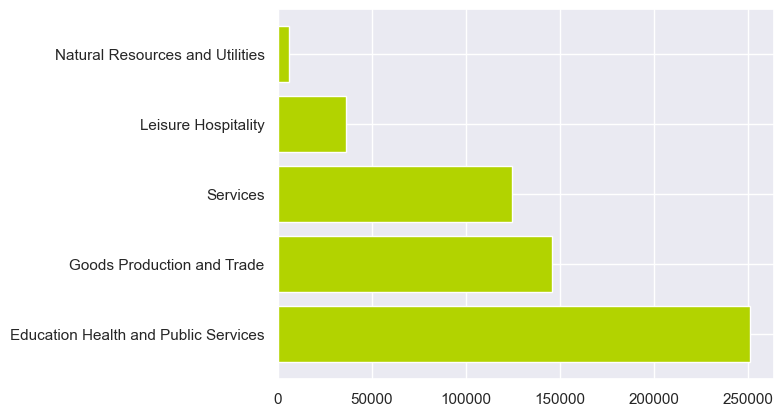

In [367]:
df_train['industry_group'].value_counts()
plt.barh(df_train['industry_group'].value_counts().index, df_train['industry_group'].value_counts().values, color='#B2D300')
plt.show()

Most of the cases belong to the education, health and public services, with almost double the number of cases of the second most frequent industry group.

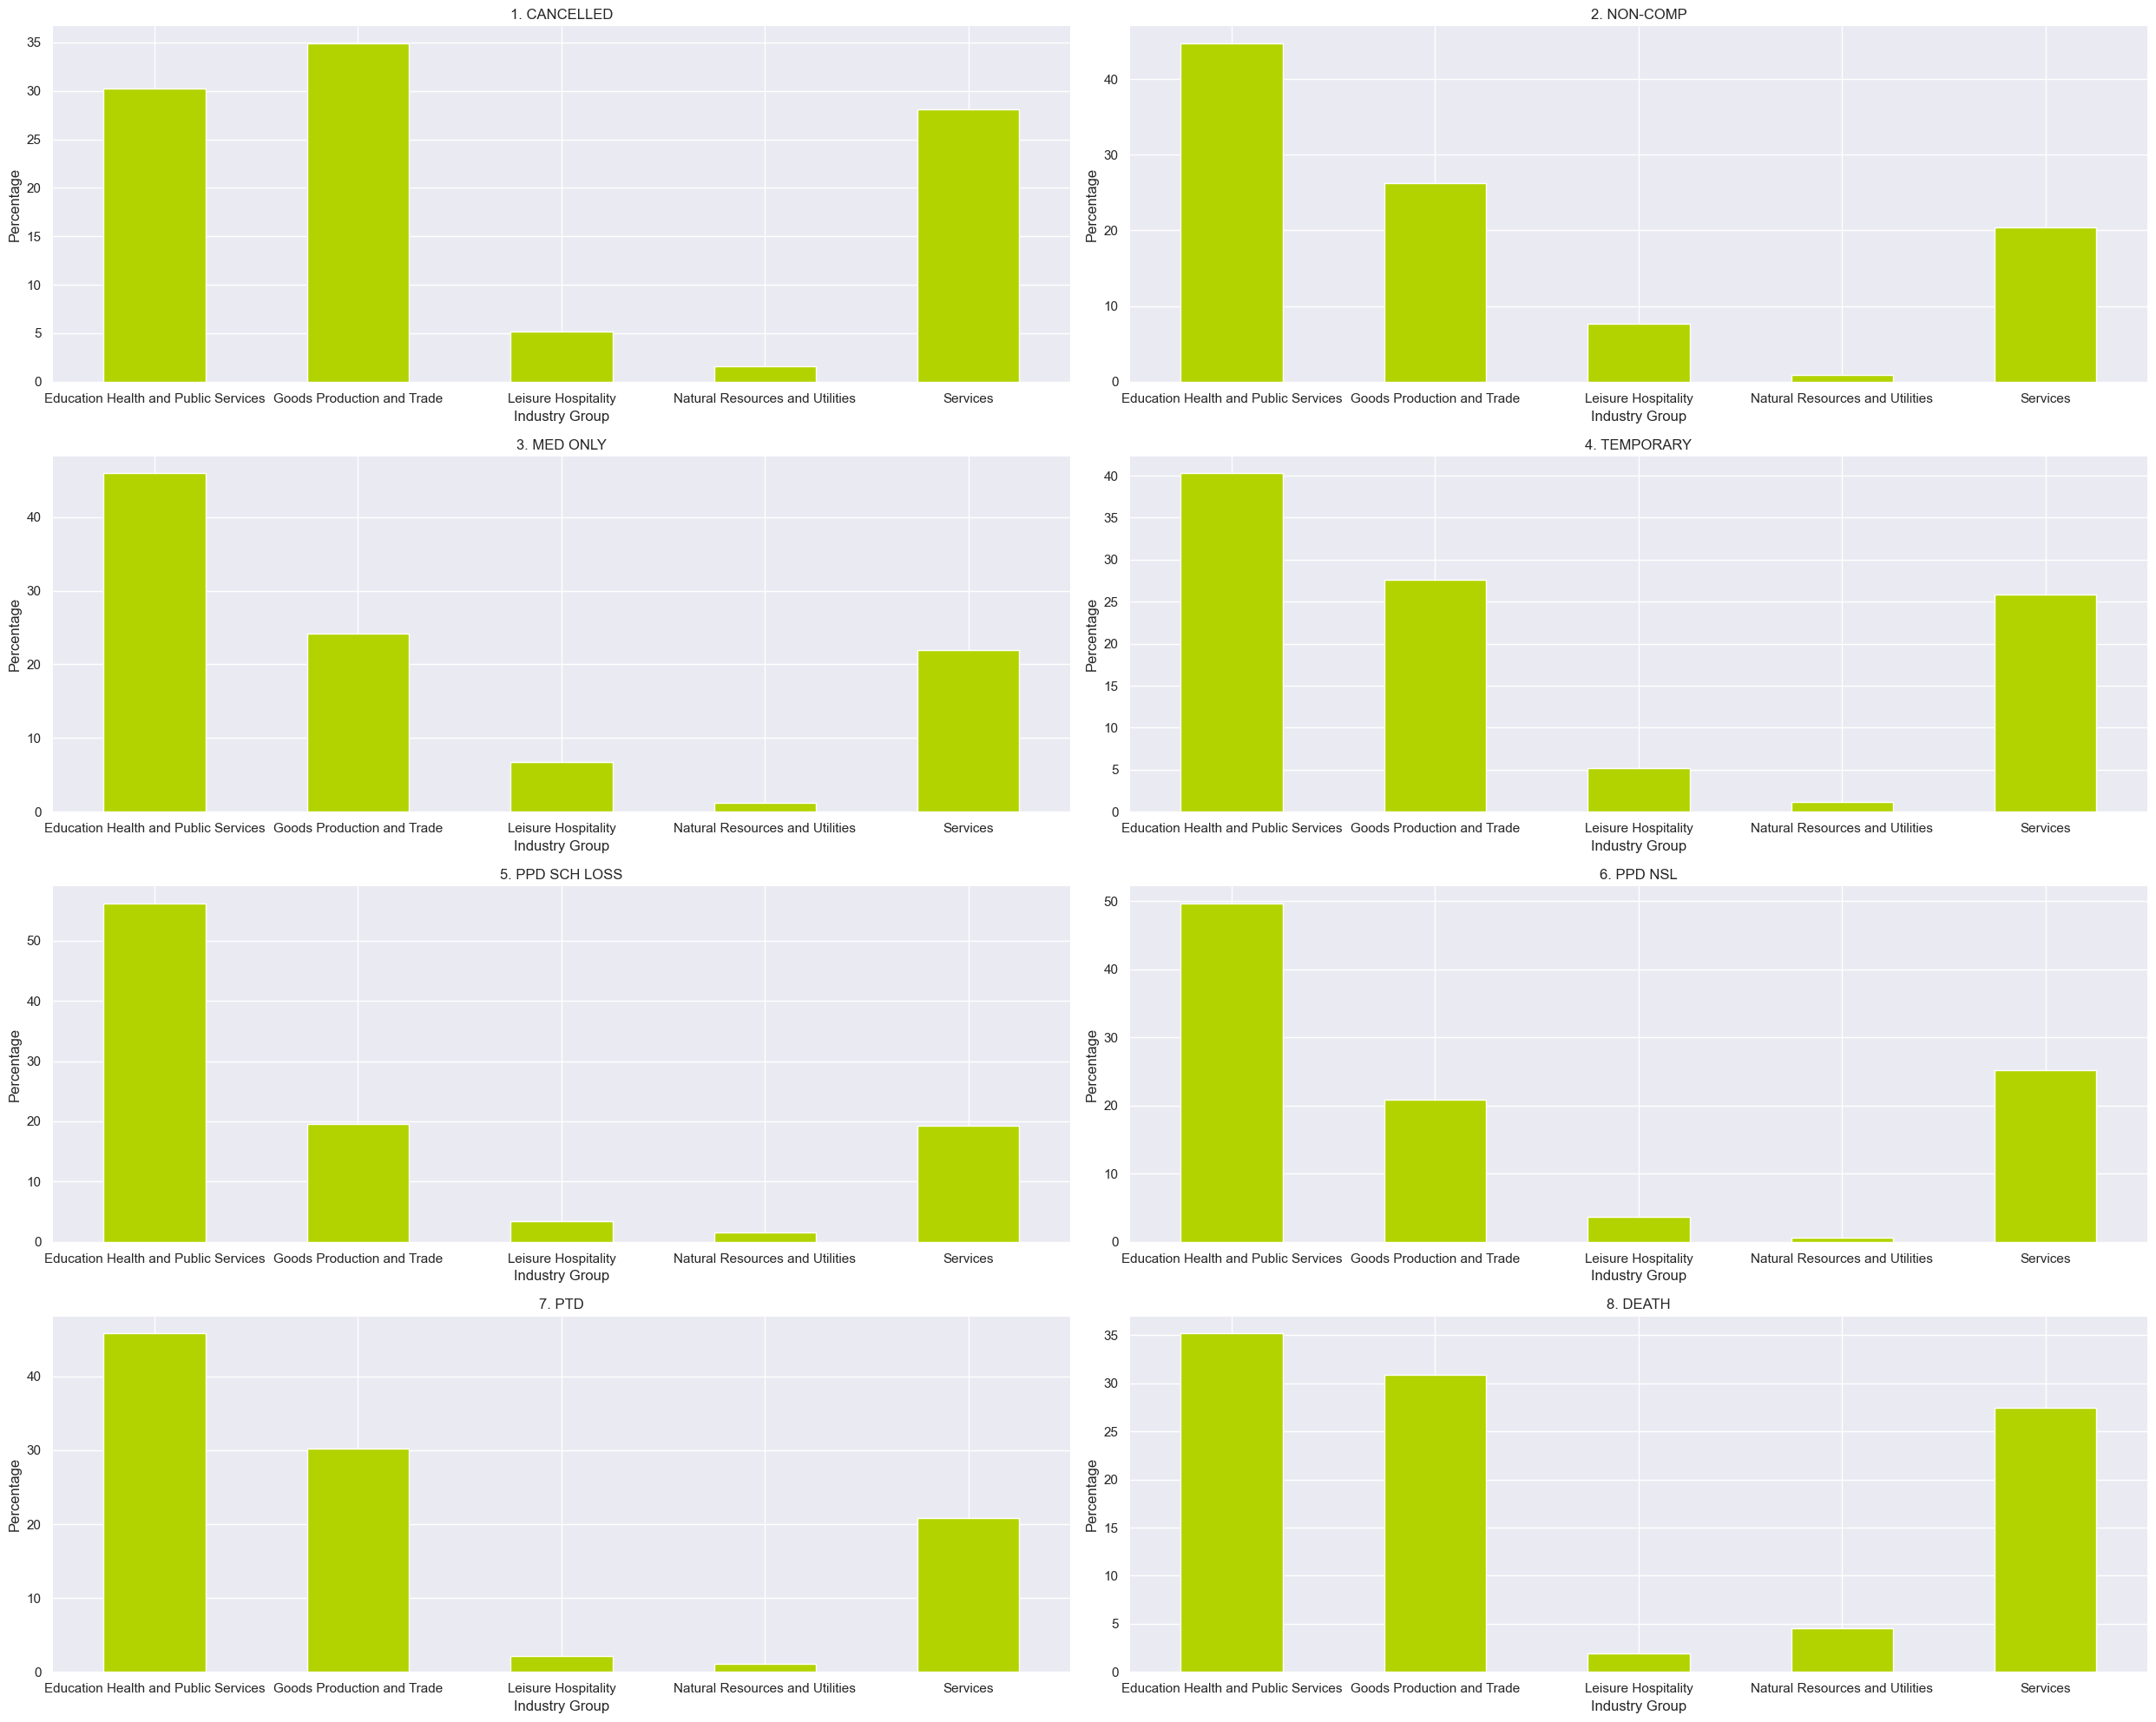

In [368]:
industry_group_percentage = df_train.groupby(['Claim Injury Type', 'industry_group']).size().unstack().apply(lambda x: x / x.sum() * 100, axis=1)
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(25, 20))
axes = axes.flatten()
for ax, claim_type in zip(axes, industry_group_percentage.index):
    industry_group_percentage.loc[claim_type].plot(kind='bar', ax=ax, color='#B2D300')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
    ax.set_title(claim_type)
    ax.set_xlabel('Industry Group')
    ax.set_ylabel('Percentage')
    ax.grid(True)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
plt.tight_layout()
plt.show()

'Education Health and Public Services' takes the lead in every category except for one. For canceled cases the most represented industry is 'Goods Production and Trade' (by around 5%). The least represented industry is 'Natural Resources and Utilities'. This industry like other minority code groups ('head' in the body_groups, 'Infecteous Diseases' in the nature group), reaches its peak in the most severe accidents.

## Agreement Reached

For the open-ended segment of the project, the group has chosen to predict an additional variable: Agreement Reached.

This variable indicates whether an agreement was reached between the parties involved before the intervention of the Workers' Compensation Board.

Exploring the relationships between 'Agreement Reached' and other variables can uncover information about the conditions that favor agreements before Workers' Compensation Board intervention.

First, the distribution of the Agreement Reached will be examined to see how this variable behaves in this data set.

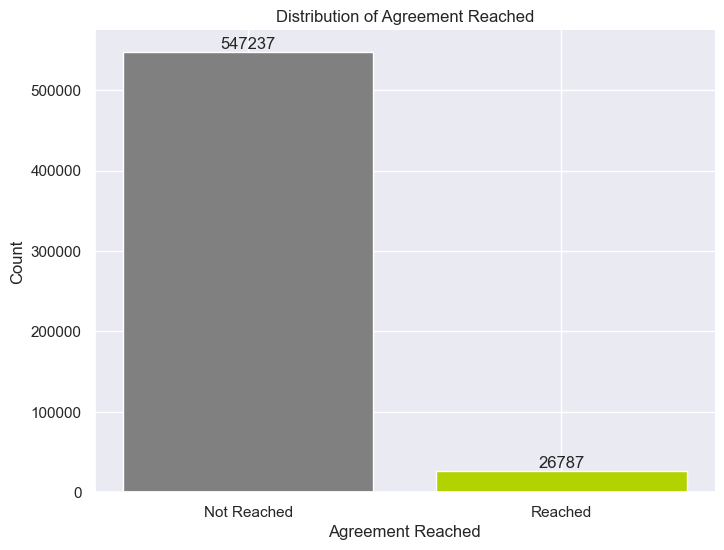

In [369]:
agreement_reached_counts = df_train['Agreement Reached'].value_counts()
plt.figure(figsize=(8, 6)) 
plt.bar(agreement_reached_counts.index, agreement_reached_counts.values, color=['grey','#B2D300'])
plt.xticks(ticks=[0, 1], labels=['Not Reached', 'Reached'])
plt.xlabel('Agreement Reached')
plt.ylabel('Count')
plt.title('Distribution of Agreement Reached')
plt.grid(True)

for index, value in enumerate(agreement_reached_counts.values):
    plt.text(index, value + 0.5, str(value), ha='center', va='bottom')

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

The variable is unbalanced. This is something to take into account as it poses a challenge for prediction.

Moving forward, for now, it is essential to analyze the relationships between "Agreement Reached" and other variables in the dataset to determine its relevance for prediction.

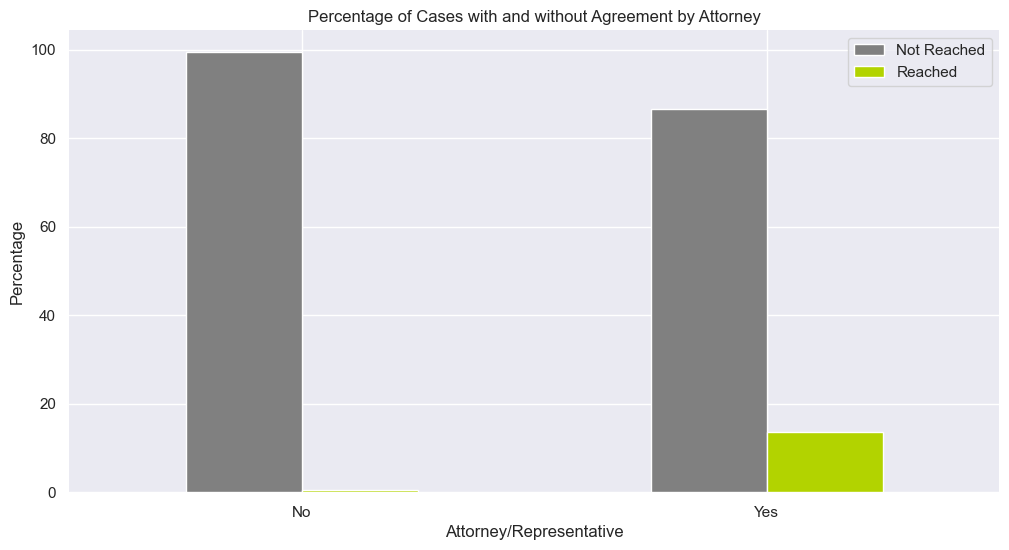

In [370]:
df_train['Attorney/Representative'] = df_train['Attorney/Representative'].replace({'N': 'No', 'Y': 'Yes'})
agreement_by_attorney = pd.crosstab(df_train['Attorney/Representative'], df_train['Agreement Reached'])
agreement_by_attorney.columns = ['Not Reached', 'Reached']
agreement_by_attorney['Reached'] = (agreement_by_attorney['Reached'] / (agreement_by_attorney['Not Reached'] + agreement_by_attorney['Reached'])) * 100
agreement_by_attorney['Not Reached'] = 100 - agreement_by_attorney['Reached']
agreement_by_attorney.plot(kind='bar', stacked=False, color=['Grey', '#B2D300'], figsize=(12, 6))
plt.xlabel('Attorney/Representative')
plt.ylabel('Percentage')
plt.title('Percentage of Cases with and without Agreement by Attorney')
plt.xticks(rotation=0)
plt.grid(True)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.show()

From this graph, it is possible to understand that the presence of an attorney influences the likelihood of reaching an agreement. Even though there are way more cases where it was not reached, there is still a big increase in the number of cases in which it is possible to reach an agreement, when an attorney is present.

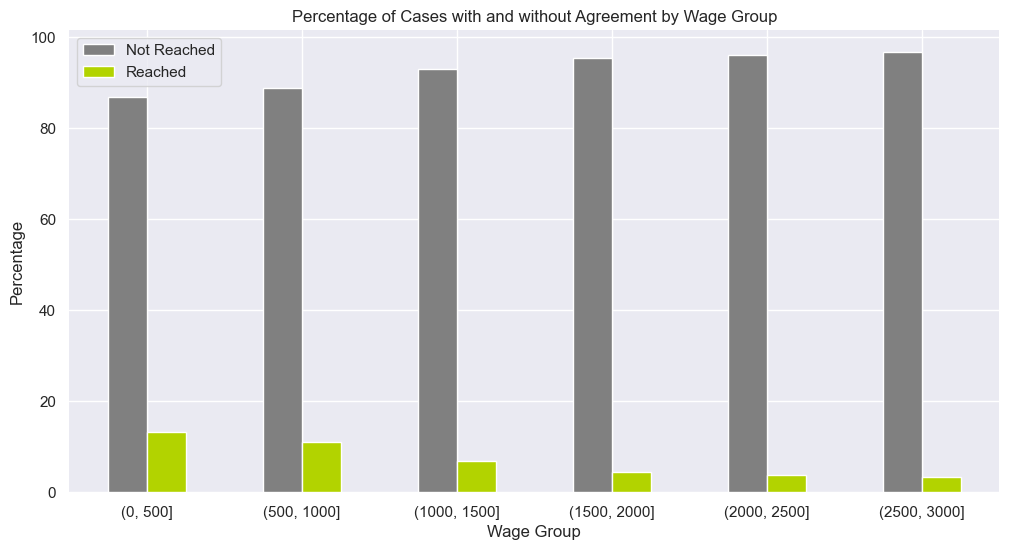

In [371]:
agreement_by_wage = pd.crosstab(df_train1['wage_groups'], df_train['Agreement Reached'])
agreement_by_wage.columns = ['Not Reached', 'Reached']
agreement_by_wage['Reached'] = (agreement_by_wage['Reached'] / (agreement_by_wage['Not Reached'] + agreement_by_wage['Reached'])) * 100
agreement_by_wage['Not Reached'] = 100 - agreement_by_wage['Reached']
agreement_by_wage.plot(kind='bar', stacked=False, color=['Grey', '#B2D300'], figsize=(12, 6))
plt.xlabel('Wage Group')
plt.ylabel('Percentage')
plt.title('Percentage of Cases with and without Agreement by Wage Group')
plt.xticks(rotation=0)
plt.grid(True)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.show()

Cases in lower wage groups have a higher percentage of agreements reached compared to those in higher wage groups. Additionally, as the level of wage increase, the agreement not being reached also increases.

In [372]:
df_train['COVID-19 Indicator'] = df_train['COVID-19 Indicator'].replace({'N': 'No', 'Y': 'Yes'})
agreement_by_covid = pd.crosstab(df_train['COVID-19 Indicator'], df_train['Agreement Reached'])
agreement_by_covid.columns = ['Not Reached', 'Reached']

agreement_by_covid['Reached'] = (agreement_by_covid['Reached'] / (agreement_by_covid['Not Reached'] + agreement_by_covid['Reached'])) * 100
agreement_by_covid['Not Reached'] = 100 - agreement_by_covid['Reached']

agreement_covid_table = agreement_by_covid[['Reached', 'Not Reached']].copy()
agreement_covid_table.index.name = 'COVID-19 Indicator'
agreement_covid_table.columns = ['Agreement Reached (%)', 'Agreement Not Reached (%)'] 
pd.DataFrame(agreement_covid_table)

Agreement Reached (%)  Agreement Not Reached (%)
COVID-19 Indicator                                                  
No                               4.807110                  95.192890
Yes                              1.874932                  98.125068

The table indicates that when the claim is not related to COVID-19, the percentage of cases reaching an agreement is higher.

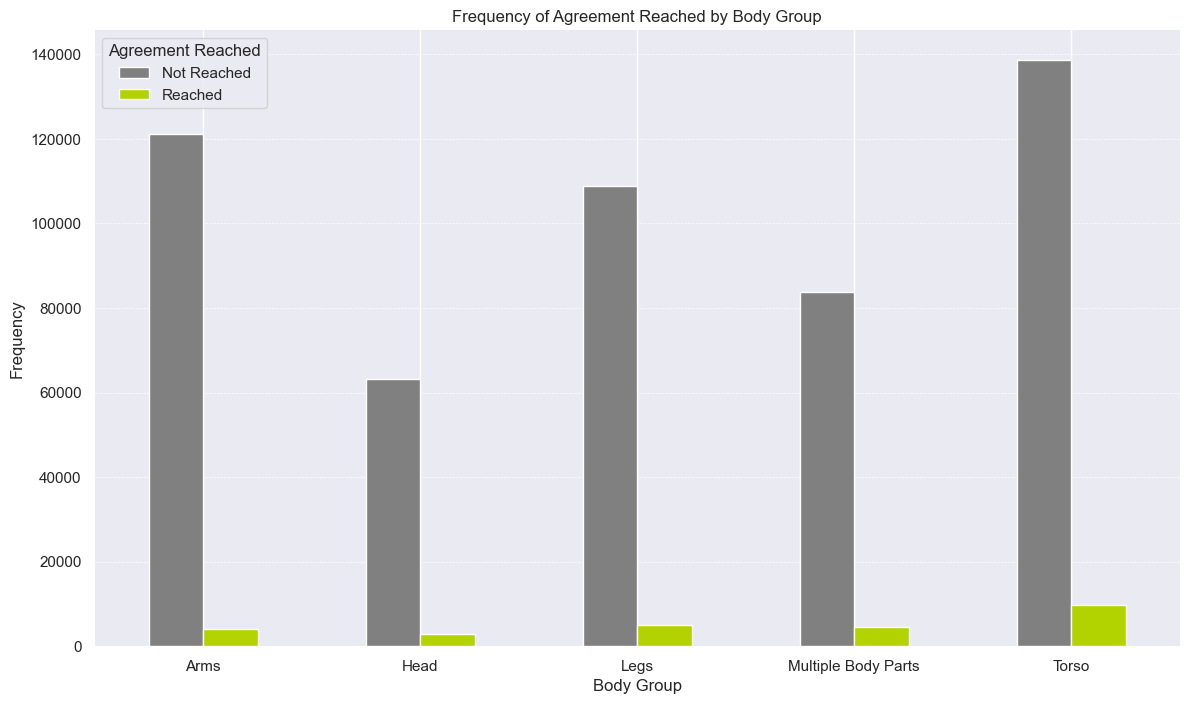

In [373]:
df_train['Agreement Reached'] = df_train['Agreement Reached'].astype(object)
df_train['Agreement Reached'] = df_train['Agreement Reached'].replace({0: 'Not Reached', 1: 'Reached'})
agreement_by_body_group = df_train.groupby(['Agreement Reached', 'body_group']).size().unstack()

fig, ax = plt.subplots(figsize=(14, 8))
agreement_by_body_group.T.plot(kind='bar', ax=ax, color=['Grey','#B2D300'], rot=0)
ax.set_xlabel('Body Group')
ax.set_ylabel('Frequency')
ax.set_title('Frequency of Agreement Reached by Body Group')
ax.grid(True, axis='y', linestyle='--', linewidth=0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.show()

The graph shows that the percentage of cases in which an agreement is reached varies significantly across different body parts. In particular, for arm and torso injuries, the percentage of cases in which an agreement is not reached is significantly higher than the percentage of cases in which an agreement is reached.

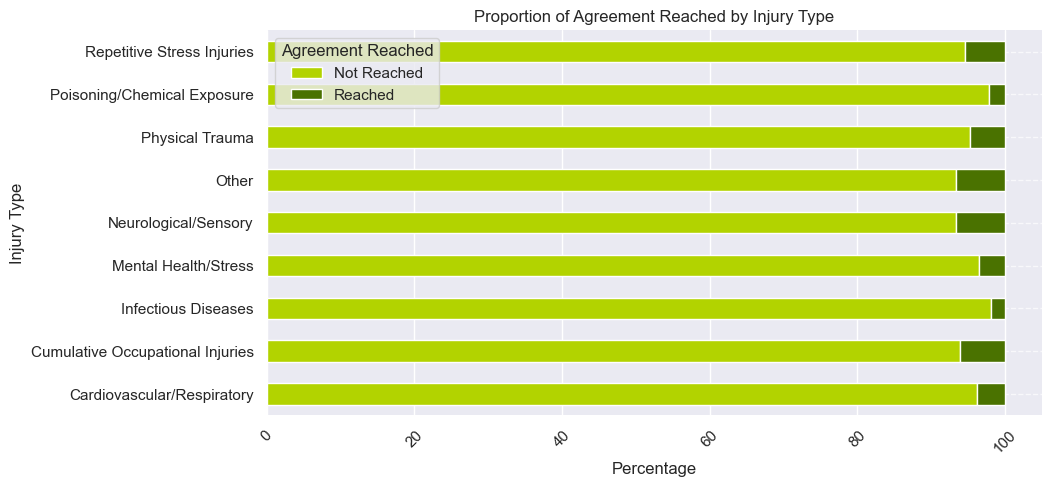

In [374]:
agreement_by_injury_type_proportion = pd.crosstab(df_train['injury_type'], df_train['Agreement Reached'], normalize='index') * 100
colors = ['#B2D300', '#4A7200']
fig, ax = plt.subplots(figsize=(10, 5))
agreement_by_injury_type_proportion.plot(kind='barh', stacked=True, color=colors, ax=ax)
plt.xlabel('Percentage')
plt.ylabel('Injury Type')
plt.title('Proportion of Agreement Reached by Injury Type')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.show()

In both categories, "Physical Trauma" is the most common type of injury, accounting for the highest proportion. Other injuries, such as "Infectious Diseases" and "Cumulative Occupational Injuries" are present but with much smaller percentages. In general, the pattern of injury types is quite similar between the two groups.

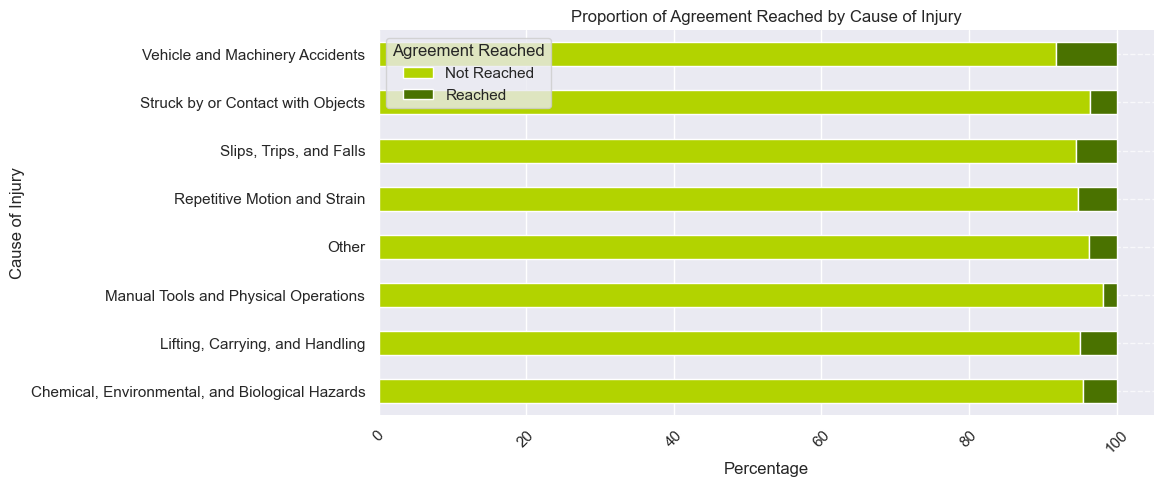

In [375]:
agreement_by_injury_cause_proportion = pd.crosstab(df_train['injury_cause'], df_train['Agreement Reached'], normalize='index') * 100
colors = ['#B2D300', '#4A7200']
fig, ax = plt.subplots(figsize=(10, 5))
agreement_by_injury_cause_proportion.plot(kind='barh', stacked=True, color=colors, ax=ax)
plt.xlabel('Percentage')
plt.ylabel('Cause of Injury')
plt.title('Proportion of Agreement Reached by Cause of Injury')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.show()

The chart indicates that injury causes such as "Slips, Trips, and Falls" and "Lifting, Carrying, and Handling" are consistently significant contributors to injuries in both "Reached" and "Not Reached" cases. This trend could reflect common challenges in resolving cases involving these types of injuries or their overall higher frequency. Less common causes like "Chemical, Environmental, and Biological Hazards" are rare across both groups, suggesting that they may be easier to resolve or simply occur less frequently.

## Zip Codes

For zip codes, they can be grouped them into 9 main groups:
- Syracuse
- Rochester
- Albany
- Hauppage
- NYC
- Buffalo
- Binghamton
- Stadewide
- Other

This has to be done manually, as it was done before with the other grouped variables.

References:<br>
https://www.unitedstateszipcodes.org/#zips-list

In [380]:
# most frequent zip codes
zip_code_counts = df_train['Zip Code'].value_counts().head(50)
zip_code_counts

Zip Code
11236    3302
10940    2971
11717    2807
11434    2759
11706    2728
11207    2633
11208    2559
11368    2553
12550    2530
11212    2504
11226    2466
10467    2369
10466    2287
11550    2251
11203    2227
11234    2221
11385    2170
10462    2149
10314    2103
10456    2089
10469    2067
10701    2020
11758    1949
11757    1948
12601    1906
11003    1901
11413    1866
11772    1853
11746    1829
11233    1815
11722    1815
10453    1810
11704    1798
10473    1797
11520    1780
11221    1769
12603    1765
13440    1759
11373    1747
11756    1705
10452    1694
14094    1663
10457    1646
12180    1643
10472    1624
11412    1622
11377    1620
11779    1578
10458    1569
12590    1549
Name: count, dtype: int64

In [ ]:
# # Fill NaN values with an empty string
# df_train['Zip Code'] = df_train['Zip Code'].fillna('')

# # Convert all zip codes to string type
# df_train['Zip Code'] = df_train['Zip Code'].astype(str)

# # Unique zip codes
# unique_zip_codes = df_train['Zip Code'].unique()

# # Check if zip codes have letters and digits
# zip_codes_with_letters = [zip_code for zip_code in unique_zip_codes if any(char.isalpha() for char in zip_code)]

# # Check if zip codes have digits only
# zip_codes_with_digits = [zip_code for zip_code in unique_zip_codes if zip_code.isdigit()]
# # order by ascending order the list with the zip codes that contain digits
# zip_codes_with_digits.sort()

In [382]:
unique_zip_codes = df_train[['Zip Code']].drop_duplicates()

In [383]:
unique_zip_codes

Zip Code
0         13662
1         14569
2         12589
4         12603
5         11772
...         ...
592341    30046
592553    90241
592799    G9B0Y
592810    15143
593132    07122

[10061 rows x 1 columns]

In [ ]:
region_ny = {
"CENTRAL NEW YORK": ["OSWEGO", "ONONDAGA", "CAYUGA", "MADISON", "CORTLAND"], 
"SOUTHERN TIER": ["DELAWARE", "CHENANGO", "BROOME", "TIOGA", "TOMPKINS", "CHEMUNG", "SCHUYLER", "STEUBEN"],
"FINGER LAKES": ["WAYNE", "SENECA", "YATES", "MONROE", "LIVINGSTON", "ONTARIO", "ORLEANS", "GENESEE", "WYOMING"], 
"WESTERN NEW YORK": ["ERIE", "NIAGARA", "CHAUTAUQUA", "CATTARAUGUS", "ALLEGANY"], 
"NORTH COUNTRY": ["JEFFERSON", "LEWIS", "ST. LAWRENCE", "FRANKLIN", "CLINTON", "ESSEX", "HAMILTON"], 
"MOHAWK VALLEY": ["HERKIMER", "ONEIDA", "OTSEGO", "MONTGOMERY", "FULTON", "SCHOHAIRE"], 
"CAPITAL REGION": ["SCHENECTADY", "ALBANY", "RENSSELAER", "SARATOGA", "GREENE", "COLUMBIA", "WARREN", "WASHINGTON"], 
"HUDSON VALLEY": ["ROCKLAND", "ORANGE", "PUTNAM", "DUTCHESS", "ULSTER", "SULLIVAN", "WESTCHESTER"],
"NEW YORK CITY": ["BRONX", "KINGS", "NEW YORK", "QUEENS", "RICHMOND"], 
"LONG ISLAND": ["NASSAU", "SUFFOLK"]
}

In [ ]:
df_train['Zip Code'] = pd.to_numeric(df_train['Zip Code'], errors='coerce')

zip_ranges = [     
      (11722, 11788, 'Hauppage'), (12201, 12288, 'Albany'), 
    (13120, 13290, 'Syracuse'), (13901, 13905, 'Binghamton'), (14201, 14280, 'Buffalo'), 
    (14602, 14694, 'Rochester')
]

def get_range_label(zip_code):
    for lower, upper, label in zip_ranges:
        if lower <= zip_code <= upper:
            return label
    return 'Statewide'

df_train['zip_group'] = df_train['Zip Code'].apply(get_range_label)

df_train[['zip_group']]

zip_group
0       Statewide
1       Statewide
2       Statewide
4       Statewide
5        Hauppage
...           ...
593451  Statewide
593455  Statewide
593456    Buffalo
593457        NYC
593467  Statewide

[574024 rows x 1 columns]

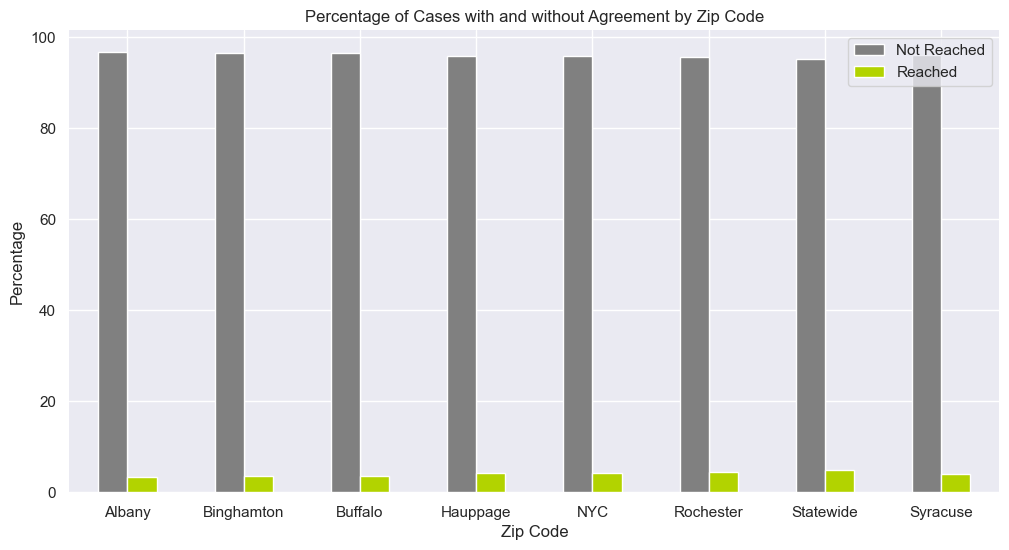

In [386]:
agreement_by_zip_code = pd.crosstab(df_train['zip_group'], df_train['Agreement Reached'])
agreement_by_zip_code.columns = ['Not Reached', 'Reached']
agreement_by_zip_code['Reached'] = (agreement_by_zip_code['Reached'] / (agreement_by_zip_code['Not Reached'] + agreement_by_zip_code['Reached'])) * 100
agreement_by_zip_code['Not Reached'] = 100 - agreement_by_zip_code['Reached']
agreement_by_zip_code.plot(kind='bar', stacked=False, color=['Grey', '#B2D300'], figsize=(12, 6))
plt.xlabel('Zip Code')
plt.ylabel('Percentage')
plt.title('Percentage of Cases with and without Agreement by Zip Code')
plt.xticks(rotation=0)
plt.grid(True)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.show()

## Time to Assembly Date

How does the time between accidents and the day of the claim assembly vary?<br>
To create this variable, the group subtracted the accident date from the assembly date.

Note: The assembly date is the date the claim was first assembled. The WCB “assembles” a claim in which an injured worker has lost more than one week of work, has a serious injury that may result in a permanent disability, is disputed by the carrier or employer, or receives a claim form from the injured worker 

Reference:

https://data.ny.gov/Government-Finance/Assembled-Workers-Compensation-Claims-Beginning-20/jshw-gkgu/about_data

In [387]:
df_train['days_accident_to_assembly'] = (df_train['Assembly Date'] - df_train['Accident Date']).dt.days

In [388]:
negative_days = df_train[df_train['days_accident_to_assembly'] < 0]
negative_days

Accident Date  Age at Injury Assembly Date Attorney/Representative  \
168       2020-02-26             57    2020-01-01                     Yes   
412       2020-01-23             62    2020-01-02                     Yes   
582       2020-03-01             62    2020-01-02                     Yes   
798       2020-01-27             57    2020-01-03                     Yes   
1332      2020-01-23             56    2020-01-03                     Yes   
...              ...            ...           ...                     ...   
590739    2023-02-02             52    2022-12-26                     Yes   
590745    2022-12-28             55    2022-12-26                      No   
591212    2022-12-30             33    2022-12-27                     Yes   
591972    2022-12-29             41    2022-12-28                      No   
592884    2023-01-04             56    2022-12-30                     Yes   

        Average Weekly Wage  Birth Year   C-2 Date  \
168                 1997.87      1962.0 2019-12-31   
412                 1775.89      1957.0 2020-01-14   
582                 1467.47      1957.0 2020-01-17   
798                 1450.00         NaN 2020-01-15   
1332                1334.92         0.0 2020-01-06   
...                     ...         ...        ...   
590739               992.39      1970.0 2022-12-26   
590745                 0.00      1967.0 2022-12-26   
591212              2884.62      1989.0 2023-02-14   
591972              2500.00      1981.0        NaT   
592884              1576.92      1966.0 2023-02-22   

                        Carrier Name                Carrier Type  \
168     CNY OTHER THAN ED, HED WATER             3A. SELF PUBLIC   
412            NYC TRANSIT AUTHORITY             3A. SELF PUBLIC   
582             STATE INSURANCE FUND                     2A. SIF   
798       NEW YORK CITY TRANSIT AUTH             3A. SELF PUBLIC   
1332            STATE INSURANCE FUND                     2A. SIF   
...                              ...                         ...   
590739  MASSACHUSETTS BAY INS.CO.C/O                 1A. PRIVATE   
590745          STATE INSURANCE FUND                     2A. SIF   
591212  CNY OTHER THAN ED, HED WATER             3A. SELF PUBLIC   
591972   PFL NI CARRIER UNDETERMINED  5D. SPECIAL FUND - UNKNOWN   
592884  CNY OTHER THAN ED, HED WATER             3A. SELF PUBLIC   

        Claim Identifier  ... age_group  wage_groups days_to_c2  \
168              5393953  ...     51-60    High Wage      -57.0   
412              5394099  ...     61-70    High Wage       -9.0   
582              5393830  ...     61-70  Medium Wage      -44.0   
798              5394613  ...     51-60  Medium Wage      -12.0   
1332             5394770  ...     51-60  Medium Wage      -17.0   
...                  ...  ...       ...          ...        ...   
590739           6162010  ...     51-60  Medium Wage      -38.0   
590745           6162263  ...     51-60      No Wage       -2.0   
591212           6161996  ...     31-40    High Wage       46.0   
591972           6162985  ...     41-50    High Wage        NaN   
592884           6164803  ...     51-60  Medium Wage       49.0   

       days_to_c2_binned           body_group  \
168                  NaN                 Arms   
412                  NaN  Multiple Body Parts   
582                  NaN                 Head   
798                  NaN                 Head   
1332                 NaN                 Arms   
...                  ...                  ...   
590739               NaN                 Arms   
590745               NaN                Torso   
591212          3 months  Multiple Body Parts   
591972               NaN                  NaN   
592884          3 months                Torso   

                             injury_type                  injury_cause  \
168     Cumulative Occupational Injuries  Repetitive Motion and Strain   
412     Cumulative Occupational Injuries                         Other   


In [389]:
print(f'There are {len(negative_days)} rows where the Assembly Date is before the Accident Date, this amounts to {round(len(negative_days)/len(df_train)*100, 2)}% of the data.')

There are 1407 rows where the Assembly Date is before the Accident Date, this amounts to 0.25% of the data.


There are cases where the date of the assembly precedes the date of the accident, obviously this should be impossible. These rows will be adressed in the data cleaning proccess.

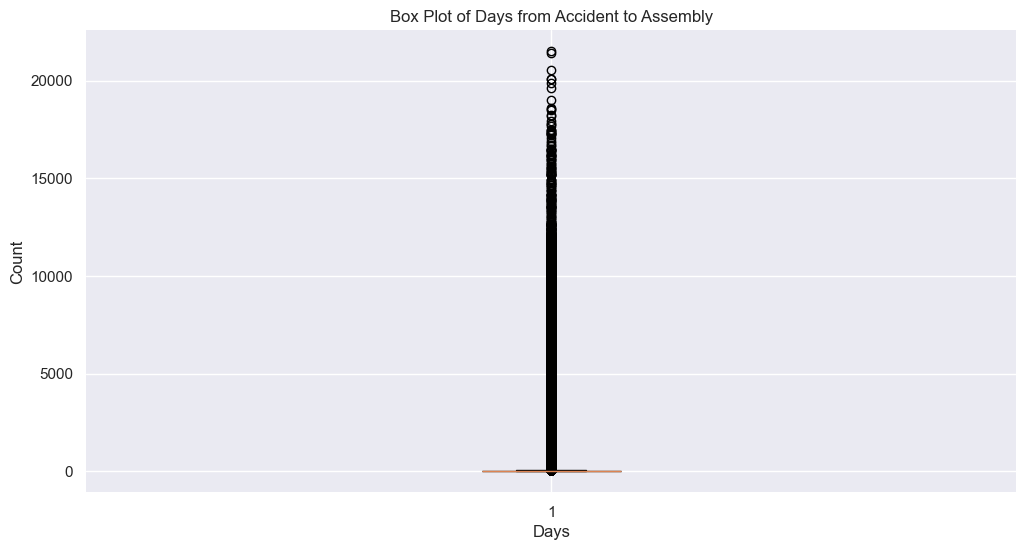

In [390]:
df_train['days_accident_to_assembly'] = (df_train['Assembly Date'] - df_train['Accident Date']).dt.days
df_train_days = df_train[df_train['days_accident_to_assembly'] > 0.0]
plt.figure(figsize=(12, 6))
plt.boxplot(df_train_days['days_accident_to_assembly'], patch_artist=True,
            boxprops=dict(facecolor='#B2D300'))
plt.xlabel('Days')
plt.ylabel('Count')
plt.title('Box Plot of Days from Accident to Assembly')
plt.grid(True)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
plt.show()

The days can be grouped into the following categories:
- Same day (0 days)
- 1 week (7 days)
- 1 month (30 days)
- 3 Months (90 days)
- 6 months (180 days)
- 1 year (365 days)
- 365 x 10 (10 years)
- 365 x 60 (60 years, this group was created to encompass all observations)

In [391]:
bins = (-1, 0, 7, 30, 90, 180, 365, 365*2, 365*10, 60*365)
labels = ['Same Day', '1 week', '1 month', '3 months', '6 months', '1 year', '2 years', '10 years', '10+ years']
df_train['days_accident_to_assembly_binned'] = pd.cut(df_train['days_accident_to_assembly'], bins=bins, labels=labels)

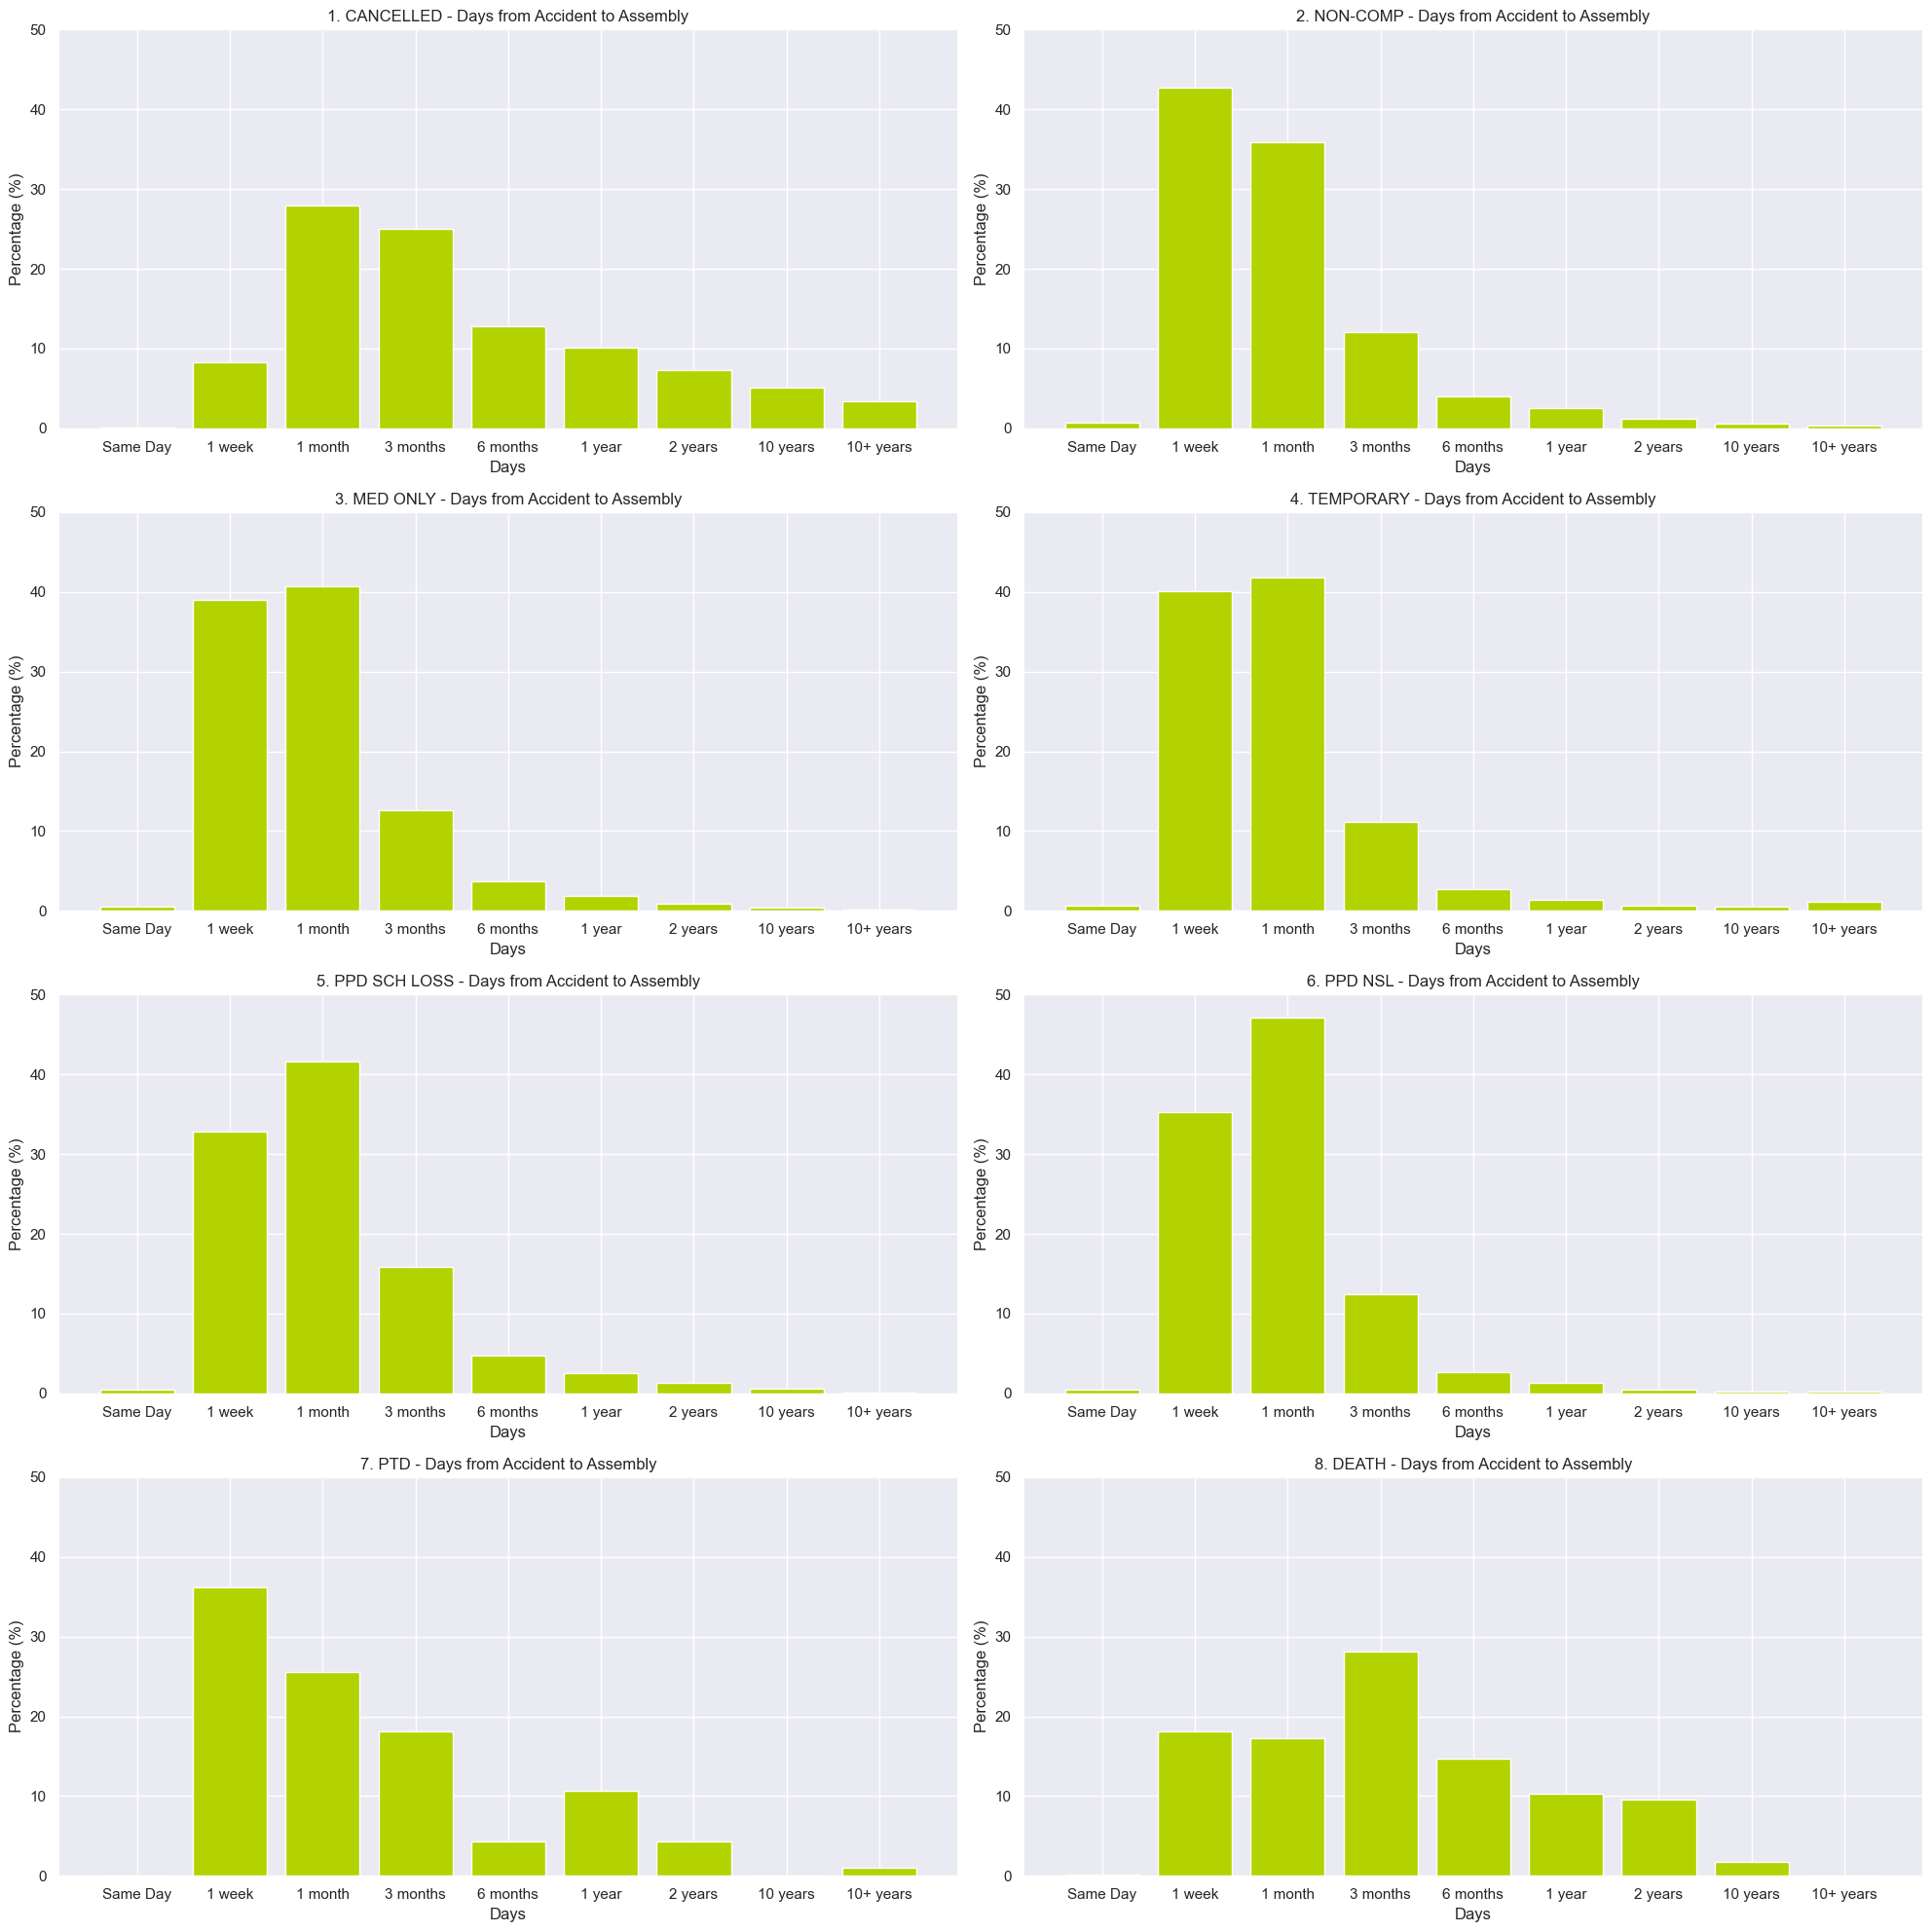

In [392]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(20, 20))
claim_list = ['1. CANCELLED', '2. NON-COMP', '3. MED ONLY', '4. TEMPORARY', '5. PPD SCH LOSS', '6. PPD NSL', '7. PTD', '8. DEATH']

for ax, claim in zip(axes.flatten(), claim_list):
    days_accident_binned = df_train[df_train['Claim Injury Type'] == claim]['days_accident_to_assembly_binned'].value_counts().sort_index()
    bars = ax.bar(days_accident_binned.index.astype(str), days_accident_binned.values / days_accident_binned.values.sum() * 100, color='#B2D300')
    ax.set_title(f'{claim} - Days from Accident to Assembly')
    ax.set_xlabel('Days')
    ax.set_ylabel('Percentage (%)')
    ax.set_ylim(0, 50)
    ax.grid(True)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
plt.tight_layout()
plt.show()

Expectedly, most of the claiments present in the dataset had their claims assembled within a month of the accident date. Unexpectedly, the type of claim where more time elapsed between accident and claim assembly is the cases involving death. This rise in 'waiting time' could possibly be due to the compexity of creating a claim for a case where a person died (such as the need for an autopsy report or police investigation).

There are some outliers - one observation waited for almost 60 years before assembeling the claim - but these cases will most likely be removed in the data cleaning phase.

## Early check for correlations

### Cramér's V

Cramér's V is a metric for measuring the correlation between categorical variables. In python, there are no functions to calculate this metric, instead a function that is available online will be used.

References:<br>
https://stackoverflow.com/questions/46498455/categorical-features-correlation/46498792#46498792<br>
https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9

### Claim Injury Type

In [393]:
var_list = ['age_group', 'body_group', 'injury_type', 'injury_cause', 'industry_group','Attorney/Representative', 'COVID-19 Indicator', 'days_accident_to_assembly_binned', 'Carrier Type', 'zip_group']

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

for i in var_list:
    cvi = cramers_v(df_train['Claim Injury Type'], df_train[i])
    if cvi >= 0.1:
        print(f'{i} : {cvi:.2f}')

Attorney/Representative : 0.61
COVID-19 Indicator : 0.10


According to Cramér's V, the variable "Attorney/Representative" is highly correlated to the first target variable.

### Agreement Reached

In [394]:
for i in var_list:
    cvi = cramers_v(df_train['Agreement Reached'], df_train[i])
    if cvi >= 0.1:
        print(f'{i} : {cvi:.2f}')

Attorney/Representative : 0.29
days_accident_to_assembly_binned : 0.18
Carrier Type : 0.10


The same result is obtained in the second target variable, althought the connection is weaker.

In [395]:
df_train.to_csv('df_train_v1.csv', index=False) #this cell is a checkpoint that the group used to avoid running the whole notebook when working

# Data Cleaning

### Transforming the test data

Before beginning the data cleaning process, all the alterations that were performed on df_train will be applied to df_test:

In [505]:
df_test = pd.read_csv('test_data.csv')
df_train = pd.read_csv('df_train_v1.csv') #this line is a checkpoint that the group used to avoid running the whole notebook when working

In [506]:
for i in df_train.columns:
    if i not in df_test.columns:
        print(i)

Claim Injury Type
Agreement Reached
age_group
wage_groups
days_to_c2
days_to_c2_binned
body_group
injury_type
injury_cause
industry_group
zip_group
days_accident_to_assembly
days_accident_to_assembly_binned


In [507]:
# Check for missing values in df_train
missing_rows_train = df_train.isnull().any(axis=1).sum()
total_rows_train = len(df_train)
percent_missing_train = (missing_rows_train / total_rows_train) * 100
print(f"Missing rows in df_train: {round(percent_missing_train, 2)}%")

Missing rows in df_train: 20.03%


Drop irrelevant column and change datatypes:

In [508]:
df_test = df_test.drop(columns=['OIICS Nature of Injury Description', 'C-3 Date', 'First Hearing Date', 'IME-4 Count'])

In [509]:
int_list = ['Age at Injury', 'Industry Code', 'WCIO Cause of Injury Code', 'WCIO Nature of Injury Code', 'WCIO Part Of Body Code', 'Number of Dependents']
for i in int_list:
    df_test[i] = pd.to_numeric(df_test[i], errors='coerce').astype('Int64')
    df_train[i] = pd.to_numeric(df_train[i], errors='coerce').astype('Int64')

In [510]:
date_list = ['Accident Date', 'Assembly Date', 'C-2 Date']
for i in date_list:
    df_test[i] = pd.to_datetime(df_test[i], errors='coerce')
    df_train[i] = pd.to_datetime(df_train[i], errors='coerce')

In [511]:
bins = (0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 130)
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '+100']
df_test['age_group'] = pd.cut(df_test['Age at Injury'], bins=bins, labels=labels)

In [512]:
## Uncomment if you want to run the project without the eda


# # calculate the quantiles and IQR excluding claims with 0 wage
# df_non_zero_wage = df_train[df_train['Average Weekly Wage'] > 0]

# q1 = df_non_zero_wage['Average Weekly Wage'].quantile(0.25) # 25th percentile or first quartile
# q3 = df_non_zero_wage['Average Weekly Wage'].quantile(0.75)  # 75th percentile or third quartile
# iqr = q3 - q1
# lower_bound = max(0,q1 - 1.5 * iqr)                          # the max function ensures the lower bound cannot be less than 0, as negative wages are not valid
# upper_bound = q3 + 1.5 * iqr

In [513]:
bins = [-1, 0, q1, q3, upper_bound, df_train['Average Weekly Wage'].max()]
labels = ['No Wage', 'Low Wage', 'Medium Wage', 'High Wage', 'Very High Wage']
df_test['wage_groups'] = pd.cut(df_test['Average Weekly Wage'], bins=bins, labels=labels)
df_test[['Average Weekly Wage', 'wage_groups']]

Average Weekly Wage wage_groups
0                       NaN         NaN
1                       NaN         NaN
2                       0.0     No Wage
3                       0.0     No Wage
4                       0.0     No Wage
...                     ...         ...
387970                  NaN         NaN
387971                  0.0     No Wage
387972                  0.0     No Wage
387973                  0.0     No Wage
387974                  0.0     No Wage

[387975 rows x 2 columns]

In [514]:
head = [
    "MULTIPLE HEAD INJURY", "EYE(S)", "MOUTH", "EAR(S)", "SKULL", "FACIAL BONES", 
    "TEETH", "NOSE", "BRAIN", "LARYNX", "TRACHEA", "MULTIPLE NECK INJURY", "SOFT TISSUE"
]

torso = [
    "TORSO", "SHOULDER(S)", "LUNGS", "BUTTOCKS", "LOWER BACK AREA", "ABDOMEN INCLUDING GROIN", 
    "HIP", "CHEST", "DISC", "UPPER BACK AREA", "PELVIS", "HEART", "VERTEBRAE", 
    "LUMBAR & OR SACRAL VERTEBRAE (VERTEBRA", "SACRUM AND COCCYX", "SPINAL CORD", "MULTIPLE TRUNK", "SPINAL CORD", "INTERNAL ORGANS"
]

arm = [
    "ARMS", "FINGER(S)", "THUMB", "WRIST", "HAND", "UPPER ARM", "ELBOW", "WRIST (S) & HAND(S)", "MULTIPLE UPPER EXTREMITIES", "LOWER ARM"
]

leg = [
    "LEGS", "ANKLE", "KNEE", "LOWER LEG", "UPPER LEG", "FOOT", "TOES", "GREAT TOE", 
    "MULTIPLE LOWER EXTREMITIES"
]

multiple_body_parts = [ 
    'ARTIFICIAL APPLIANCE', "INSUFFICIENT INFO TO PROPERLY IDENTIFY - UNCLASSIFIED",
    'NO PHYSICAL INJURY', 'MULTIPLE BODY PARTS (INCLUDING BODY', 'BODY SYSTEMS AND MULTIPLE BODY SYSTEMS',
    'WHOLE BODY', 'MULTIPLE'
]

Check for codes in the WCIO variables that are in the test dataset and are not in the train dataset. This process is going to be repeated for all variables of this type.

In [515]:
# Checking for new information
defined_body_parts = set(head + torso + arm + leg + multiple_body_parts)

unique_body_parts = set(df_test['WCIO Part Of Body Description'].dropna().unique())

new = list(unique_body_parts - defined_body_parts)

print(new)

[]


Now, the codes are added to the respective categories.

In [516]:
df_test['body_group'] = np.nan
df_test.loc[df_test['WCIO Part Of Body Description'].isin(head), 'body_group'] = 'Head'
df_test.loc[df_test['WCIO Part Of Body Description'].isin(torso), 'body_group'] = 'Torso'
df_test.loc[df_test['WCIO Part Of Body Description'].isin(arm), 'body_group'] = 'Arms'
df_test.loc[df_test['WCIO Part Of Body Description'].isin(leg), 'body_group'] = 'Legs'
df_test.loc[df_test['WCIO Part Of Body Description'].isin(multiple_body_parts), 'body_group'] = 'Multiple Body Parts'

C:\Users\migue\AppData\Local\Temp\ipykernel_18648\995213862.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Head' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_test.loc[df_test['WCIO Part Of Body Description'].isin(head), 'body_group'] = 'Head'


In [517]:
physical_trauma = ["CONTUSION", "SPRAIN OR TEAR", "CONCUSSION", "PUNCTURE", "LACERATION", "BURN", 
                   "STRAIN OR TEAR", "FRACTURE", "FOREIGN BODY", "RUPTURE", "DISLOCATION", "CRUSHING", 
                   "SEVERANCE", "ELECTRIC SHOCK", "AMPUTATION"]

repetitive_stress_injuries = ["INFLAMMATION", "CARPAL TUNNEL SYNDROME", "HERNIA", "VDT - RELATED DISEASES"]

cumulative_occupational_injuries = ["ALL OTHER OCCUPATIONAL DISEASE INJURY, NOC", "ALL OTHER SPECIFIC INJURIES, NOC", "ALL OTHER CUMULATIVE INJURY, NOC", 
                                    "DUST DISEASE, NOC", "ASBESTOSIS", "SILICOSIS", "BLACK LUNG", "BYSSINOSIS", "DERMATITIS"]

infectious_diseases = ["INFECTION", "COVID-19", "CONTAGIOUS DISEASE", "HEPATITIS C", "AIDS"]

poisoning_chemical_exposure = ["POISONING - GENERAL (NOT OD OR CUMULATIVE", "POISONING - CHEMICAL, (OTHER THAN METALS)", "POISONING - METAL", 
                               "RADIATION", "ADVERSE REACTION TO A VACCINATION OR INOCULATION"]

cardiovascular_respiratory = ["ANGINA PECTORIS", "MYOCARDIAL INFARCTION", "RESPIRATORY DISORDERS", 
                              "VASCULAR", "ASPHYXIATION", "HEAT PROSTRATION"]

neurological_sensory = ["HEARING LOSS OR IMPAIRMENT", "LOSS OF HEARING", "VISION LOSS", "ENUCLEATION", "SYNCOPE"]

mental_health_stress = ["MENTAL STRESS", "MENTAL DISORDER"]

other_injury = ["MULTIPLE PHYSICAL INJURIES ONLY", "MULTIPLE INJURIES INCLUDING BOTH PHYSICAL AND PSYCHOLOGICAL", 
         "FREEZING", "RADIATION", "ADVERSE REACTION TO A VACCINATION OR INOCULATION", "CANCER", 'NO PHYSICAL INJURY']

In [518]:
# Checking for new information
defined_nature_types = set(physical_trauma + repetitive_stress_injuries + cumulative_occupational_injuries + infectious_diseases + poisoning_chemical_exposure + cardiovascular_respiratory + neurological_sensory + mental_health_stress + other_injury)	

unique_nature_types = set(df_test['WCIO Nature of Injury Description'].dropna().unique())

new = list(unique_nature_types - defined_nature_types)

print(new)

[]


In [519]:
df_test['injury_type'] = np.nan
df_test.loc[df_test['WCIO Nature of Injury Description'].isin(physical_trauma), 'injury_type'] = 'Physical Trauma'
df_test.loc[df_test['WCIO Nature of Injury Description'].isin(repetitive_stress_injuries), 'injury_type'] = 'Repetitive Stress Injuries'
df_test.loc[df_test['WCIO Nature of Injury Description'].isin(cumulative_occupational_injuries), 'injury_type'] = 'Cumulative Occupational Injuries'
df_test.loc[df_test['WCIO Nature of Injury Description'].isin(infectious_diseases), 'injury_type'] = 'Infectious Diseases'
df_test.loc[df_test['WCIO Nature of Injury Description'].isin(poisoning_chemical_exposure), 'injury_type'] = 'Poisoning/Chemical Exposure'
df_test.loc[df_test['WCIO Nature of Injury Description'].isin(cardiovascular_respiratory), 'injury_type'] = 'Cardiovascular/Respiratory'
df_test.loc[df_test['WCIO Nature of Injury Description'].isin(neurological_sensory), 'injury_type'] = 'Neurological/Sensory'
df_test.loc[df_test['WCIO Nature of Injury Description'].isin(mental_health_stress), 'injury_type'] = 'Mental Health/Stress'
df_test.loc[df_test['WCIO Nature of Injury Description'].isin(other_injury), 'injury_type'] = 'Other'

C:\Users\migue\AppData\Local\Temp\ipykernel_18648\1706948922.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Physical Trauma' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_test.loc[df_test['WCIO Nature of Injury Description'].isin(physical_trauma), 'injury_type'] = 'Physical Trauma'


In [520]:
slips_trips_falls = ["FROM LIQUID OR GREASE SPILLS", "FALL, SLIP OR TRIP, NOC", "ON SAME LEVEL", "FROM DIFFERENT LEVEL (ELEVATION)", 
                     "ON ICE OR SNOW", "INTO OPENINGS", "ON STAIRS", "FROM LADDER OR SCAFFOLDING", "SLIP, OR TRIP, DID NOT FALL", 
                     "JUMPING OR LEAPING"]

lifting_carrying_handling = ["OBJECT BEING LIFTED OR HANDLED", "LIFTING", "PUSHING OR PULLING", "HOLDING OR CARRYING", 
                             "OBJECT HANDLED", "OBJECT HANDLED BY OTHERS"]

struck_by_or_contact = ["STRUCK OR INJURED, NOC", "FALLING OR FLYING OBJECT", "STEAM OR HOT FLUIDS", 
                        "STATIONARY OBJECT", "ELECTRICAL CURRENT", "HOT OBJECTS OR SUBSTANCES", 
                        "CAUGHT IN, UNDER OR BETWEEN, NOC", "FIRE OR FLAME", "CONTACT WITH, NOC", 
                        "BROKEN GLASS", "STEPPING ON SHARP OBJECT", "GUNSHOT", "ANIMAL OR INSECT"]

vehicle_machinery_accidents = ["COLLISION OR SIDESWIPE WITH ANOTHER VEHICLE", "MOTOR VEHICLE, NOC", "MOTOR VEHICLE", "VEHICLE UPSET", "COLLISION WITH A FIXED OBJECT", 
                               "CRASH OF RAIL VEHICLE", "CRASH OF WATER VEHICLE", "CRASH OF AIRPLANE", "MOVING PARTS OF MACHINE", "MACHINE OR MACHINERY", "POWERED HAND TOOL, APPLIANCE", 
                               "USING TOOL OR MACHINERY", "MOVING PART OF MACHINE", "HAND TOOL OR MACHINE IN USE"]

chemical_environmental_biological = ["CHEMICALS", "DUST, GASES, FUMES OR VAPORS", "ABSORPTION, INGESTION OR INHALATION, NOC", 
                                     "MOLD", "CUMULATIVE, NOC", "TEMPERATURE EXTREMES", "COLD OBJECTS OR SUBSTANCES", "RADIATION", 
                                     "ABNORMAL AIR PRESSURE"]

manual_tools_operations = ["HAND TOOL, UTENSIL; NOT POWERED", "CUT, PUNCTURE, SCRAPE, NOC", "RUBBED OR ABRADED, NOC", 
                           "SANDING, SCRAPING, CLEANING OPERATION", "WELDING OPERATION", "STRIKING AGAINST OR STEPPING ON, NOC", 
                           "USING TOOL OR MACHINERY"]

repetitive_motion_strain = ["REPETITIVE MOTION", "REACHING", "TWISTING", "STRAIN OR INJURY BY, NOC"]

other_cause = ["OTHER - MISCELLANEOUS, NOC", "FELLOW WORKER, PATIENT OR OTHER PERSON", "FOREIGN MATTER (BODY) IN EYE(S)",
                "OTHER THAN PHYSICAL CAUSE OF INJURY", "PANDEMIC", "TERRORISM", "NATURAL DISASTERS", "EXPLOSION OR FLARE BACK", 
                "COLLAPSING MATERIALS (SLIDES OF EARTH)", "CONTINUAL NOISE", "WIELDING OR THROWING", "PERSON IN ACT OF A CRIME"]

In [521]:
# Checking for new information
defined_cause_types = set(slips_trips_falls + lifting_carrying_handling + struck_by_or_contact + vehicle_machinery_accidents + chemical_environmental_biological + manual_tools_operations + repetitive_motion_strain + other_cause)

unique_cause_types = set(df_test['WCIO Cause of Injury Description'].dropna().unique())

new = list(unique_cause_types - defined_cause_types)

print(new)

[]


In [522]:
df_test['injury_cause'] = np.nan
df_test.loc[df_test['WCIO Cause of Injury Description'].isin(slips_trips_falls), 'injury_cause'] = 'Slips, Trips, and Falls'
df_test.loc[df_test['WCIO Cause of Injury Description'].isin(lifting_carrying_handling), 'injury_cause'] = 'Lifting, Carrying, and Handling'
df_test.loc[df_test['WCIO Cause of Injury Description'].isin(struck_by_or_contact), 'injury_cause'] = 'Struck by or Contact with Objects'
df_test.loc[df_test['WCIO Cause of Injury Description'].isin(vehicle_machinery_accidents), 'injury_cause'] = 'Vehicle and Machinery Accidents'
df_test.loc[df_test['WCIO Cause of Injury Description'].isin(chemical_environmental_biological), 'injury_cause'] = 'Chemical, Environmental, and Biological Hazards'
df_test.loc[df_test['WCIO Cause of Injury Description'].isin(manual_tools_operations), 'injury_cause'] = 'Manual Tools and Physical Operations'
df_test.loc[df_test['WCIO Cause of Injury Description'].isin(repetitive_motion_strain), 'injury_cause'] = 'Repetitive Motion and Strain'
df_test.loc[df_test['WCIO Cause of Injury Description'].isin(other_cause), 'injury_cause'] = 'Other'


C:\Users\migue\AppData\Local\Temp\ipykernel_18648\4279511166.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Slips, Trips, and Falls' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_test.loc[df_test['WCIO Cause of Injury Description'].isin(slips_trips_falls), 'injury_cause'] = 'Slips, Trips, and Falls'


In [523]:
natural_resources_utilities = ["AGRICULTURE, FORESTRY, FISHING AND HUNTING", "MINING", "UTILITIES"]

goods_production_and_trade = ["CONSTRUCTION", "MANUFACTURING", "WHOLESALE TRADE", "RETAIL TRADE"]

services = ["TRANSPORTATION AND WAREHOUSING", "INFORMATION", "FINANCE AND INSURANCE", "REAL ESTATE AND RENTAL AND LEASING", 
    "PROFESSIONAL, SCIENTIFIC, AND TECHNICAL SERVICES", "MANAGEMENT OF COMPANIES AND ENTERPRISES", 
    "ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMENT AND REMEDIATION SERVICES",
    "OTHER SERVICES (EXCEPT PUBLIC ADMINISTRATION)", "ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMENT AND REMEDIAT"]

education_health_public_services = ["EDUCATIONAL SERVICES", "HEALTH CARE AND SOCIAL ASSISTANCE", "PUBLIC ADMINISTRATION"]

leisure_hospitality = ["ARTS, ENTERTAINMENT, AND RECREATION", "ACCOMMODATION AND FOOD SERVICES"]

In [524]:
# Checking for new information

defined_industries = set(natural_resources_utilities + goods_production_and_trade + services + education_health_public_services + leisure_hospitality)

unique_industries = set(df_test['Industry Code Description'].dropna().unique())

new_industries = list(unique_industries - defined_industries)
print(new_industries)


[]


In [525]:
df_test['industry_group'] = np.nan
df_test.loc[df_test['Industry Code Description'].isin(natural_resources_utilities), 'industry_group'] = 'Natural Resources Utilities'
df_test.loc[df_test['Industry Code Description'].isin(goods_production_and_trade), 'industry_group'] = 'Goods Production and Trade'
df_test.loc[df_test['Industry Code Description'].isin(services), 'industry_group'] = 'Services'
df_test.loc[df_test['Industry Code Description'].isin(education_health_public_services), 'industry_group'] = 'Education Health Public Services'
df_test.loc[df_test['Industry Code Description'].isin(leisure_hospitality), 'industry_group'] = 'Leisure Hospitality'

C:\Users\migue\AppData\Local\Temp\ipykernel_18648\1778020932.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Natural Resources Utilities' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_test.loc[df_test['Industry Code Description'].isin(natural_resources_utilities), 'industry_group'] = 'Natural Resources Utilities'


In [526]:
df_test['days_accident_to_assembly'] = (df_test['Assembly Date'] - df_test['Accident Date']).dt.days

In [527]:
negative_days = df_test[df_test['days_accident_to_assembly'] < 0]
percentage_negative_days = len(negative_days) / len(df_test) * 100
print(f'Percentage of rows with negative days: {percentage_negative_days:.2f}%')

Percentage of rows with negative days: 0.06%


0.06% of the rows in 'df_test' have accident dates that happen after the claim was assembled, this should be impossible and will therefore be changed.

In [528]:
df_train.loc[df_train['days_accident_to_assembly'] < 0, 'days_accident_to_assembly'] = np.nan
df_test.loc[df_test['days_accident_to_assembly'] < 0, 'days_accident_to_assembly'] = np.nan

In [529]:
bins = (-1, 0, 7, 30, 90, 180, 365, 365*2, 365*10, 60*365)
labels = ['Same day', '1 week', '1 month', '3 months', '6 months', '1 year', '2 years', '10 years', '10+ years']
df_test['days_accident_to_assembly_binned'] = pd.cut(df_test['days_accident_to_assembly'], bins=bins, labels=labels)

In [530]:
df_test['combined_group'] = df_test['age_group'].astype(str) + "_" + df_test['industry_group'].astype(str)
df_test['combined_injury_group'] = df_test['injury_type'].astype(str) + "_" + df_test['injury_cause'].astype(str) + df_test['body_group'].astype(str) + df_test['industry_group'].astype(str)

In [531]:
df_test['Zip Code'] = pd.to_numeric(df_test['Zip Code'], errors='coerce')

zip_ranges = [
    (10001, 10282, 'NYC'), (11722, 11788, 'Hauppage'), (12201, 12288, 'Albany'), 
    (13120, 13290, 'Syracuse'), (13901, 13905, 'Binghamton'), (14201, 14280, 'Buffalo'), 
    (14602, 14694, 'Rochester')
]

def get_range_label(zip_code):
    for lower, upper, label in zip_ranges:
        if lower <= zip_code <= upper:
            return label
    return 'Statewide'

df_test['zip_group'] = df_test['Zip Code'].apply(get_range_label)

df_test[['zip_group']]

zip_group
0       Statewide
1       Statewide
2       Statewide
3       Statewide
4       Statewide
...           ...
387970  Statewide
387971   Hauppage
387972  Statewide
387973  Statewide
387974  Statewide

[387975 rows x 1 columns]

In [532]:
df_test['days_to_c2'] = (df_test['C-2 Date'] - df_test['Accident Date']).dt.days

In [533]:
df_test['days_to_c2'] = (df_test['C-2 Date'] - df_test['Accident Date']).dt.days
bins = (-1, 0, 7, 30, 90, 180, 365, 365*2, 365*10, 60*365)
labels = ['Same Day', '1 week', '1 month', '3 months', '6 months', '1 year', '2 years', '10 years', '10+ years']
df_test['days_to_c2_binned'] = pd.cut(df_test['days_to_c2'], bins=bins, labels=labels)

In [534]:
# Do a final check of columns not present in both dataframes

for i in df_train.columns:
    if i not in df_test.columns:
        print(i)

Claim Injury Type
Agreement Reached


In [535]:
df_test['wage_groups'].unique()

[NaN, 'No Wage', 'Low Wage', 'Medium Wage', 'High Wage', 'Very High Wage']
Categories (5, object): ['No Wage' < 'Low Wage' < 'Medium Wage' < 'High Wage' < 'Very High Wage']

In [536]:
df_train['wage_groups'].unique()

array(['No Wage', 'High Wage', 'Medium Wage', nan, 'Low Wage',
       'Very High Wage'], dtype=object)

### Irrelevant Data

Some of the data columns are simply irrelevant to the project's goal, they will therefore be removed.

In [537]:
dropping = ['Carrier Name', 'Industry Code',
            'WCIO Cause of Injury Code', 'WCIO Nature of Injury Code',
            'WCIO Part Of Body Code']

df_train.drop(columns=dropping, inplace=True)
df_test.drop(columns=dropping, inplace=True)
# df_test.drop(columns={"WCB Decision"}, inplace=True)

### Duplicates

The training set has already been checked for duplicates, but the test set has not.

In [538]:
duplicates = df_test[df_test.duplicated()]
if not duplicates.empty:
    display(duplicates)
else:
    print('No duplicates found in df_test.')

No duplicates found in df_test.


### Type Conversion

Most conversions were handled to simplify the data exploration, but a second check is necessary to make sure no column was overlooked in both datasets.

In [539]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 387975 entries, 0 to 387974
Data columns (total 34 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   Accident Date                      385531 non-null  datetime64[ns]
 1   Age at Injury                      387975 non-null  Int64         
 2   Alternative Dispute Resolution     387975 non-null  object        
 3   Assembly Date                      387975 non-null  datetime64[ns]
 4   Attorney/Representative            387975 non-null  object        
 5   Average Weekly Wage                368771 non-null  float64       
 6   Birth Year                         368505 non-null  float64       
 7   C-2 Date                           378841 non-null  datetime64[ns]
 8   Carrier Type                       387975 non-null  object        
 9   Claim Identifier                   387975 non-null  int64         
 10  County of Injury    

In [540]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574024 entries, 0 to 574023
Data columns (total 33 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   Accident Date                      570335 non-null  datetime64[ns]
 1   Age at Injury                      574024 non-null  Int64         
 2   Assembly Date                      574024 non-null  datetime64[ns]
 3   Attorney/Representative            574024 non-null  object        
 4   Average Weekly Wage                545374 non-null  float64       
 5   Birth Year                         544946 non-null  float64       
 6   C-2 Date                           559464 non-null  datetime64[ns]
 7   Carrier Type                       574024 non-null  object        
 8   Claim Identifier                   574024 non-null  int64         
 9   Claim Injury Type                  574024 non-null  object        
 10  County of Injury    

## Splitting the Data

To avoid data leakage, the train and validation data is separated before imputation.

In [541]:
df_train['claim_injury_num'] = df_train['Claim Injury Type'].astype('category').cat.codes + 1

The size of the slip is arbitrary, a usual value is 70/30 but the group decided on 75/25.

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(df_train.drop(columns ={'Claim Injury Type', 'claim_injury_num'}, axis = 1),
                                                  df_train['claim_injury_num'], test_size = 0.25, 
                                                  random_state = 13, 
                                                  stratify = df_train['claim_injury_num'],
                                                  shuffle = True)

## Imputation


The first columns to undergo the process are the code group variables (those created by the group to reduce cardinality). Due to project time constraints, the group decided that using predictive models for imputation would be too time-intensive, so an alternative imputation method was chosen.<br>
The group proposed using a conditional mode approach, the reasoning behind this choice was the following: code variables are likely to influence each other, as they are related to the causes and outcomes of accidents. This suggests that certain code or code group combinations are more probable than others (i.e. more frequent). With this in mind, missing values can be filled using the most common value for each code variable, conditional on the values of the other code variables.

However, a problem remains: some rows have most (if not all) codes missing. In these cases, the approach is to impute based on the column mode.

References:<br>
https://towardsdatascience.com/missing-value-imputation-explained-a-visual-guide-with-code-examples-for-beginners-93e0726284eb<br>
https://medium.com/@megha.natarajan/mastering-data-imputation-a-comprehensive-guide-with-visualizations-43466c51bcab<br>

In [543]:
def imputer(target, list_of_features, df):
    mode_df = (df_train.dropna(subset=[target])
                 .groupby(list_of_features)[target]
                 .agg(lambda x: x.value_counts().idxmax())
                 .reset_index()
                 .rename(columns={target: f"{target}_mode"}))
    df = df.merge(mode_df, on=list_of_features, how='left')
    df[target] = df[target].fillna(df[f"{target}_mode"])
    df = df.drop(columns=[f"{target}_mode"])
    overall_mode = df[target].mode()[0]
    df[target] = df[target].fillna(overall_mode)
    return df

In [544]:
X_train = imputer('WCIO Part Of Body Description', ['WCIO Nature of Injury Description', 'WCIO Cause of Injury Description', 'Industry Code Description'], X_train)
X_train = imputer('WCIO Cause of Injury Description', ['WCIO Part Of Body Description', 'WCIO Nature of Injury Description', 'Industry Code Description'], X_train)
X_train = imputer('WCIO Nature of Injury Description', ['WCIO Part Of Body Description', 'WCIO Cause of Injury Description', 'Industry Code Description'], X_train)
X_train = imputer('Industry Code Description', ['WCIO Part Of Body Description', 'WCIO Cause of Injury Description', 'WCIO Nature of Injury Description'], X_train)

In [545]:
X_val = imputer('WCIO Part Of Body Description', ['WCIO Nature of Injury Description', 'WCIO Cause of Injury Description', 'Industry Code Description'], X_val)
X_val = imputer('WCIO Cause of Injury Description', ['WCIO Part Of Body Description', 'WCIO Nature of Injury Description', 'Industry Code Description'], X_val)
X_val = imputer('WCIO Nature of Injury Description', ['WCIO Part Of Body Description', 'WCIO Cause of Injury Description', 'Industry Code Description'], X_val)
X_val = imputer('Industry Code Description', ['WCIO Part Of Body Description', 'WCIO Cause of Injury Description', 'WCIO Nature of Injury Description'], X_val)

In [546]:
df_test = imputer('WCIO Part Of Body Description', ['WCIO Nature of Injury Description', 'WCIO Cause of Injury Description', 'Industry Code Description'], df_test)
df_test = imputer('WCIO Cause of Injury Description', ['WCIO Part Of Body Description', 'WCIO Nature of Injury Description', 'Industry Code Description'], df_test)
df_test = imputer('WCIO Nature of Injury Description', ['WCIO Part Of Body Description', 'WCIO Cause of Injury Description', 'Industry Code Description'], df_test)
df_test = imputer('Industry Code Description', ['WCIO Part Of Body Description', 'WCIO Cause of Injury Description', 'WCIO Nature of Injury Description'], df_test)

The group assigned the imputed values to their respective general category

- Body Part

In [547]:
datasets = [X_train, X_val, df_test]
body_groups = {
    'Head': head,
    'Torso': torso,
    'Arms': arm,
    'Legs': leg,
    'Multiple Body Part': multiple_body_parts
}

for dataset in datasets:
    for group, parts in body_groups.items():
        dataset.loc[dataset['WCIO Part Of Body Description'].isin(parts), 'body_group'] = group

- Narure of Injury

In [548]:
datasets = [X_train, X_val, df_test]
injury_type = {
    'Physical Trauma': physical_trauma,
    'Repetitive Stress Injuries': repetitive_stress_injuries,
    'Cumulative Occupational Injuries': cumulative_occupational_injuries,
    'Infectious Diseases': infectious_diseases,
    'Poisoning/Chemical Exposure': multiple_body_parts,
    'Cardiovascular/Respiratory': cardiovascular_respiratory,
    'Neurological/Sensory': neurological_sensory,
    'Mental Health/Stress': mental_health_stress,
    'Other': other_injury
}

for dataset in datasets:
    for group, parts in injury_type.items():
        dataset.loc[dataset['WCIO Nature of Injury Description'].isin(parts), 'injury_type'] = group

- Cause of Injury

In [549]:
datasets = [X_train, X_val, df_test]
injury_cause = {
    'Slips, Trips, and Falls': slips_trips_falls,
    'Lifting, Carrying, and Handling': lifting_carrying_handling,
    'Struck by or Contact with Objects': struck_by_or_contact,
    'Vehicle and Machinery Accidents': vehicle_machinery_accidents,
    'Chemical, Environmental, and Biological Hazards': chemical_environmental_biological,
    'Manual Tools and Physical Operations': manual_tools_operations,
    'Repetitive Motion and Strain': repetitive_motion_strain,
    'Other': other_cause
}

for dataset in datasets:
    for group, parts in injury_cause.items():
        dataset.loc[dataset['WCIO Cause of Injury Description'].isin(parts), 'injury_cause'] = group

- Industry

In [550]:
datasets = [X_train, X_val, df_test]
industry = {
    'Natural Resources and Utilities': natural_resources_utilities,
    'Goods Production and Trade': goods_production_and_trade,
    'Services': services,
    'Education Health and Public Services': education_health_public_services,
    'Leisure Hospitality': leisure_hospitality
}

for dataset in datasets:
    for group, parts in industry.items():
        dataset.loc[dataset['Industry Code Description'].isin(parts), 'industry_group'] = group

It was previously noted that in some rows the date of the accident and the birth year were available and could be used to calculate the age of the claimant. <br>

Firstly, it is necessary to replace any values equaling to 0 into missing values, this is done in order to avoid the calculation result being the year the accident took place in.

In [551]:
df_test['Birth Year'] = df_test['Birth Year'].replace(0, np.nan)
X_train['Birth Year'] = X_train['Birth Year'].replace(0, np.nan)
X_val['Birth Year'] = X_val['Birth Year'].replace(0, np.nan)

In [552]:
def age_correction(df):
    mask = (df['Age at Injury'] == 0)
    valid_conditions = mask & df['Accident Date'].notnull() & df['Birth Year'].notnull()
    df.loc[valid_conditions, 'Age at Injury'] = (df.loc[valid_conditions, 'Accident Date'].dt.year).astype(int) - (df.loc[valid_conditions, 'Birth Year']).astype(int)
    df.loc[mask & ~valid_conditions, 'Age at Injury'] = np.nan

age_correction(X_train)
age_correction(df_test)
age_correction(X_val)

Checking what percentage of the data is still missing.

In [553]:
print(f"X_train: {round(X_train['Age at Injury'].isnull().sum() / len(X_train) * 100, 2)}%")
print(f"X_val: {round(X_val['Age at Injury'].isnull().sum() / len(X_val) * 100, 2)}%")
print(f"df_test: {round(df_test['Age at Injury'].isnull().sum() / len(df_test) * 100, 2)}%")

X_train: 0.93%
X_val: 0.97%
df_test: 0.8%


There are still missing values but they represent a small percentage of the data. The group used the median to fill these values as to avoid creating to much noise.

In [554]:
X_train['Age at Injury'] = X_train['Age at Injury'].fillna(X_train['Age at Injury'].median())
X_val['Age at Injury'] = X_val['Age at Injury'].fillna(X_train['Age at Injury'].median())
df_test['Age at Injury'] = df_test['Age at Injury'].fillna(X_train['Age at Injury'].median())

In [555]:
bins = (0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 130)
labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '+100']
df_test['age_group'] = pd.cut(df_test['Age at Injury'], bins=bins, labels=labels)
X_train['age_group'] = pd.cut(X_train['Age at Injury'], bins=bins, labels=labels)
X_val['age_group'] = pd.cut(X_val['Age at Injury'], bins=bins, labels=labels)

In [556]:
X_train.drop(columns=['Birth Year'], inplace=True)
X_val.drop(columns=['Birth Year'], inplace=True)
df_test.drop(columns=['Birth Year'], inplace=True)

Previously, the group encontered negative values in the variable "days_accident_to_assembly", these values were dismissed as errors and turned into missing values. To fill these values, the median will be used.

In [557]:
X_train['days_accident_to_assembly'] = X_train['days_accident_to_assembly'].fillna(X_train['days_accident_to_assembly'].median())
X_val['days_accident_to_assembly'] = X_val['days_accident_to_assembly'].fillna(X_train['days_accident_to_assembly'].median())
df_test['days_accident_to_assembly'] = df_test['days_accident_to_assembly'].fillna(X_train['days_accident_to_assembly'].median())

In [558]:
bins = (-1, 0, 7, 30, 90, 180, 365, 365*2, 365*10, 60*365)
labels = ['Same Day', '1 week', '1 month', '3 months', '6 months', '1 year', '2 years', '10 years', '10+ years']
X_train['days_accident_to_assembly_binned'] = pd.cut(X_train['days_accident_to_assembly'], bins=bins, labels=labels)
X_val['days_accident_to_assembly_binned'] = pd.cut(X_val['days_accident_to_assembly'], bins=bins, labels=labels)
df_test['days_accident_to_assembly_binned'] = pd.cut(df_test['days_accident_to_assembly'], bins=bins, labels=labels)

In [559]:
X_train["Average Weekly Wage"] = X_train["Average Weekly Wage"].fillna(0)
X_val["Average Weekly Wage"] = X_val["Average Weekly Wage"].fillna(0)
df_test["Average Weekly Wage"] = df_test["Average Weekly Wage"].fillna(0)

bins = [-1, 0, q1, q3, upper_bound, X_train['Average Weekly Wage'].max()]
labels = ['No Wage', 'Low Wage', 'Medium Wage', 'High Wage', 'Very High Wage']
X_train['wage_groups'] = pd.cut(X_train['Average Weekly Wage'], bins=bins, labels=labels)
X_val['wage_groups'] = pd.cut(X_val['Average Weekly Wage'], bins=bins, labels=labels)
df_test['wage_groups'] = pd.cut(df_test['Average Weekly Wage'], bins=bins, labels=labels)

Missing values in dates Accident Date were also filled in. 

In the cases where Accident Date was missing but C-2 Date was not, the group calculated the most common value of days to c2. Then the group subtracted this value with the C-2 Date to get the date for the Accident Date.

In [560]:
X_train["Accident Date"] = X_train.apply(
    lambda row: row["C-2 Date"] - pd.Timedelta(days=X_train["days_to_c2"].median()) 
    if pd.isna(row["Accident Date"]) and not pd.isna(row["C-2 Date"]) 
    else row["Accident Date"],
    axis=1
)

X_val["Accident Date"] = X_val.apply(
    lambda row: row["C-2 Date"] - pd.Timedelta(days=X_train["days_to_c2"].median()) 
    if pd.isna(row["Accident Date"]) and not pd.isna(row["C-2 Date"]) 
    else row["Accident Date"],
    axis=1
)

df_test["Accident Date"] = df_test.apply(
    lambda row: row["C-2 Date"] - pd.Timedelta(days=X_train["days_to_c2"].median()) 
    if pd.isna(row["Accident Date"]) and not pd.isna(row["C-2 Date"]) 
    else row["Accident Date"],
    axis=1
)

In [561]:
X_train['Accident Date'] = X_train['Accident Date'].fillna(X_train['Accident Date'].median())
X_val['Accident Date'] = X_val['Accident Date'].fillna(X_train['Accident Date'].median())
df_test['Accident Date'] = df_test['Accident Date'].fillna(X_train['Accident Date'].median())

For C-2 Date, as mentioned in the visualization section, missing values mean the report was never received. Therefore, in order to clean the missing values, it will be considered that in these cases C-2 Date = Accident Date.

In [562]:
X_train['C-2 Date'] = X_train['C-2 Date'].fillna(X_train['Accident Date'])
X_val['C-2 Date'] = X_val['C-2 Date'].fillna(X_val['Accident Date'])
df_test['C-2 Date'] = df_test['C-2 Date'].fillna(df_test['Accident Date'])

In the data visualization section, it was noted that some values of C-2 Date did not seem correct as they preceeded Accident Date. This must also be fixed.

In [563]:
c2_before_accident = X_train[X_train['C-2 Date'] < X_train['Accident Date']]
print(f"Number of times the C-2 report is filled before the accident happens in X_train (after previous data treatments): {c2_before_accident.shape[0]}")

c2_before_accident = X_val[X_val['C-2 Date'] < X_val['Accident Date']]
print(f"Number of times the C-2 report is filled before the accident happens in X_val (after previous data treatments): {c2_before_accident.shape[0]}")

c2_before_accident = df_test[df_test['C-2 Date'] < df_test['Accident Date']]
print(f"Number of times the C-2 report is filled before the accident happens in df_test: {c2_before_accident.shape[0]}")

Number of times the C-2 report is filled before the accident happens in X_train (after previous data treatments): 742
Number of times the C-2 report is filled before the accident happens in X_val (after previous data treatments): 240
Number of times the C-2 report is filled before the accident happens in df_test: 181


In these cases, the values for C-2 Date will be considered incorrect and treated as NaN, since rows cannot be deleted. Thus, the previous approach will be adopted, and these values will be set to the corresponding Accident Date

In [564]:
# correcting C-2 Date
X_train['C-2 Date'] = np.where(X_train['days_to_c2'] < 0, X_train['Accident Date'], X_train['C-2 Date'])
X_val['C-2 Date'] = np.where(X_val['days_to_c2'] < 0, X_val['Accident Date'], X_val['C-2 Date'])
df_test['C-2 Date'] = np.where(df_test['days_to_c2'] < 0, df_test['Accident Date'], df_test['C-2 Date'])

# updating days_to_c2
X_train['days_to_c2'] = (X_train['C-2 Date'] - X_train['Accident Date']).dt.days
X_val['days_to_c2'] = (X_val['C-2 Date'] - X_val['Accident Date']).dt.days
df_test['days_to_c2'] = (df_test['C-2 Date'] - df_test['Accident Date']).dt.days

In [565]:
bins = (-1, 0, 7, 30, 90, 180, 365, 365*2, 365*10, 60*365)
labels = ['Same Day', '1 week', '1 month', '3 months', '6 months', '1 year', '2 years', '10 years', '10+ years']
X_train['days_to_c2_binned'] = pd.cut(X_train['days_to_c2'], bins=bins, labels=labels)
X_val['days_to_c2_binned'] = pd.cut(X_val['days_to_c2'], bins=bins, labels=labels)
df_test['days_to_c2_binned'] = pd.cut(df_test['days_to_c2'], bins=bins, labels=labels)

Zip codes will also be filled. In this case, it makes more sense to fill with the most common value rather than the one in the middle, since it's categorical data with no inherent order. Therefore, the mode will be used.

In [566]:
X_train['Zip Code'] = X_train['Zip Code'].fillna(X_train['Zip Code'].mode()[0])
X_val['Zip Code'] = X_val['Zip Code'].fillna(X_train['Zip Code'].mode()[0])
df_test['Zip Code'] = df_test['Zip Code'].fillna(X_train['Zip Code'].mode()[0])

In [567]:
X_train['zip_group'] = X_train['zip_group'].fillna(X_train['zip_group'].mode())
X_val['zip_group'] = X_val['zip_group'].fillna(X_train['zip_group'].mode())
df_test['zip_group'] = df_test['zip_group'].fillna(X_train['zip_group'].mode())

## Dealing with Outliers

Now that the missing values have been attended, outliers have to be dealt with.

In [568]:
X_train.describe()

Accident Date  Age at Injury  \
count                         430518       430518.0   
mean   2021-04-29 14:01:31.012222464      42.504678   
min              1961-09-06 00:00:00            5.0   
25%              2020-09-15 00:00:00           31.0   
50%              2021-06-28 00:00:00           42.0   
75%              2022-03-21 00:00:00           54.0   
max              2024-05-21 00:00:00          120.0   
std                              NaN      13.685005   

                       Assembly Date  Average Weekly Wage  \
count                         430518         4.305180e+05   
mean   2021-07-19 22:53:43.157219584         4.668338e+02   
min              2020-01-01 00:00:00         0.000000e+00   
25%              2020-10-27 00:00:00         0.000000e+00   
50%              2021-07-30 00:00:00         0.000000e+00   
75%              2022-04-19 00:00:00         7.940975e+02   
max              2022-12-31 00:00:00         2.828079e+06   
std                              NaN         6.380812e+03   

                            C-2 Date  Claim Identifier       Zip Code  \
count                         430518      4.305180e+05  430518.000000   
mean   2021-07-07 08:33:38.123283712      5.779076e+06   12441.981743   
min              1969-04-01 00:00:00      5.393066e+06       0.000000   
25%              2020-11-02 00:00:00      5.586826e+06   11207.000000   
50%              2021-08-03 00:00:00      5.778470e+06   11706.000000   
75%              2022-04-22 00:00:00      5.971266e+06   13073.000000   
max              2024-05-31 00:00:00      6.165684e+06   99999.000000   
std                              NaN      2.223154e+05    5300.494847   

       Number of Dependents     days_to_c2  days_accident_to_assembly  
count              430518.0  430518.000000              430518.000000  
mean               3.007714      68.772305                  81.872744  
min                     0.0       0.000000                   0.000000  
25%                     1.0       4.000000                   5.000000  
50%                     3.0       9.000000                  10.000000  
75%                     5.0      26.000000                  24.000000  
max                     6.0   21503.000000               21503.000000  
std                1.999621     501.406438                 600.571470

There is a maximum value of 21503 days between the accident date and assembly date. The same happens in the time from the accident to the submission of the C-2 form.

In [569]:
X_val.describe()

Accident Date  Age at Injury  \
count                         143506       143506.0   
mean   2021-04-28 15:27:31.314927616      42.592637   
min              1966-06-01 00:00:00            8.0   
25%              2020-09-15 00:00:00           31.0   
50%              2021-06-28 00:00:00           42.0   
75%              2022-03-20 00:00:00           54.0   
max              2023-11-25 00:00:00          120.0   
std                              NaN      13.665119   

                       Assembly Date  Average Weekly Wage  \
count                         143506         1.435060e+05   
mean   2021-07-19 07:36:10.496007168         4.658129e+02   
min              2020-01-01 00:00:00         0.000000e+00   
25%              2020-10-27 00:00:00         0.000000e+00   
50%              2021-07-30 00:00:00         0.000000e+00   
75%              2022-04-20 00:00:00         7.995575e+02   
max              2022-12-30 00:00:00         1.227017e+06   
std                              NaN         4.357176e+03   

                            C-2 Date  Claim Identifier       Zip Code  \
count                         143506      1.435060e+05  143506.000000   
mean   2021-07-06 08:01:28.302928128      5.778600e+06   12420.161422   
min              1970-12-10 00:00:00      5.393091e+06       0.000000   
25%              2020-11-02 00:00:00      5.586554e+06   11207.000000   
50%              2021-08-03 00:00:00      5.777639e+06   11704.000000   
75%              2022-04-22 00:00:00      5.971465e+06   13069.000000   
max              2024-06-01 00:00:00      6.165685e+06   99999.000000   
std                              NaN      2.222845e+05    5141.984064   

       Number of Dependents     days_to_c2  days_accident_to_assembly  
count              143506.0  143506.000000              143506.000000  
mean               3.003066      68.690243                  82.224130  
min                     0.0       0.000000                   0.000000  
25%                     1.0       4.000000                   5.000000  
50%                     3.0       9.000000                  10.000000  
75%                     5.0      26.000000                  24.000000  
max                     6.0   20529.000000               20529.000000  
std                2.004338     505.974615                 606.314546

In [570]:
df_test.describe()

Accident Date  Age at Injury  \
count                         387975       387975.0   
mean   2023-07-11 02:06:29.882853632       41.79767   
min              1966-10-28 00:00:00            5.0   
25%              2023-04-13 00:00:00           30.0   
50%              2023-08-22 00:00:00           41.0   
75%              2024-01-06 00:00:00           53.0   
max              2024-06-04 00:00:00          119.0   
std                              NaN      14.078597   

                       Assembly Date  Average Weekly Wage  \
count                         387975         3.879750e+05   
mean   2023-09-16 22:54:40.126811904         1.742687e+02   
min              2023-01-02 00:00:00         0.000000e+00   
25%              2023-05-10 00:00:00         0.000000e+00   
50%              2023-09-18 00:00:00         0.000000e+00   
75%              2024-01-26 00:00:00         0.000000e+00   
max              2024-06-05 00:00:00         1.950317e+06   
std                              NaN         3.453758e+03   

                            C-2 Date  Claim Identifier       Zip Code  \
count                         387975      3.879750e+05  387975.000000   
mean   2023-09-03 14:08:38.489078528      6.359878e+06   12383.438758   
min              1973-01-12 00:00:00      6.165686e+06       0.000000   
25%              2023-05-09 00:00:00      6.262798e+06   11201.000000   
50%              2023-09-17 00:00:00      6.359876e+06   11590.000000   
75%              2024-01-26 00:00:00      6.456966e+06   13069.000000   
max              2024-06-04 00:00:00      6.554041e+06   99999.000000   
std                              NaN      1.121062e+05    5455.712098   

       Number of Dependents  days_accident_to_assembly     days_to_c2  
count              387975.0              387975.000000  387975.000000  
mean               3.000284                  66.242714      54.501488  
min                     0.0                   0.000000       0.000000  
25%                     1.0                   4.000000       4.000000  
50%                     3.0                   9.000000       8.000000  
75%                     5.0                  20.000000      20.000000  
max                     6.0               20822.000000   20822.000000  
std                1.997982                 556.240926     476.713055

Like in the train data, there is a extreme value in the column refering to days elapsed from the accident to the assembly of the claim (21503 days). The same happens in the time from the accident to the submission of the C-2 form.

In [571]:
X_train.loc[[X_train['days_to_c2'].idxmax()]]

Accident Date  Age at Injury Assembly Date Attorney/Representative  \
86184    1963-10-01             31    2022-08-15                      No   

       Average Weekly Wage   C-2 Date Carrier Type  Claim Identifier  \
86184                  0.0 2022-08-15  1A. PRIVATE           6061985   

      County of Injury COVID-19 Indicator  ... wage_groups days_to_c2  \
86184            KINGS                 No  ...     No Wage      21503   

      days_to_c2_binned body_group                       injury_type  \
86184         10+ years       Legs  Cumulative Occupational Injuries   

      injury_cause industry_group  zip_group days_accident_to_assembly  \
86184        Other       Services  Statewide                   21503.0   

       days_accident_to_assembly_binned  
86184                         10+ years  

[1 rows x 31 columns]

In [572]:
X_val.loc[[X_val['days_to_c2'].idxmax()]]

Accident Date  Age at Injury Assembly Date Attorney/Representative  \
97440    1966-06-01             34    2022-08-15                      No   

       Average Weekly Wage   C-2 Date Carrier Type  Claim Identifier  \
97440                  0.0 2022-08-15  1A. PRIVATE           6061462   

      County of Injury COVID-19 Indicator  ... wage_groups days_to_c2  \
97440      WESTCHESTER                 No  ...     No Wage      20529   

      days_to_c2_binned body_group                       injury_type  \
97440         10+ years       Head  Cumulative Occupational Injuries   

      injury_cause              industry_group  zip_group  \
97440        Other  Goods Production and Trade  Statewide   

      days_accident_to_assembly  days_accident_to_assembly_binned  
97440                   20529.0                         10+ years  

[1 rows x 31 columns]

In [573]:
df_test.loc[[df_test['days_to_c2'].idxmax()]]

Accident Date  Age at Injury Alternative Dispute Resolution  \
229456    1966-10-28             38                              N   

       Assembly Date Attorney/Representative  Average Weekly Wage   C-2 Date  \
229456    2023-10-31                       N                  0.0 2023-10-31   

           Carrier Type  Claim Identifier County of Injury  ...  \
229456  3A. SELF PUBLIC           6396017           NASSAU  ...   

                             injury_type                       injury_cause  \
229456  Cumulative Occupational Injuries  Struck by or Contact with Objects   

                              industry_group days_accident_to_assembly  \
229456  Education Health and Public Services                   20822.0   

       days_accident_to_assembly_binned  \
229456                        10+ years   

                                combined_group  \
229456  31-40_Education Health Public Services   

                                    combined_injury_group  zip_group  \
229456  Cumulative Occupational Injuries_Struck by or ...  Statewide   

        days_to_c2  days_to_c2_binned  
229456       20822          10+ years  

[1 rows x 33 columns]

In both data sets, this happens in extreme cases where the accident occurs in the 1960s but are only brought to court in the 2020s. This case, and other, will be dealt with in order to make sure the model runs properly.

In order to treat outliers, due to the constraint of not being able to drop rows, the group will instead identify the outliers using the box plot and the IQR methods. Then, the outliers will be treated by using the Winsorizing method, which caps at a certain value  and brings any observation beyond that value to the defined limit.

First, some helper functions will be defined. Then, they will be applied to the data to detect and treat outliers. 

- detect_outliers: uses the IQR method to detect outliers
- plot_boxplots: plots the box plots for a variable, side by side, for X_train, X_val and X_test, for a visualization of the outliers
- winsorize: winsorizes the outliers.
 
References:

https://statisticsbyjim.com/basics/outliers/ <br>
https://ndgigliotti.medium.com/trimming-vs-winsorizing-outliers-e5cae0bf22cb

In [574]:
X_test = df_test

In [597]:
def detect_outliers_ages(df, column):
    if df is X_train:
        lower_bound = df_train[column].quantile(0.05)
        upper_bound = 105
    elif df is X_val:
        lower_bound = df_train[column].quantile(0.05)
        upper_bound = 100
    else:
        lower_bound = df_train[column].quantile(0.05)
        upper_bound = 110
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

In [598]:
# choosing to allow 5% of the extreme values to remain, thus setting the lower and upper bound to the 5th and 95th percentiles
# making it so that the dfs are impavted by the bounds of X_train

def winsorize_ages(df_train, df, column):
    if df is X_train:
        lower_bound = df_train[column].quantile(0.05)
        upper_bound = 105
    elif df is X_val:
        lower_bound = df_train[column].quantile(0.05)
        upper_bound = 100
    else:
        lower_bound = df_train[column].quantile(0.05)
        upper_bound = 110
    
    # Winsorize the column by capping values outside the bounds in df
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

### Age at Injury

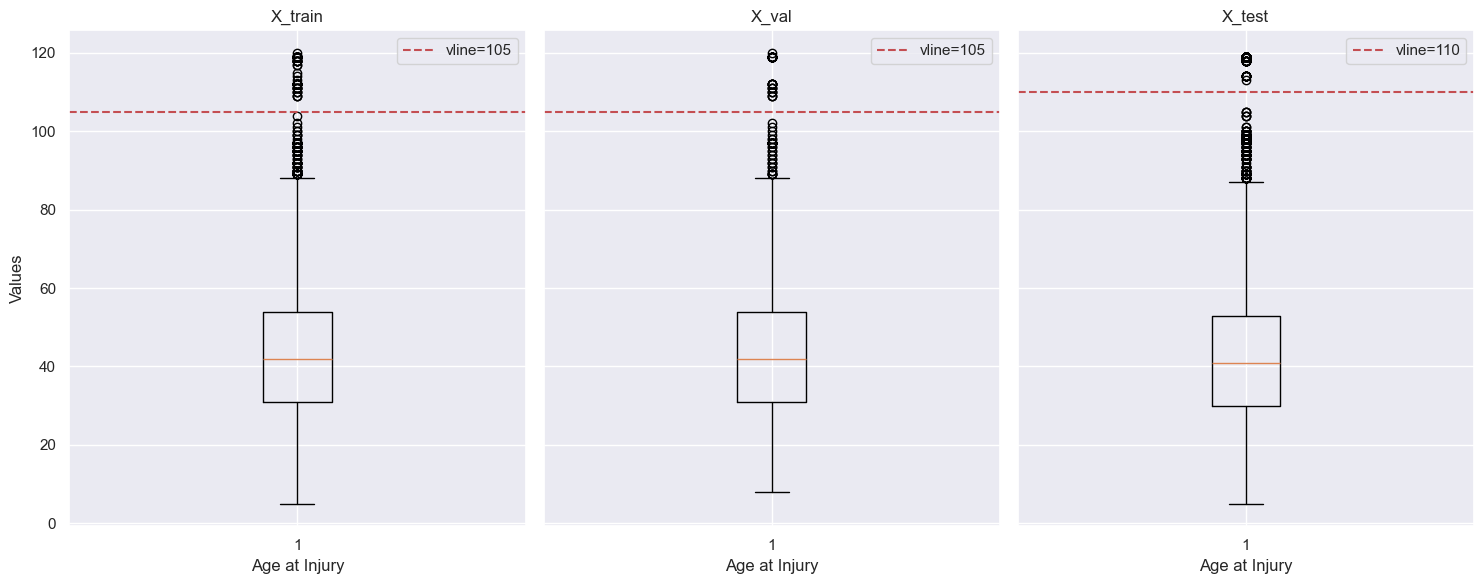

In [578]:
def plot_boxplots(dfs, columns, titles, vertical_lines):
    num_plots = len(dfs)
    fig, axes = plt.subplots(1, num_plots, figsize=(5 * num_plots, 6), sharey=True)
    
    for i, (df, column, title, vline) in enumerate(zip(dfs, columns, titles, vertical_lines)):
        ax = axes[i] if num_plots > 1 else axes
        ax.boxplot(df[column])
        ax.axhline(vline, color='r', linestyle='--', label=f'vline={vline}')
        ax.set_title(title)
        ax.set_xlabel(column)
        ax.legend()
    
    axes[0].set_ylabel('Values')
    plt.tight_layout()
    plt.show()

# Usage example
plot_boxplots(
    dfs=[X_train, X_val, X_test],
    columns=['Age at Injury', 'Age at Injury', 'Age at Injury'],
    titles=['X_train', 'X_val', 'X_test'],
    vertical_lines=[105, 105, 110]
)

In [ ]:
print(f"X_train: {len(detect_outliers_ages(X_train, "Age at Injury"))} outliers")
print(f"X_val: {len(detect_outliers_ages(X_val, "Age at Injury"))} outliers")
print(f"X_test: {len(detect_outliers_ages(df_test, "Age at Injury"))} outliers")

X_train: 211 outliers
X_val: 79 outliers
X_test: 616 outliers


In [ ]:
winsorize_ages(X_train, X_train, "Age at Injury")
winsorize_ages(X_train, X_val, "Age at Injury")
winsorize_ages(X_train, X_test, "Age at Injury")

### Average Weekly Wage

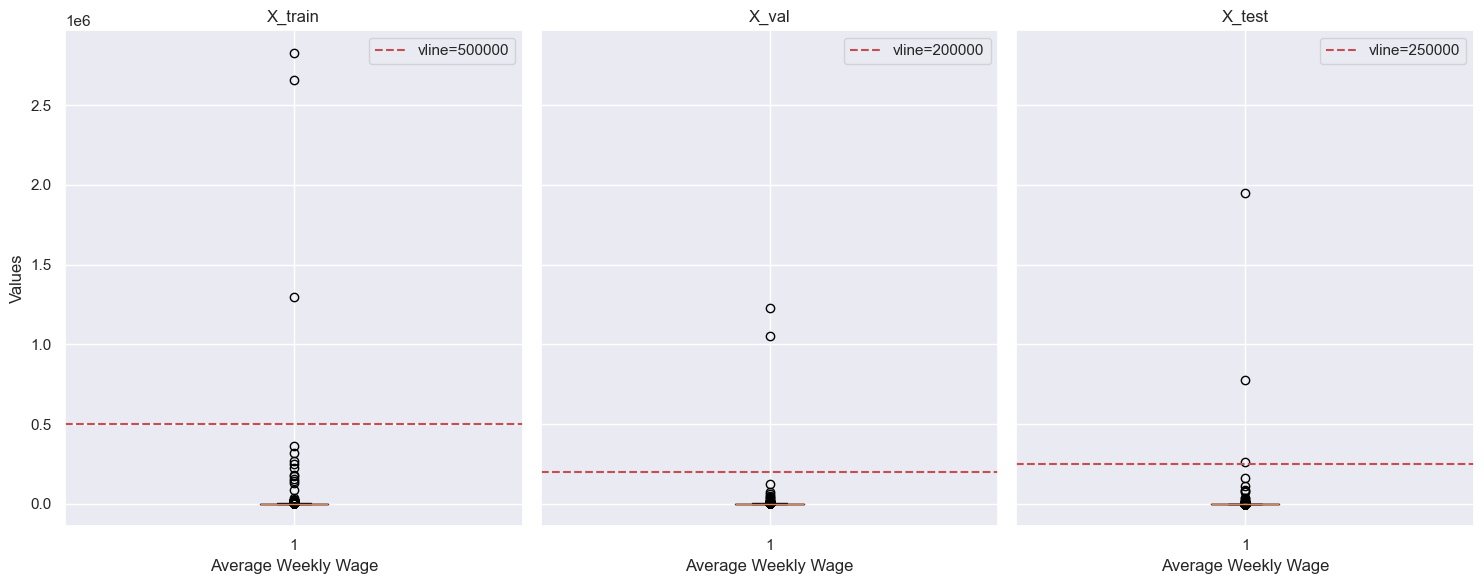

In [581]:
def plot_boxplots(dfs, columns, titles, vertical_lines):
    num_plots = len(dfs)
    fig, axes = plt.subplots(1, num_plots, figsize=(5 * num_plots, 6), sharey=True)
    
    for i, (df, column, title, vline) in enumerate(zip(dfs, columns, titles, vertical_lines)):
        ax = axes[i] if num_plots > 1 else axes
        ax.boxplot(df[column])
        ax.axhline(vline, color='r', linestyle='--', label=f'vline={vline}')
        ax.set_title(title)
        ax.set_xlabel(column)
        ax.legend()
    
    axes[0].set_ylabel('Values')
    plt.tight_layout()
    plt.show()

# Usage example
plot_boxplots(
    dfs=[X_train, X_val, X_test],
    columns=['Average Weekly Wage', 'Average Weekly Wage', 'Average Weekly Wage'],
    titles=['X_train', 'X_val', 'X_test'],
    vertical_lines=[500000, 200000, 250000]
)

In [582]:
def detect_outliers_wages(df, column):
    if df is X_train:
        lower_bound = df_train[column].quantile(0.05)
        upper_bound = 500000
    elif df is X_val:
        lower_bound = df_train[column].quantile(0.05)
        upper_bound = 200000
    else:
        lower_bound = df_train[column].quantile(0.05)
        upper_bound = 250000
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

In [583]:
# choosing to allow 5% of the extreme values to remain, thus setting the lower and upper bound to the 5th and 95th percentiles
# making it so that the dfs are impavted by the bounds of X_train

def winsorize_wages(df_train, df, column):
    if df is X_train:
        lower_bound = df_train[column].quantile(0.05)
        upper_bound = 500000
    elif df is X_val:
        lower_bound = df_train[column].quantile(0.05)
        upper_bound = 200000
    else:
        lower_bound = df_train[column].quantile(0.05)
        upper_bound = 250000
    
    # Winsorize the column by capping values outside the bounds in df
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

In [584]:
print(f"X_train: {len(detect_outliers_wages(X_train, "Average Weekly Wage"))} outliers")
print(f"X_val: {len(detect_outliers_wages(X_val, "Average Weekly Wage"))} outliers")
print(f"X_test: {len(detect_outliers_wages(df_test, "Average Weekly Wage"))} outliers")

X_train: 3 outliers
X_val: 2 outliers
X_test: 3 outliers


In [585]:
winsorize_wages(X_train, X_train, "Average Weekly Wage")
winsorize_wages(X_train, X_val, "Average Weekly Wage")
winsorize_wages(X_train, X_test, "Average Weekly Wage")

### days_to_c2

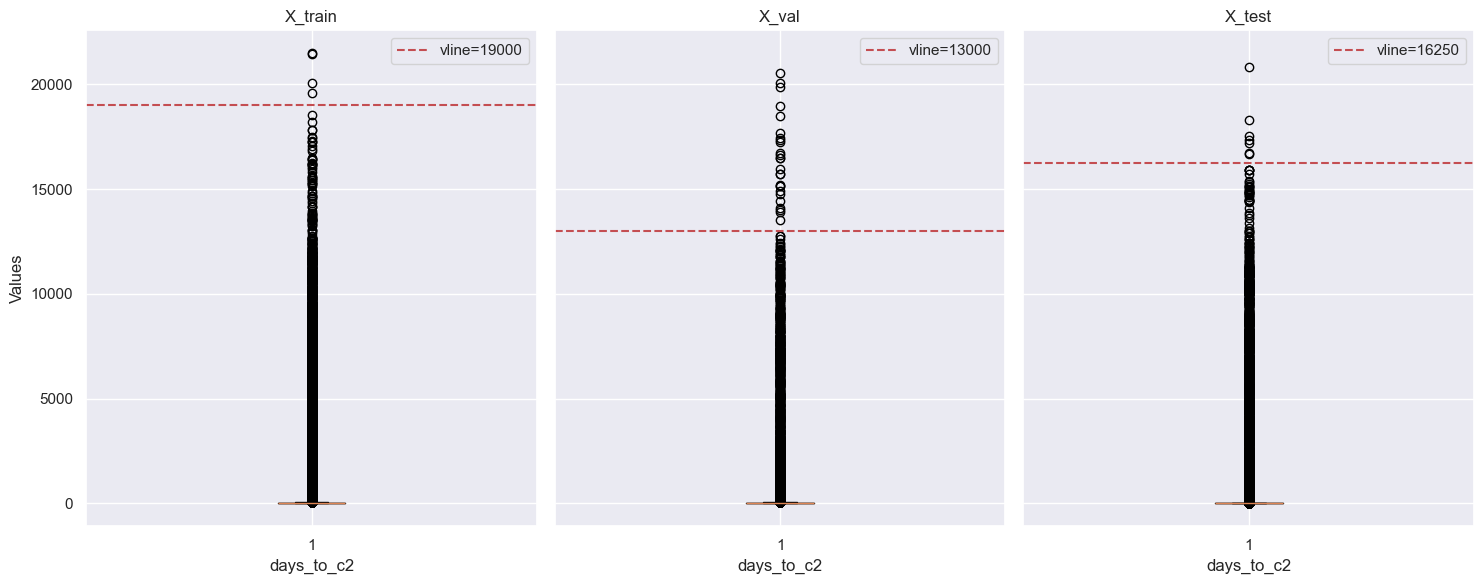

In [586]:
def plot_boxplots(dfs, columns, titles, vertical_lines):
    num_plots = len(dfs)
    fig, axes = plt.subplots(1, num_plots, figsize=(5 * num_plots, 6), sharey=True)
    
    for i, (df, column, title, vline) in enumerate(zip(dfs, columns, titles, vertical_lines)):
        ax = axes[i] if num_plots > 1 else axes
        ax.boxplot(df[column])
        ax.axhline(vline, color='r', linestyle='--', label=f'vline={vline}')
        ax.set_title(title)
        ax.set_xlabel(column)
        ax.legend()
    
    axes[0].set_ylabel('Values')
    plt.tight_layout()
    plt.show()

# Usage example
plot_boxplots(
    dfs=[X_train, X_val, X_test],
    columns=['days_to_c2', 'days_to_c2', 'days_to_c2'],
    titles=['X_train', 'X_val', 'X_test'],
    vertical_lines=[19000, 13000, 16250]
)

In [587]:
def detect_outliers_days_c2(df, column):
    if df is X_train:
        lower_bound = df_train[column].quantile(0.05)
        upper_bound = 19000
    elif df is X_val:
        lower_bound = df_train[column].quantile(0.05)
        upper_bound = 13000
    else:
        lower_bound = df_train[column].quantile(0.05)
        upper_bound = 16250
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

In [588]:
# choosing to allow 5% of the extreme values to remain, thus setting the lower and upper bound to the 5th and 95th percentiles
# making it so that the dfs are impavted by the bounds of X_train

def winsorize_c2(df_train, df, column):
    if df is X_train:
        lower_bound = df_train[column].quantile(0.05)
        upper_bound = 19000
    elif df is X_val:
        lower_bound = df_train[column].quantile(0.05)
        upper_bound = 13000
    else:
        lower_bound = df_train[column].quantile(0.05)
        upper_bound = 16250
    
    # Winsorize the column by capping values outside the bounds in df
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

In [589]:
print(f"X_train: {len(detect_outliers_days_c2(X_train, "days_to_c2"))} outliers")
print(f"X_val: {len(detect_outliers_days_c2(X_val, "days_to_c2"))} outliers")
print(f"X_test: {len(detect_outliers_days_c2(df_test, "days_to_c2"))} outliers")

X_train: 14625 outliers
X_val: 4885 outliers
X_test: 12193 outliers


In [590]:
winsorize_c2(X_train, X_train, "days_to_c2")
winsorize_c2(X_train, X_val, "days_to_c2")
winsorize_c2(X_train, X_test, "days_to_c2")

### days_accident_to_assembly

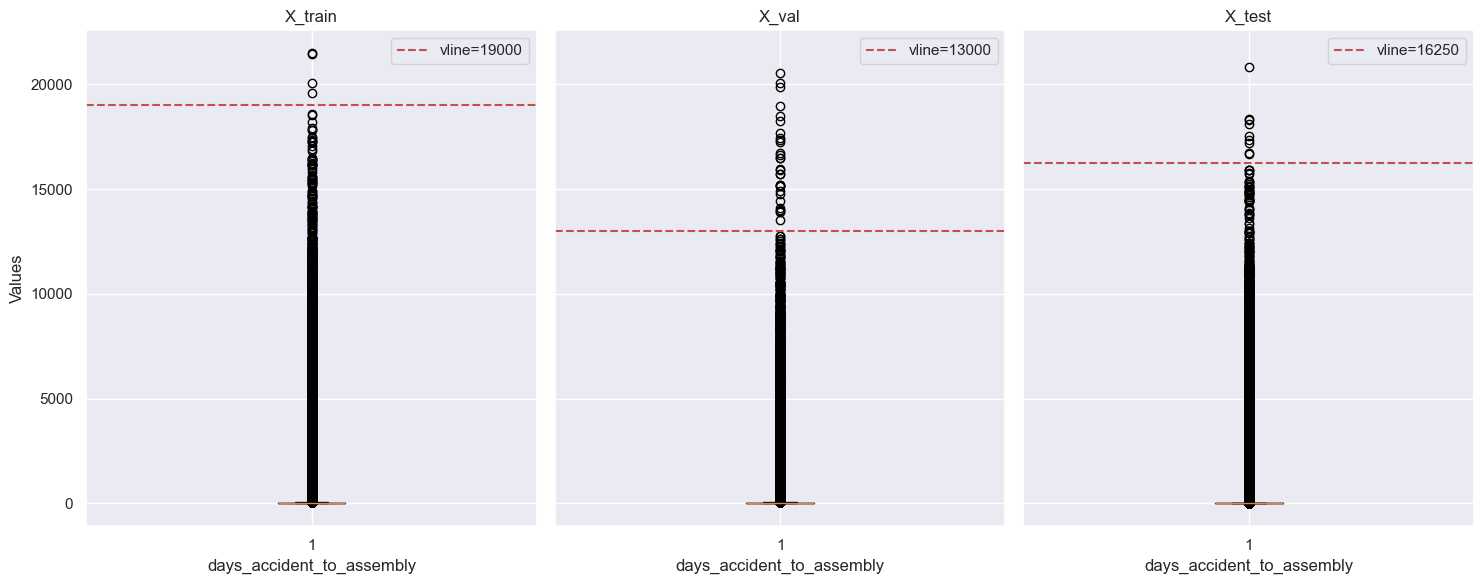

In [591]:
def plot_boxplots(dfs, columns, titles, vertical_lines):
    num_plots = len(dfs)
    fig, axes = plt.subplots(1, num_plots, figsize=(5 * num_plots, 6), sharey=True)
    
    for i, (df, column, title, vline) in enumerate(zip(dfs, columns, titles, vertical_lines)):
        ax = axes[i] if num_plots > 1 else axes
        ax.boxplot(df[column])
        ax.axhline(vline, color='r', linestyle='--', label=f'vline={vline}')
        ax.set_title(title)
        ax.set_xlabel(column)
        ax.legend()
    
    axes[0].set_ylabel('Values')
    plt.tight_layout()
    plt.show()

# Usage example
plot_boxplots(
    dfs=[X_train, X_val, X_test],
    columns=['days_accident_to_assembly', 'days_accident_to_assembly', 'days_accident_to_assembly'],
    titles=['X_train', 'X_val', 'X_test'],
    vertical_lines=[19000, 13000, 16250]
)

In [593]:
def detect_outliers_days_assembly(df, column):
    if df is X_train:
        lower_bound = df_train[column].quantile(0.05)
        upper_bound = 19000
    elif df is X_val:
        lower_bound = df_train[column].quantile(0.05)
        upper_bound = 13000
    else:
        lower_bound = df_train[column].quantile(0.05)
        upper_bound = 16250
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

In [594]:

def winsorize_assembly(df_train, df, column):
    if df is X_train:
        lower_bound = df_train[column].quantile(0.05)
        upper_bound = 19000
    elif df is X_val:
        lower_bound = df_train[column].quantile(0.05)
        upper_bound = 13000
    else:
        lower_bound = df_train[column].quantile(0.05)
        upper_bound = 16250
    
    # Winsorize the column by capping values outside the bounds in df
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

In [595]:
print(f"X_train: {len(detect_outliers_days_assembly(X_train, "days_accident_to_assembly"))} outliers")
print(f"X_val: {len(detect_outliers_days_assembly(X_val, "days_accident_to_assembly"))} outliers")
print(f"X_test: {len(detect_outliers_days_assembly(df_test, "days_accident_to_assembly"))} outliers")

X_train: 18324 outliers
X_val: 6126 outliers
X_test: 18842 outliers


In [596]:
winsorize_assembly(X_train, X_train, "days_accident_to_assembly")
winsorize_assembly(X_train, X_val, "days_accident_to_assembly")
winsorize_assembly(X_train, X_test, "days_accident_to_assembly")

## Last changes

Some last changes are made to the data to ensure it is ready for feature selection.

In [ ]:
X_train = X_train.drop(columns=['Accident Date', 'Assembly Date', 'County of Injury', 'Zip Code', 'C-2 Date'])
X_train = X_train.drop(columns=['Agreement Reached'])
X_train['days_accident_to_assembly'] = X_train['days_accident_to_assembly'].astype(int)

In [ ]:
X_val = X_val.drop(columns=['Accident Date', 'Assembly Date', 'County of Injury', 'Zip Code', 'C-2 Date'])
X_val = X_val.drop(columns=['Agreement Reached'])
X_val['days_accident_to_assembly'] = X_val['days_accident_to_assembly'].astype(int)

In [ ]:
X_test = X_test.drop(columns=['Accident Date', 'Assembly Date', 'County of Injury', 'Zip Code', 'combined_group', 'combined_injury_group', 'C-2 Date'])
X_val['days_accident_to_assembly'] = X_val['days_accident_to_assembly'].astype(int)

In [ ]:
#this cell was used as a checkpoint so the group could avoid running the whole notebook when working

# X_train.to_csv('X_train_v1.csv', index=False)
# X_val.to_csv('X_val_v1.csv', index=False)
# X_test.to_csv('X_test_v1.csv', index=False)
# y_train.to_csv('y_train_v1.csv', index=False)
# y_val.to_csv('y_val_v1.csv', index=False)

In [ ]:
#this cell was used as a checkpoint so the group could avoid running the whole notebook when working

# X_train = pd.read_csv('X_train_v1.csv')
# X_val = pd.read_csv('X_val_v1.csv')
# X_test = pd.read_csv('X_test_v1.csv')
# y_train = pd.read_csv('y_train_v1.csv')
# y_val = pd.read_csv('y_val_v1.csv')

# Feature Selection

For the feature selection section the group decided to use the methodologies that were taught in class. As it stands this section can still be worked on extensively. A better selection could lead to a better model, therefore improvement in this section is essencial.

## Encoding

### Binary Encoding

Binary Variables do not require too much work to be encoded. In this case, the group decided to turn No to 0 and Yes to 1.

In [ ]:
binary_features = ['Attorney/Representative', 'COVID-19 Indicator']
for feature in binary_features:
    X_train[feature] = X_train[feature].map({'No': 0, 'Yes': 1})
    X_val[feature] = X_val[feature].map({'No': 0, 'Yes': 1})
    X_test[feature] = X_test[feature].map({'N': 0, 'Y': 1})

During the process of creating a final model and trying to obtain the best score possible in Kaggle, the group tried several encoding techniques. Two techniques were chosen as the best ones.

### Count Encoding
The first method the group settled on was count encoding. In this method, categorical variables are substituted by their respective frequency count. This encoding method is simplistic, which makes it easy to use. However, it comes with some disadvantages. It's biggest flaw is the following:<br>
If a variable 'A' has 3 possible values, say 'red', 'green' and 'blue'. If 2 of the values are equally represented in the variable (as in they have the same frequency) then the encoding will 'delete' one of the values. This happens because the encoding for each value is the same, this type of error is called collision.

References: <br>
https://towardsdatascience.com/4-ways-to-encode-categorical-features-with-high-cardinality-1bc6d8fd7b13#99d8

In [ ]:
# from category_encoders.count import CountEncoder
        
# # Adjust the categorical_features list to match the actual columns in X_train
# categorical_features = ['age_group', 'body_group', 'injury_type', 'injury_cause', 'industry_group', 'Carrier Type', 'zip_group',
#                         'days_accident_to_assembly_binned', 'wage_groups', 'Alternative Dispute Resolution', 'District Name',
#                         'Gender', 'Medical Fee Region']

# enc = CountEncoder(cols=categorical_features).fit(X_train, y_train)
# X_train_encoded = enc.transform(X_train)
# X_val_encoded = enc.transform(X_val)
# X_test_encoded = enc.transform(X_test)

### Hashing
After experimenting with the Count Encoder, the group wondered if there was a method that might yield better results. Standard techniques such as dummy variables or one-hot encoding were tested, but the results weren’t compelling. Eventually, through research, a new method was discovered: the 'Hashing Trick'.<br>
This encoding technique (also available in the category_encoders package) maps data of arbitrary size to a fixed size. In simple terms, the hashing function assigns specific numbers to each item it receives. The number itself is not important; what matters is that the assignment is consistent.<br>
The function takes a parameter, 'n_components' which defines the number of columns, or 'lockers'. Like the Count Encoder, the hashing function can result in collisions (when two different categories receive the same value). Increasing this parameter reduces collisions but also increases the sparsity of the data. The final value of 64 was chosen after several iterations in a trial-and-error process.



References:<br>
https://stats.stackexchange.com/questions/411767/encoding-of-categorical-variables-with-high-cardinality<br>
https://contrib.scikit-learn.org/category_encoders/hashing.html<br>
https://medium.com/value-stream-design/introducing-one-of-the-best-hacks-in-machine-learning-the-hashing-trick-bf6a9c8af18f

In [ ]:
import category_encoders as ce

categorical_features = ['age_group', 'body_group', 'injury_type', 'injury_cause', 'industry_group', 'Carrier Type', 'zip_group',
                        'days_accident_to_assembly_binned', 'wage_groups', 'Alternative Dispute Resolution', 'District Name',
                        'Gender', 'Medical Fee Region', 'days_to_c2_binned']

encoder = ce.HashingEncoder(cols=categorical_features, n_components=64)

X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.transform(X_val)
X_test_encoded = encoder.transform(X_test)

Making sure the columns are in the correct order so the scaler can funtion properly.

In [ ]:
new_order = list(X_train_encoded.columns) 
X_test_encoded = X_test_encoded[new_order]


## Scaling

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_encoded_s = scaler.fit(X_train_encoded)

X_train_encoded_s = scaler.transform(X_train_encoded)
X_val_encoded_s = scaler.transform(X_val_encoded)
X_test_encoded_s = scaler.transform(X_test_encoded)

X_train_encoded = pd.DataFrame(X_train_encoded_s, columns=X_train_encoded.columns)
X_val_encoded = pd.DataFrame(X_val_encoded_s, columns=X_val_encoded.columns)
X_test_encoded = pd.DataFrame(X_test_encoded_s, columns=X_test_encoded.columns)

## Filter Methods

Filter methods identify the most important features by applying statistical measures to evaluate their correlation to the target variable. They are simple, fast, and can be applied before the modeling stage, which makes them a good starting point for feature selection. Indeed, they were crucial in the selection of features for the first models the group obtained (like in the case of the decision trees using the count encoder).

The group decided to use Spearman's correlation coefficient because, in comparison to Pearson's, Spearman's correlation offers better results when data is non-linear or does not follow a normal distribution. The idea is that very highly correlated variables should be removed, as they're adding redundancy to the model without offering new information and that variables highly correlated to the target should be the most explanatory.

Variance was also used to identify any univariate variables and remove them. This was done because univariate variables don't offer any new information to the model.

In [ ]:
X_train_encoded.var()

col_0                        0.000000
col_1                        0.062537
col_2                        0.011131
col_3                        0.235542
col_4                        0.041936
                               ...   
Claim Identifier             0.082822
COVID-19 Indicator           0.046272
Number of Dependents         0.111075
days_to_c2                   0.064112
days_accident_to_assembly    0.062117
Length: 72, dtype: float64

In [ ]:
#the current encoding creates to many variables making a matrix that is too large to work with

# def cor_heatmap(cor):
#     plt.figure(figsize=(12,10))
#     sns.heatmap(data = cor, annot = True, cmap = plt.cm.Reds, fmt='.1')
#     plt.show()

# cor_heatmap(X_train_encoded.corr())

In [ ]:
cor_spearman = X_train_encoded.corr(method ='spearman')
cor_spearman

col_0     col_1     col_2     col_3     col_4  \
col_0                        NaN       NaN       NaN       NaN       NaN   
col_1                        NaN  1.000000 -0.005900  0.005333 -0.019798   
col_2                        NaN -0.005900  1.000000 -0.106427 -0.006000   
col_3                        NaN  0.005333 -0.106427  1.000000  0.011492   
col_4                        NaN -0.019798 -0.006000  0.011492  1.000000   
...                          ...       ...       ...       ...       ...   
Claim Identifier             NaN -0.001844 -0.025218 -0.006232  0.005891   
COVID-19 Indicator           NaN  0.048863  0.063336 -0.128240 -0.022192   
Number of Dependents         NaN -0.002149 -0.002087 -0.003125 -0.000409   
days_to_c2                   NaN -0.009989  0.178960 -0.786645  0.005219   
days_accident_to_assembly    NaN -0.006505  0.192117 -0.852680 -0.000877   

                           col_5     col_6     col_7     col_8     col_9  ...  \
col_0                        NaN       NaN       NaN       NaN       NaN  ...   
col_1                        NaN -0.013192  0.038926 -0.007113  0.217507  ...   
col_2                        NaN -0.023445  0.057889 -0.024109  0.028158  ...   
col_3                        NaN  0.070560 -0.071561 -0.338419 -0.082688  ...   
col_4                        NaN -0.034626 -0.041075  0.002561  0.044083  ...   
...                          ...       ...       ...       ...       ...  ...   
Claim Identifier             NaN  0.008215 -0.042422 -0.016646  0.014353  ...   
COVID-19 Indicator           NaN -0.089884  0.306923  0.088281  0.044560  ...   
Number of Dependents         NaN -0.000930 -0.001666  0.000546 -0.000613  ...   
days_to_c2                   NaN -0.052089  0.134865  0.445638  0.092568  ...   
days_accident_to_assembly    NaN -0.079305  0.079438  0.470561  0.080855  ...   

                             col_62    col_63  Age at Injury  \
col_0                           NaN       NaN            NaN   
col_1                     -0.469025 -0.138055       0.025011   
col_2                      0.016574 -0.017702       0.016439   
col_3                     -0.002445  0.044195      -0.038275   
col_4                      0.027923 -0.029256       0.017291   
...                             ...       ...            ...   
Claim Identifier          -0.012155 -0.006916      -0.019126   
COVID-19 Indicator        -0.046741 -0.071637       0.002376   
Number of Dependents      -0.001237  0.001173       0.000792   
days_to_c2                 0.017496 -0.031773       0.042428   
days_accident_to_assembly  0.007884 -0.040462       0.053455   

                           Attorney/Representative  Average Weekly Wage  \
col_0                                          NaN                  NaN   
col_1                                     0.003563             0.020198   
col_2                                     0.071470             0.000457   
col_3                                    -0.145582            -0.023513   
col_4                                     0.066991             0.014467   
...                                            ...                  ...   
Claim Identifier                         -0.035343            -0.033075   
COVID-19 Indicator                       -0.037680            -0.041788   
Number of Dependents                      0.000050             0.000952   
days_to_c2                                0.200879             0.077465   
days_accident_to_assembly                 0.154505            -0.008458   

                           Claim Identifier  COVID-19 Indicator  \
col_0                                   NaN                 NaN   
col_1                             -0.001844            0.048863   
col_2                             -0.025218            0.063336   
col_3                             -0.006232           -0.128240   
col_4                              0.005891           -0.022192   
...                                     ...                 ...   
Cl

In [ ]:
#the current encoding creates to many variables making a matrix that is too large to work with

# cor_heatmap(cor_spearman)

## Wrapper Methods

Wrapper methods involve selecting subsets of features and evaluating their effectiveness directly with a specific model. These methods 'wrap' around the machine learning algorithm and evaluate different combinations of features to determine which subset results in the best model performance. 

The group decided to use RFE (Recursive Feature Elimination), a method that ranks features based on their importance and iteratively removes the least important ones. RFE works by training the model multiple times, seeing which is the least significant feature, removing it, and trying again, until the optimal features are found.

The wrapper methods were left commented as running them was very time-intensive.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=13)

In [ ]:
from sklearn.feature_selection import RFE, SelectKBest, f_classif, f_regression
rfe = RFE(estimator = model, n_features_to_select = 5)

In [ ]:
X_rfe = rfe.fit_transform(X = X_train_encoded, y = y_train)

In [ ]:
rfe.support_

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False,  True,  True, False, False,  True,  True])

In [ ]:
rfe.ranking_

array([68, 38, 51, 42, 13, 58, 15,  7, 44,  8, 59, 27, 32, 47, 53, 56, 49,
       30, 20, 10, 17, 25, 50, 55, 62, 18, 21, 22, 66, 67, 65, 60, 39, 64,
       37, 46, 41,  4, 28, 19, 16, 33, 12, 36,  6, 34, 45, 24, 29, 23, 63,
       48, 31, 43, 54, 61, 40, 14, 35, 52, 57,  9,  5, 11,  1,  3,  1,  1,
       26,  2,  1,  1])

In [ ]:
selected_features = pd.Series(rfe.support_, index = X_train_encoded.columns)
selected_features

col_0                        False
col_1                        False
col_2                        False
col_3                        False
col_4                        False
                             ...  
Claim Identifier              True
COVID-19 Indicator           False
Number of Dependents         False
days_to_c2                    True
days_accident_to_assembly     True
Length: 72, dtype: bool

## Embedded Methods

Embedded methods learn which features best contribute to the accuracy of the model while the model is being created, meaning that they integrate feature selection directly into the learning algorithm. The method the group chose was Lasso, a regression technique that works by reducing the coefficients of the least important features to zero. This means that it simultaneously indentifies those features and removes them from the model. The automatic feature selection that Lasso provides was the main reason to choose it over Ridge regression.

In [ ]:
def plot_importance(coef,name):
    imp_coef = coef.sort_values()
    plt.figure(figsize=(8,10))
    imp_coef.plot(kind = "barh")
    plt.title("Feature importance using " + name + " Model")
    plt.show()

In [ ]:
from sklearn.linear_model import LassoCV
import warnings
warnings.filterwarnings('ignore')

reg = LassoCV()

In [ ]:
reg.fit(X_train_encoded, y_train)

LassoCV()

In [ ]:
coef = pd.Series(reg.coef_, index = X_train_encoded.columns)
coef

col_0                        0.000000
col_1                        0.018488
col_2                       -1.104831
col_3                       -1.528828
col_4                       -0.603773
                               ...   
Claim Identifier            -0.142999
COVID-19 Indicator          -0.000000
Number of Dependents        -0.000000
days_to_c2                  -0.000000
days_accident_to_assembly   -0.445307
Length: 72, dtype: float64

In [ ]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 45 variables and eliminated the other 27 variables


In [ ]:
v_list = []

for i in coef.sort_values().items():
    if i[1] != 0:
        v_list.append(i[0])

In [ ]:
coef.sort_values()

col_49                    -2.232632
col_40                    -1.545552
col_3                     -1.528828
col_8                     -1.424167
col_48                    -1.355743
                             ...   
col_52                     0.249565
col_25                     0.392647
col_32                     0.484742
Attorney/Representative    0.582624
Average Weekly Wage        1.323603
Length: 72, dtype: float64

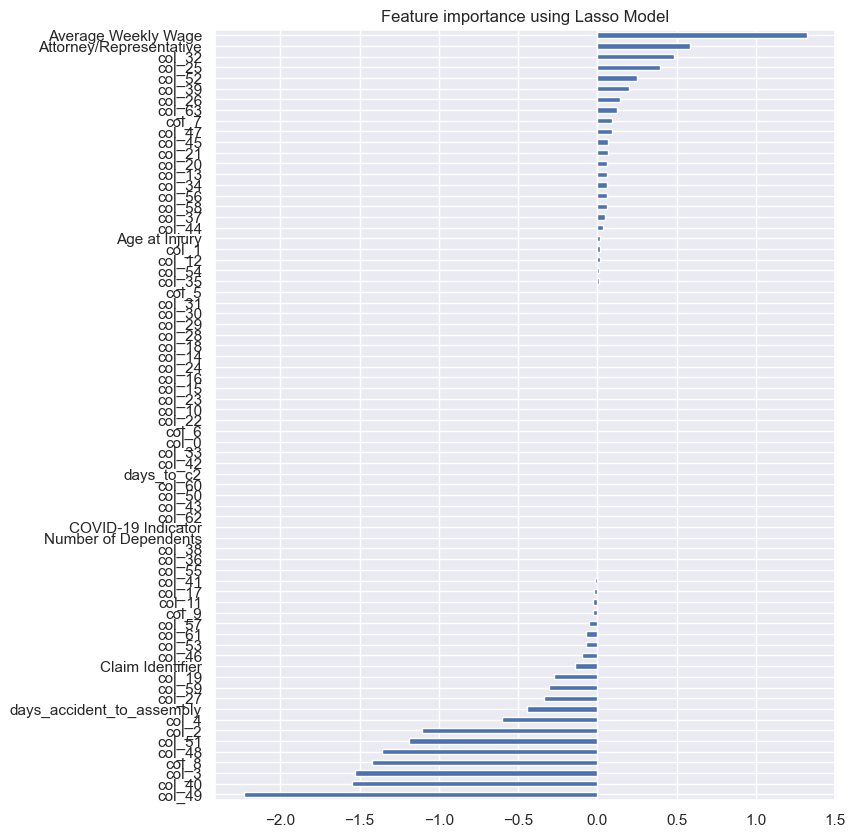

In [ ]:
plot_importance(coef,'Lasso')

# Modelation

## Model 1: Decision Tree Classifier

The first model that was tried was a decision tree. This model was picked based on its implementation simplicity. The group tried various iterations of the model based on the feature selection methods but the results weren't as good as expected so the group moved to a more complex model.

In [ ]:
# from sklearn.model_selection import train_test_split
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import classification_report, accuracy_score
# from sklearn.metrics import f1_score
# from sklearn.metrics import confusion_matrix

In [ ]:
# X_train_encoded_model = X_train_encoded[['wage_groups', 'days_accident_to_assembly', 'injury_type', 'industry_group', 'COVID-19 Indicator',
#                                          'Attorney/Representative', 'days_to_c2', 'Alternative Dispute Resolution', 'Age at Injury', 'Gender', 'District Name']]

# X_val_encoded_model = X_val_encoded[['wage_groups', 'days_accident_to_assembly', 'injury_type', 'industry_group', 'COVID-19 Indicator',
#                                      'Attorney/Representative', 'days_to_c2', 'Alternative Dispute Resolution', 'Age at Injury', 'Gender', 'District Name']]

# clf = DecisionTreeClassifier(random_state=13)
# clf.fit(X_train_encoded_model, y_train)

# # Predict and evaluate
# y_pred = clf.predict(X_val_encoded_model)
# accuracy = accuracy_score(y_pred, y_val)
# report = classification_report(y_val, y_pred)
# f1 = f1_score(y_val, y_pred, average='weighted')

# print(f"Accuracy: {accuracy:.2f}")
# print(f"F1 Score: {f1:.2f}")
# print("Classification Report:")
# print(report)

In [ ]:
# X_test_encoded_model = X_test_encoded[['wage_groups', 'days_accident_to_assembly', 'injury_type', 'industry_group', 'COVID-19 Indicator',
#                                      'Attorney/Representative', 'days_to_c2', 'Alternative Dispute Resolution', 'Age at Injury', 'Gender', 'District Name']]

In [ ]:
# y_pred = clf.predict(X_test_encoded_model)
# len(y_pred)

In [ ]:
# df_train['Claim Injury Type'].unique()

In [ ]:
# import pandas as pd

# y_pred_series = pd.Series(y_pred)
# y_pred_mapped = y_pred_series.map({1:'1. CANCELLED', 2:'2. NON-COMP', 3:'3. MED ONLY', 4:'4. TEMPORARY', 5:'5. PPD SCH LOSS', 6:'6. PPD NSL', 7:'7. PTD', 8:'8. DEATH'})
# print(y_pred_mapped)

In [ ]:
# y_pred_df = pd.DataFrame({'Claim Identifier': X_test['Claim Identifier'], 'Predicted Claim Injury Type': y_pred_mapped})

In [ ]:
# export_csv = y_pred_df.to_csv('y_pred.csv', index = None, header=True)

## Model 2: Random Forest

After testing the decision tree model, the group decided to try the next model: Random Forest. <br>
This model, to put it simply, combines an ensemble of decision trees to improve overall accuracy and reduce the risk of overfitting.<br>
Like the Decision Tree, this model underwent many iterations with different combinations of features and 'n_estimators' (the number of decision trees in the forest). Its performance was much better than the previous model, but after a certain number of iterations, the model plateaued, and the search for an optimal model began again.

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score, classification_report, f1_score
# import pandas as pd

# X_train_encoded_model = X_train_encoded
# #previous feature selection
# #[['wage_groups', 'days_accident_to_assembly', 'injury_type', 'industry_group', 'COVID-19 Indicator',
#                                         # 'Attorney/Representative', 'days_to_c2', 'Alternative Dispute Resolution', 'Age at Injury', 'Gender', 'District Name']]

# X_val_encoded_model = X_val_encoded
# #previous feature selection
# #[['wage_groups', 'days_accident_to_assembly', 'injury_type', 'industry_group', 'COVID-19 Indicator',
#                                     # 'Attorney/Representative', 'days_to_c2', 'Alternative Dispute Resolution', 'Age at Injury', 'Gender', 'District Name']]


In [ ]:
# clf = RandomForestClassifier(random_state=13, n_estimators=100)
# clf.fit(X_train_encoded_model, y_train)

In [ ]:
# y_pred = clf.predict(X_val_encoded_model)
# accuracy = accuracy_score(y_val, y_pred)
# report = classification_report(y_val, y_pred)
# f1 = f1_score(y_val, y_pred, average='weighted')

# print(f"Accuracy: {accuracy:.2f}")
# print(f"F1 Score: {f1:.2f}")
# print("Classification Report:")
# print(report)

In [ ]:
# X_test_encoded_model = X_test_encoded
# #previous feature selection
# #[['wage_groups', 'days_accident_to_assembly', 'injury_type', 'industry_group', 'COVID-19 Indicator',
#                                       # 'Attorney/Representative', 'days_to_c2', 'Alternative Dispute Resolution', 'Age at Injury', 'Gender', 'District Name']]

# y_pred = clf.predict(X_test_encoded_model)

In [ ]:
# y_pred_series = pd.Series(y_pred)
# y_pred_mapped = y_pred_series.map({
#     1: '1. CANCELLED', 2: '2. NON-COMP', 3: '3. MED ONLY', 4: '4. TEMPORARY', 
#     5: '5. PPD SCH LOSS', 6: '6. PPD NSL', 7: '7. PTD', 8: '8. DEATH'
# })

In [ ]:
# y_pred_df = pd.DataFrame({'Claim Identifier': X_test['Claim Identifier'], 'Predicted Claim Injury Type': y_pred_mapped})
# export_csv = y_pred_df.to_csv('y_pred.csv', index=False, header=True)

## Model 3: Light GBM

The final model the group ended up choosing to present in this phase of the project was the Light GBM (short for Light Gradient Boosting Machine). Like in the previous models, this model type suffered through many iterations and in the end the best combination was created using all features generated with the 64 lockers in the 'hashing trick'. In the future the group plans to retrace some steps a take a second look at important sections such as imputation, dealing with outliers and the aforementioned filter, embedded and wrapper methods.

Light GBM is a model that, much like a random forest, uses an ensemble of models, combining them sequentially. The objective is that each model corrects the previous models mistakes. The models are optimized based on the gradient of a loss function (in this case 'multi_logloss). The choice of this metric can be atributed to  to its suitability for multiclass classification. Several key parameters were fine-tuned (by trial and error) to optimize model performance:
- 'learning_rate' controls the speed of learning, with lower values enabling more gradual, precise learning.
- 'num_leaves' and 'max_depth' determine the complexity of each tree, allowing for more detailed splits.
- 'is_unbalanced' helps the model handle class imbalance by adjusting the weight of each class in the loss function, in this case the target is unbalanced and as no resampling was done this parameter is added to counter it.
- 'feature_fraction' and 'bagging_fraction' control feature and instance sampling, which helps reduce overfitting by ensuring diversity in each iteration.

References:

https://lightgbm.readthedocs.io/en/latest/Python-Intro.html# <br>
https://www.geeksforgeeks.org/lightgbm-light-gradient-boosting-machine/ <br>
https://medium.com/@pritmanvar/lightgbm-essentials-how-it-works-and-why-its-fast-586b83dda7af <br>
https://medium.com/@soyoungluna/simple-explanation-of-lightgbm-without-complicated-mathematics-973998ec848f <br>
https://lightgbm.readthedocs.io/en/latest/Features.html <br>

The target variable needed a slight adjustment, this is due to the constrains of the light gbm model. This model expects the classes to start at 0, so 1 is subtracet to each value in the train and validation set and afterwards the map function is changed.

In [ ]:
y_train_adjusted = y_train - 1
y_val_adjusted = y_val - 1

### LightGBM with Cross Validation 

After testing the performance of LightGBM model, the group decided to test LightGBM with cross-validation to gain a more reliable performance estimate.<br>
Kfold cross validation splits the data into k subsets (folds) and then train and test the model on each fold, each time using one fold as the test set and the remaning k-1 folds as the training set. This approach ensures that all data is used for both training and testing, providing a more accurate estimate of the model's performance on unseen data.

The highest score on Kaggle (0.37385) was obtained by using Light GBM model with Cross-Validation. However, this model was left commented as running it was very time-intensive, taking approximately 50 minutes to run, compared to only 10 minutes for the version without cross-validation. To avoid long waiting times, we used the model without cross validation while working on the project.


References: <br>
https://pub.aimind.so/kfold-cross-validation-for-the-lightgbm-classifier-7915aed9b19e

In [ ]:
# import lightgbm as lgb
# from sklearn.model_selection import StratifiedKFold
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns

# params = {
#     'objective': 'multiclass',
#     'metric': 'multi_logloss',
#     'num_class': 8, 
#     'learning_rate': 0.01, 
#     'num_leaves': 64,  
#     'max_depth': 6,  
#     'min_data_in_leaf': 50,  
#     'feature_fraction': 0.9,
#     'bagging_fraction': 0.8,
#     'bagging_freq': 5,
#     'lambda_l2': 2.0,  
#     'verbose': -1,
#     'is_unbalanced': True
# }

# kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
# accuracies = []

# for fold, (train_idx, val_idx) in enumerate(kf.split(X_train_encoded, y_train)):
#     print(f"Training fold {fold + 1}...")
    
#     X_train_fold, X_val_fold = X_train_encoded.iloc[train_idx], X_train_encoded.iloc[val_idx]
#     y_train_fold, y_val_fold = (y_train.iloc[train_idx] - 1), (y_train.iloc[val_idx] - 1)  

#     train_data = lgb.Dataset(X_train_fold, label=y_train_fold)
#     val_data = lgb.Dataset(X_val_fold, label=y_val_fold, reference=train_data)

#     model = lgb.train(
#         params,
#         train_data,
#         num_boost_round=1000,
#         valid_sets=[val_data]
#     )

#     y_pred_proba = model.predict(X_val_fold) 
#     y_pred = np.argmax(y_pred_proba, axis=1)  

#     accuracy = accuracy_score(y_val_fold, y_pred)
#     accuracies.append(accuracy)

#     print(f"Fold {fold + 1} Accuracy: {accuracy:.4f}")

# print(f"\nMean Accuracy across folds: {np.mean(accuracies):.4f}")

Accuracy: 0.7737238671336093
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.46      0.56      2813
           1       0.83      0.98      0.90     71743
           2       0.47      0.03      0.05     17008
           3       0.70      0.88      0.78     36760
           4       0.67      0.44      0.53     11836
           5       0.00      0.00      0.00      1045
           6       0.00      0.00      0.00        23
           7       0.86      0.05      0.10       117

    accuracy                           0.77    141345
   macro avg       0.53      0.35      0.36    141345
weighted avg       0.73      0.77      0.72    141345



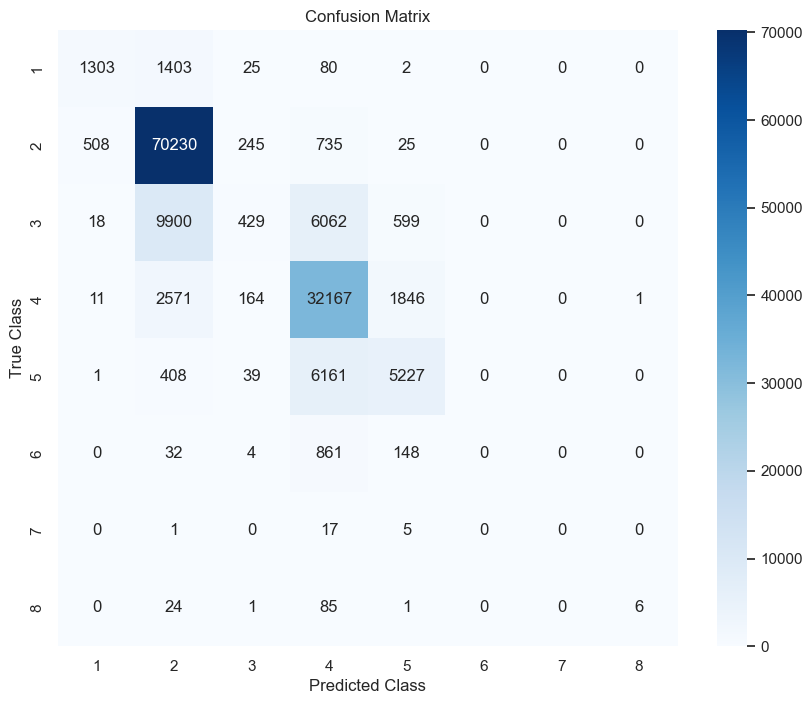

In [ ]:
import lightgbm as lgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

y_train_adjusted = y_train - 1
y_val_adjusted = y_val - 1

train_data = lgb.Dataset(X_train_encoded, label=y_train_adjusted)
val_data = lgb.Dataset(X_val_encoded, label=y_val_adjusted, reference=train_data)

params = {
    'objective': 'multiclass',
    'metric': 'multi_logloss',
    'num_class': 8,
    'learning_rate': 0.01,
    'num_leaves': 64,
    'max_depth': 6,
    'min_data_in_leaf': 50,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'lambda_l2': 2.0,
    'verbose': -1,
    'is_unbalanced': True
}

model = lgb.train(
    params,
    train_data,
    num_boost_round=1000,
    valid_sets=[val_data]
)

y_pred_proba = model.predict(X_val_encoded)
y_pred = np.argmax(y_pred_proba, axis=1)

print("Accuracy:", accuracy_score(y_val_adjusted, y_pred))
print("Classification Report:\n", classification_report(y_val_adjusted, y_pred))

cm = confusion_matrix(y_val_adjusted, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(1, 9), yticklabels=range(1, 9))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

In [ ]:
y_pred_proba = model.predict(X_test_encoded)
y_pred = np.argmax(y_pred_proba, axis=1)

In [ ]:
y_pred_series = pd.Series(y_pred)
y_pred_mapped = y_pred_series.map({
    0: '1. CANCELLED', 1: '2. NON-COMP', 2: '3. MED ONLY', 3: '4. TEMPORARY', 
    4: '5. PPD SCH LOSS', 5: '6. PPD NSL', 6: '7. PTD', 7: '8. DEATH'
})

In [ ]:
y_pred_df = pd.DataFrame({'Claim Identifier': X_test['Claim Identifier'], 'Predicted Claim Injury Type': y_pred_mapped})
export_csv = y_pred_df.to_csv('y_pred.csv', index=False, header=True)